<a href="https://colab.research.google.com/github/seongheechoi/education/blob/main/REINFORCE_0730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.23.5
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.15).
The following additional packages will be installed:
  libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxtst6 libxxf86dga1 x11-utils
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 232 kB of archives.
After this operation, 819 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched 232 kB in 6s (38.9 kB/s)
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libx

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [2]:
import torch
import torch.nn as nn
import gym
import matplotlib.pyplot as plt
import numpy as np

Pytorch의 cuda 모듈을 활용하여 사용하능한 GPU가 있는지 확인

In [3]:
print(torch.cuda.is_available())

True


1.   GPU가 사용가능하다면 연산에 활용한 "DEVICE"를 cuda:0(0번 그래픽 카드)로 설정
2.   반대로 GPU 사용이 불가능하다면 CPU를 활용하여 연산


In [4]:
if torch.cuda.is_available() :
    DEVICE = "cuda:0"
else :
    DEVICE = "cpu"

print(DEVICE)

cuda:0


![image.png](
2XvOWWcfIrmb0J9PCP9I5dGFbvScw5lN2Os4nI+LmMPMRzAiIr4U5PlZmn7p9HXbiP+EB/rvpW0RiJsod03llYaq0ROcIY04Mv7u6mJEB/bGuzZpASBxTm+JOaM88L+cM60yNIOMiIiIeBeYdq4Po8MhvZPCq/bY8FTEO+LBvMk0u07t1IYjfPaxOBqcef+Xo2ffhA51H1txydqtJIh4P8wXhdhLZdH5zsPmbuDwZLuh48hEHbaq2iXBk7I890MaHxOHrqYxI2FWM5Vm5eWsUtfS78OswWTCGvAoqy9nNrulMhysfuGW/hERPbiqgiNG/JXNvvyTS7PhpJxnull3fXwlbt62iYiIiIiIiHg3NGnEp0BH7ojPAGqIxx39Brxml5+cOzKeMixmYSWCzCXnFdNd2o6m+J7zIyZqtlMVp3PzL54keLKwc4lFr4jdsJ+hCAX+g10Ha2v5Lk+NsZoFr5LqjWHVnBwUdmX9CbouARW/cwRsMucI6pl7KU23ZKWCIFV7Tp+EuVrk7aOq4tNUiXqD2cSM1NJMwXJk91pUr2UijDQe6K5HkicAFmtdksuJynVodiC79Lbh/V0oqa0uq0mSxeOf5O4Z/4NfFzQK1oyUxXNuhVj7YTzC/+JJFSBl3UD4d5yvBb0biQyX9YY8b+25VTpK+XDqG7OMF8RARdAQFAK/E1/EIlRYkav1C+kt0QoGP8nup9DiTWXUNIIvekLuFQzVeNzgMdfcMMFgiJP8D8C0KVT5vfW2kS7JLmpdGpaZZOnIB0ky8TZxN1PcNU5JhA2dYkTF2uWTnEhc0ypvPiILZQR87V239TKFLPauZof4jA3NNmMWATZdsGn1RkwalxH6M9ypHd5igjwa7kZXFlFRJwXFFnEp0AUHBERER8cGlgmXJYuPJ6fDB1HXUmP/QSEMcdjA484JRPXHwnzAU3xeTZHtawonx5Qu4slS++7TuQi5mIffRvxRPToOOHqYCkFyNIt2RzBYDH1jugGcHosy3pkChSs6HpkOP4SrAtBWEfiCuG4GQZP5Xc8/m2mwzyFvOprocBCcmBeCQZ695cI7i8fVD+aEYH94zWICboO6zitQJ4eOlkL9P6HXLD8uZ8WifUtSp2owthWlQXdgWQculLJDpcSZtMQzB/Y7bm+5qBUQVbKwDO5+q7awG+qEvOXvHGOS5uGI2A/kd51GD5JaO7t2Yclf/uHhstAxbQwodFaTo8Sf9NYHx/xhvqNwSNploh7rbpuTI6i4SmMyoP7yKoMpIOvscpngPR5nt6WipOF6iP01p0USa7u4RMtlZKfFiSsVnVp7+eJVU8LuvtPA72Vurti/Zy/Gh8Cl4LL8bpF4O9VbQ+RxDGAQ8JBcbwTRArjeoMMpFF+qOX9QcYW99FrJ/bl0/0ZxtXDw/RWYFs6qsrV9/SbVOrnZoUF1A+Y77rS+DDqurYdvfHFH+DWrohT3IgngcBzer9eCyP3mdD6Cxg2w4u2OQdhlWmturBI7wJvMA0RAAJEgoLeeJeCdTTjAd9XxKbQ+7EHvclLjAlOfuzHqnDvLZwCk3f0nqosOD26w1ufMA8QRIyEGIMDGzLuiqqQdqZ25CoqBp5tTYnUMvae4xT9fHBPrvM5W+QLofchHwTwswgjfGb45JmqE68yV00hW7JC6Ss2y23iHc6q1tbqWSixgdiZcOhWqTeTzNpVtWL3Wl2BkfML+AiQDsmhf6aKTVVcLYxvTOHAqiXDnAkDJvpvkEyvKedVq63ToFKQqIl226o1jbWlCb9/QKbZUtXI3B76qdfagZjl1TuaaTbrWXXd6mRavmzUXqIkrgflGasAPkaj6dyI+omZoNbcAPVTFuFThak7O2iH9rEgdWMR3SydVP8Pg/15Cyr8Lejbyb6mfTnIVufl/cCo2mMe2n1oy/RlytYPhDlNB3r3endcbBAR8ZnBsE/H4KSBWsR/kQnL8vtWEbQT6lIU7Z1G9ecRVRZHIdrZGXC8hWBc0YgOPb1F7yZIL3Y3xsBn8HJhTMx+f/yLP4l+0p0LP8G7TYQA9BZ60EMvCf0rHd6xu7GGbgV0aBE3vyr1eEu9gM4nlENPPoWmgH46euH8xYXG4y7G0KNeyBCEBde9UWWw0PV5VwQBUrTqzayjN3jc4kwJQjEqYrLN9T4df+NiuS2uHKGUge7osEi/0yFJonYMNtV2TXrf2/6hJZ8n0hG6++4LA84xQN3L7LGT3gZEKtQTA94GY6Jj1/Nl7Si/ZeSIfRjQm7xMmtP/I+je0ZuNaqbCNyopTVgd0jAaEEF4rvUxJat8rfddq0pd/LzTqtq/sq5WzYHIk9VN9Yu3G6a2oqbk3tbqsm42/Y+gr24qm5gX3BTo4Vf6UBXauXbSOQXTjHoZ8R/w5XWczzfSqN9FREQsQVWFUdOz+j4+Y7LliCN4UN26zuSckHOqLBlbkQ7P2XBsgFZUx5OAThTw4Jx3jcJcAGmNP9He6JddgL2jMwXH+bO7UxB+h63Qr7tDfsw/6oc+7Y1woT+EGtrtnHN6qyRhnBtZo8NZx99wwEA5JJfMYIFqz7EnbF2io0mXQf/H0RQhUK4e4RxkUTopJDz8KpfgtzjvhMbMEsq8k17+9d4zbReBiZdXJdnou553egtNnPtHGeOf5ob0CK/cgsTYwzWSWTV/OdOkNDI5BNGSp09FCXdqFkL5o9OunNOUTw0/1HMc4Bt6K8MrzAtM3tF7IOk6mo3Q95wHbTnn9N5lncY70ooSrDzlsOtGV80v8wL+T0Fvw5HaSvgbH4hrVqSZBRe7VM2s+YOnzYF5xRn3a5KjNvn+wLzk71m/5sz/LT9MNTTTffQCnDvPSKvDUh16p1Y4olerB7ZSjVAl17nKsbdutSq3ZUhkY6+xiU4cmPK2k9YwtyVu8blpebtvVFJV19SlSj/bUap+xix1UqkXwcInJfsLrnNSHRXj9WgqQjJ8E8a4vnF0vHccc2r9J2itJ4dD2/nNI/++2zmKG++gHUZERHwDsPNeR8RHBzSGHQk8chIyBbVlOYJ2N6DvIqJ9ZcDXkyAyf1gF/Y1Bgm6GSd4T0KtwS3CEqHPySwTPAH1Evyu7VN8ovcWPLLrym3Rksg3Wa9zmw9foKP4dvD4UPmNQpN09dOm3K1HK0T9PVeu9rZ7IvENZJarShWpyXv+Jp0DjQOY+MHAii7nRkR8WP3+j9O4ECX4qygNGZ16f1GofJ3jpCvl79qNKjUanvQbNLHuaJVfw/N7d/BBn2YfniIoPdH4cVHZP1ysEv4t0Z3ru/mbpLfJknQYkFS176E0JnM542gL84AuAXDuPuBICxNQOlPyDpzhFLwANb6m7YvMgIYDlBukJrY1EevdbdJPH3yi9Kbkn+4G/aS4z06oF/TyYlUyJbwDCNODbNblMwwTP8T0J4t7RDETNVban7K66E4T4htxMPOjn5udzzGHvW6X3uE++oBf2B8FogIxKicCzC8k69Oe639fhh+iy/+JsD843Qju5UxOyGxERcR7hlgrkd8HS++fNQsQI0E9s0k8RvycGpXqEOwuLBhc7qUd6sx84SO8XjS0qHqf258+AZfQ+ZRjgyPJkb/3ZrSe+dtB9I+RB5tF9z9EpV7WtjbtgVL1DKVHnrq3RJ/KTVdVkNA2HNt7YjMo4+jveWQfVvaHXzcI6X1RMkB8WqmrJ386uqbJ2tCQ2ziJTVym741+h/5+qWosphHoDXfzIIMv5RddFxM9m359vGJEfJ+TSnxzOy0EPaHF5JyK4pl76l0hHi+59q4x9wS5M6MSA3WXZvXRqaI/FoYJJyLTgiE2qruBMpjslEfl8M8LeswfekAjsz8/Yn18xyvf9eZBijcN9KTlQPwnnKnVvoDc9FoDA+07GCkWIgPy44xp3uZIFbO3QazVqk5mKe4gU9/LK0Gp0o1rfAug/Y0bOqyBbavbnb4Jefxma4AAFPTkUuA4K0YEGEXr+Wuj9Oy7uSyRuBrIKzUDLjyO7+CrGvgabT8jBDl/0GjIypLdBIhlLZM+//7rfBOat3YJet6jkna4yytV5koW+u+3N6I/h9Dwj3g/5N9MWRkRERHxS+FrnyezMCsKvy6Rxsejhvp9rIJ6ekPP20fM0sz0JTnplI5xtdn+JlulXtaLj+TGWOmj8WBBfSEmnyJ0FC8MiHaRndAIWro0+1pxi3cn+xI3ud8D2sQGXMxKo60Sxy9sDXWWxkFZqWg65fEp6y5t49OehSzOYsWrw+lVl1A1Rv0uGISgrU6rSVRU65ugKIVHt0dOvpZxNo+o7D2TPq7ypG9U8UDX69cwIG2r2SML8lU/YWQ3zDQlSSsjk9G6jfGVxQvhxhWvFN3G+yTc9NuoRPfjVuB03FlXDhxYvptsoRumFUyskRjlDeTlQkDqUT9ktFrRROslRmOC5DK/LcnRYC5rw7FPSu2M//HhOgu2x7GAIOl+THmJKv1ziTu1Pbmp2dKylW7TAj7ixDbtbM/yix9jgpYw6ALXZTVKX5CoozjTYRcbyjbFL72+X+GAu4Mc/OjiQHP8HIhodHCI+57Q/B1iQAd0hEEYC/7zsul/y/CssHVBzSUGlrNWW/J0HmyHIO5YCGfmQQ0BYnTF4wPwUKDgpSRKpinLsBopVgw9NghLz+gMSSOi9wk2jwCjNd9u4GAouZJN3SXkHeqsUTv43+iSs2CyARtbOdCrMi2P8FxaT3ZJS+3H/LfAZAdwIxlxVOcifbFtziLOPQEJkozuRbDhkMBUHecAaM5EiAjUtLbZQRuQJ/vmDTi5B2D0LqQTkam5cnnaC5pPSW4Y4JLQRvcIY+lvk/Pzf+JW3uRHojVSQK9xcVPfNjMGpAr3BYh1/a42XFWLRD+0NiElxhLmhnuCVJgORQYc73W7JeuJVtYNGhBy+LQTABWQaZC+K5dRkVzwq2BmeHug9ocUF2ENKiOcik/WO3lInLoKh9+liwc/Ub1WhXpu98E25+kMKiwoxp/InpTekq1Wz546GBjtg9n+dMu4pxJ+88Y6jMySLq849fH6fiRi+BJ/lBxuCHPFyqAp6R6l7ziK14c2SgbPVBBtkGV7qH7mBmPDX3wfVnEZ+M/3v9XDlOrZ/IRdrc1y7T++OzuG/sju4V7J5DW7457A/2nFG4zKeAtgdD0JzLFk7sLK32zNWl8DVTMacFoATshTpq4TI/A8C1If3ruhC3LfgSgl0EuWrhTlpaOo9EPyLvw+iZUpExCdE578rGfeL1+unO93RQg/vVD8G36HV5/QEQTfHEcTRJe+9TjRXjgDqGMuajxNGF0JS0nhonCK9ewz0zjKfbdU3VWLRUa6hHYNGtxpRkEBvMGpqGyjjM82eO/vQuoLOVYXhqHWDXndA2mlQFmc6yhcF8sqQ7Scd/vkyIX1rQaJa0ieR/q38D78g3QX0gBV06hz6P8O+ch7dPAP59B77HVB6TehAm/lIj/QGieATD72i/zuLLnbeMZcn2cS0Qprhf7IXeivYztRsb6q2jd5Xt2XIMEGXWh/6iRZ2vqXQrwS8dNUI7Iijc6V+QV2Qb3f7Tzn+tgGadKJ5L1FPQLQRvdOD0Hcm1b3aYy/cqEdqSs79H3rMEA81o5aycx3GK8DNXW1BvvsrYTfkxUUln3Y44kvEVdCsJ4Im5Sfa6gM9+QE/OCPknlm7t61BbxxtW4s+trI/4Lwz6KU76cagAgxdEP2cG37Eroez76a4R4eUEWeFjWYInxQfskMeERHxDUGn1KvnMCVURZmIOeawNBt0wB76JlvLiCUQPWIJGIB+AeiviLJCC9gj2O1+5+inoyKOACQ8xp2ETXClgg7tXbd+5BLNWAXr1KL5nUpGGPIz1bCbzr9uosZ60psG3uE4Yoy/l1K87/LoloYNwCajaglS9uPNvudo1OwGuzJqld2dajV0VnHfZW0gjrLl3/LbxqKYHtDR25jOnqbpVw3IbBYoW9GQW90nB3O2OKlv1y6RT4J0mc6lEx9xFPUJE3odvbn+XUDx3QnlXM24/KbxXjUThiYhvfHZrHyBjt5/MUSDJI8YwbXJ5uyowgE0l28pnWWH6vIjaSXLtlLlrSCOjc+V2a1B4Vwr75+mj8yjXJW1KsKaJpWlq62qqOB0YykRERERERGfAZ+sF2GyrZ9P0BffhoWZhW6i51SkaXm8n3oWsFeG5yVqLawS7HDS3F3G9YhLMO81L5K3copj/Z8EVC9OUuqgX58dZ+j3vMFfsOF+R3QM0bIjNsIw/XEU4vvsGEafZ4HeL83s4KQ+yodGygkGMA0UbysLsNFfx47iPI+DLigO2FE+/LDHKQdWY59Tm7gH7yURNDXdtnXDAuOVaAvTa/iuXYzdowhLvwlm3MHibtmZrB7KNNRlofcOfZVrlEYKyvzEZxzulIEidiHE0TjKhRMhCw0ISbt3CPl2j0IPZPtTdZO7+fVMzYx5jCe3aqLuW642vsNOJUouKcQXW6lecR9czyXbpC8rB/4k1t3PuB50cUZMD2+CfCV2eYcnVOiXgZH+O4TQAwF/97TPlJ7iKbiSIu+XRoJDsjdsmTwJXhf4OQumoVO+JhR+C38ABAk+F0t3ECqY5CvrpYHLJW4aFfNjIsVz3iQqWanJiRuyI/z6HUrfqNf1ivRvLA3r6WQQSOpaxlXYbW1l8TfNu1W9n+8G6ZxxuCXUix/5/pOwT1uhh+ynHn+1EpmEQQVQDlmHmv8XEoZWIeP5LY7XpOTPdXXjYgY2Br3JMb3ZAzJJyA1PcJesA+dxmCDMKWDwJkgoFUyKUCfyg4qCtMcL9XFAxpKVDHpGej/BDkpkXqvEqWZ7Epz56gOuad8NvIG3/hcUeW4VjXK4No4xNPCOeB++HZmFXjhx49So9vVT7jEX1AjUHMbJ5JGcDFdwt6vw5bFLyxFT/MhdfgHbyreSUTF65AN/4FvsqVbfwNMS9ZQk7JsZlKQlSxTIQ0z6reoH4AqSGa+a4CWYNf8gObnWRpnpFB+DouiTIPM5CoXip2m1uqNw8IrvRVcl6L+7TeGHtK58es+k8moF2Pii9yrLmgY1tcBJs+lA4Frcxni/hRfBm+Ndivp7fYGKDEhar/6OJI70xgNIDxE8uHvbr/CFDfLd25qJIYUE8UcqodeDe17ltcHji1dmr7pISuL6wasqTet7tl4L8yNJzRjpt1+o9B6nTVB6ESPAdMIPdguHm3xIoLeq8Og/sLfO6tR/tC8UnYg4CffM87mbAr1J658ed0F9+YYdOj2SJglBjPDrdjsg7Bn4DrkFQSdHY4j7mznmk+FCb2JYj9BVhC8UfqfbOQXDOx3H6NJ+93sEp9x8HLV8M+2uytEIncLUY87Dw/l+58smd0TE1wZ98sr6twjrOd6esJv+JILgHt1y5sccxfbozhDx9ytAMl/3ehR/db9EZxjdQxqqAIjA0dEcC6JxMm/BQHnQZpHeJ62uPZEVAu51v8TxVvMTYzr54Qycs38Z70Ri9K/GX9k3IER3Ej+Pws8SgNiB3vPE/T634ZDW2eEce3vUC4fPMQ2l7NOGVB2G7uf4/HyPKn/YC1OwZ1BqPia4crXbPRmJMpfVilOJFg5ZhQbtQUDjVL1zUaiDfkbB18nw+qUNNMCm7UhGrZ3jGY1y1LLW0Zl2jLfmpr/jizXsx91UtcYt4peNfULSu/e1ITEIudB/FzvsstzjQEyi9Lr6TRICN9h9RycYNzOqIT5vS58HJsWhFAelQ6cTfQlDy/zPhAk6D2+l9yxRmVMPpasJaMs1EjZELnnd9bYTSBxcLvQOaSOfQGgUhDLpje4GPphY8+KHIQLdvlE1F4YrtaG3ldYXtP6dyVkXnoXbiGeGj8Hja64TYL5uAiri8RoU7hKhZ+p0rn7E18M3tmgB5PMjr7BswIn9PrrptLf4XLCdHchbkKi7Xu339Bab0RxF55uCEN0Ly3AJ1VjQQxjqGL0bpmDHgvmA3jvo3lSoKSBcy+E6dDcDcMKTDfhBAT9T0Ol5U/YzssMz/BT0vkN6X0IlEIYpJEgEm9piyufKDeG5ko/FPt5AKz8SQJ8a29pbem08HXUCZkKnvO4C9KWH9SzXKUOO2HW315KkK5MfVaZVc4DutQtReVJrExMcb7Z21jJY5g9OVpFba/c1A/FU7jexZEei1OQ1NnLnH3imfkgasuOv1Pfme3+QmOqwUinSB+equtW+0gnyeYkkLgPraKlkIGxramdQaq8vtLO/OS6AB7gm8eqyexI+3fnBi+73dITB5uXoTNyY4pRUEQGjIY5TUJ42CgT+BR6IVhgx4EXdLGjQER8VHMw7Ut9j9f9PqJatL9Tp/vSh2UnR4TvW1FNX8S74d4l4R1BtODJMLChCbw9XO4VtDhHd2By7EPF2LKjm48UKvT7V5Efkh6Z6XUPli/R+d6wuGAAuiIhlCuz3BTrrVNBbKx4FI94RdM/WFDNpAydtfiPPC05nEi50fMZARzP4VeTHQN85anLvCrZ9Fv1fkdbjtTndkMkcHW27jwCqp8pFer8zUn0BVOuk+DgMTy8u7ne/XRJh7wnnvkt6JI14L1z5udsZ0IlyLk5oiqKo+zH98YLL1cjfHwpm1/sdXyelSie+qqo+VkbEx0bH0LYPzBoR8bXj36D0TYMrsYiPjtDXSY6PnUScAVSy3wqukucidu4Gehuu16Wecpbp5ogB/rsjPfVlKLgKur2hkn0Su+dvXah1pxKu/o44Kzi199Yx66SqE5VZlcwM+vg9vROwdudPPeKMqOqz2I4JTTMwuTHY7emdOc55R3q/E0xbnbhQbI62zlVS7iWFapqGgURUk+Q42yorRxERERERJ6FZqaKg/HgwR4aPOQT3OfrPw3qHt+qMZ8Vblf0jOOXBZy0TCcdBCHcKCUO3ry0LoGVfrtO7+meE34X7x/284+N1jMo8zMCcESmeEJ47nt3pSrKsW1krRlAb4Zi2WHPebQHIZ7HmLkw1Xxg9WFy+jRDCQgUMgwtd+vlnfX6ADHkjfTifOAbRdbO78uLFA6WGRXf8XkjjRt3x8ZseoyvDcvFhdAtwVjDiUvf20+P0Xlb0MJQ1wjF6H5mIA47RewEnOQm+iL8xvYcsuqmnuTka13+TVNaouydPqnZ0lCW/RMXl0MNp+V5CifkXv939Co7Ru+Yac7zau0xz3eLGqEo3ap8R/2v0dnIPGjoN6ZasKG850TDLKl+pWe0cnrJeq8pVh4nTMueTKPPMa3dA12Kk/ewykuzVqpQIGsbVsvpciOUPUpW98Zwsqicl8kZRC9sYVe559fMe6Zg7lXhPUk4y3Fm5Uu05WTCuUperqauMvcTZPOd+2HHh4wezP9AZD0Qe/YrnI3A1eQvAI8ZolUsZNuEmiDeQrsmyjEa7Sv2PQQyJ8HVIggA8Cc/je43r51vQVeyaZgZm5tWW2lAPSW9xIYL8rgU5g4+b83O+In9XYHyn9rriy5LxJwy/mISIcxl7VxLgjDDqgbre0TtDJQJZGtxNQ22cu2e1ur+Pe1t1NwyWOZ4WDuaHpoUDsheeRW2jKXjBRQXYdwd98ZEAwN2rshR9sQaGYGRK7zi/Q6Na4NICgSp1/xLXlSMvPtbT/QXOMg1Yv1X6Oo+7MuBUb7yAp+JJZLlwfCaIPFlHrniaEecbiZqS3msdvbslQKAIbUPwnkJvCRmDbishBMm0yU0XpDVjOavO88VhBQLhIUJvUhDFrtSO0jrjuRaHrvMeB1bmdkRvutyYD9/gcmaY3Qa6zDiGrAnGKEEiQKSgh4wdFusZOslNc0JgtIWoY/RBkanv5NvJlwrrPHLOkyPjlGURCRneVlXiDwAQ3why6R3ozSxBGPB3oDWVJLSHpCFyQxHuhtwrfn+8UUfvjMu3JfYnb0JJGpDSXAnfAVmSTGBq4IUyJZlOaMmNJ8s60Iy2OOCdgg8qwPM23D2nN50MaPUbnyhvRPUNF8rXqCbgiRrFIdlV3kK4aArb3w/wpIehWCejjy8kLMCtsWrjqRQORUeDjQz26AqBzFtKCEMm7OqY5Q6D8WVyBk99F3IDJHRvWs6idsUV3hiKLl9+BDZxj8PuCCJOBEtM1Tv4zmZdznNXHsQ7j6Y8doLHkjF3Fi5SVWHlIY4WtcPtradBzrtgQp4f3loklJRD7PXpLEEgpCFBeSLwN67TFchgIok36B/8IVH+0+0M0O8ZUO7jzTt3VFqev17tGDKw46T861hCqYLEwfBmXVWQlJ08wVfAg/ovwjqy+Nm+OJyg/f13BBqc9PaFotCBro7W8/7zp2DdzZ5oZ8O88s7BHL5wckeM8A5ffHnSJWdPz5MiktUXMvIdHv71ggrUvEZ0RrmLb97rY4ugEnMU5nhoPL2s+5VUb6qLXEKu1n+GBAS96f/oXfppXy1ItLlkEv2q15QIfoqT6H0cohoCI6q36kf5XWhcv2O2fAjtt6VRyqlKL2/pzheE3gZdaKuMd6366zBVe8lj5a9Kc51vapX8A867e0j2s4mD1l2z3+vVI2XqC7poVKJd0I96Z3ZzTjWT7nP1dajYo1bWf0L5sI9Eh8Mpcbd3zsE3n/CVpR93CSS7IKvw0acgichyiZpQvxc1E2kS9Te7nR48iSODXQb3IgLVkJUXUDSDoFzS/9dflfuLx6hANGBu9qRLc1EE1105jePwsc43SCDD9+3ozQ4U97p3B6PjaLLdSwhcSci+1GVD71nNwzMGUbwgF7I+ZFXH38hWbpJNt8WHDKFSOml2rlEZ9ZO8aRPYU/rxoEoR9OQDnIeQtSCK9NsStWdx2RqhN3pjIDDIT3WWNO26WnNG3el7EZ1D3FZpcaGfc8hPJzdXzN/hafygD5ji3INx+3snJIBw64IVVUDg4sCRJ2Hg9Dn6U3wKMU6C/V5mCZbcfj6B9rLbewts0rd7Awrh+/8EGZ0ScRTx6fDNcHdExHnFDoOovSMWxns/sNAd9UzPJ05XOASnCtbTGtoTri3Lr2syRz3Tcwro2zlDd+WVKqpGuR2t0wrqMBgNPfW0qpqHG8FXROVNVTaF8qlyDikYGsD5Z3Ir0VQaf3ROVnqz6nP1b/IT+v65SrXo4LWqwiDK3Fey/a4LVzXQuaf7uQX4m527TYqJllPFJY5n7OTgI6T4F7oi0JQ5g4nU17DZUPQJ5jlFjw5oMD+5bxgXBIRD90Wm+yUUAa4YKyOtPyADsV/ugwQAVaJ0GCzr6fy/7vfcAgR5BNJIj7BA53GbdiXGYZMcHBh1Y6B3ra8eMjW7oLO8BYGs+5syo9TbnBomD0Oy72ihNzZC7yegcuBqdVfNRFXPr2utQ2wL3CSE1voXBrQAjgU6PW8ABVuQBmxWk6NfQLriFOkN6dugiw0BgksAV6TgEkdNCuUeWvW32ufyH3T2eX2KH01pAqIP9Oa6hcOO3vTXKaw9zBPKxHhor3v+DoO35xfObls7tY7xVixrujMze2DtQ7vHSX9r+T+0ew93Zir596rS1ugdrTSHYCdO+z4eBn8YtQVZ+H1rn4LMuNEhh3B9u1/5NJcnYOngK7KntwxERgwAf0d8Okxnc96MiIiIOAHBQakuQsyliP+A9CxjHGGV87VI7Y+HciVTeevoHjb7MRcdOsmuqmy3UW1VdFpzxDuDYyHBQmAB9W3l0INh/+Y3o4TealV6O6n99/LYuiTiHdGveF5AWmv0B0Fe9NB7emdyomj+/cDDrN8S0Mmr1UF3MAL72rIoLVGpVneF3q9kaUSinkd6vz/oyXipdLBaXZ9orV+qQ63F2osmNJOn0FMmUZxEREREREQQ6cLgaivTKxvqTy5njfgv6GLIH8MCve8JvaEGLpyNeA803QwkQGP2StME3FT0C6bUzl/Ge+VNZjgT87PQW3eWrBHvA/EKIL0ZVTwFOfNXtL4GWQMnJ6rm0uLVMnTt8f+vfDTFGPGuAEv3vcWkLFOTV+qaZRDzQO+y+p472Z5q+959WZbHQi9HnBV2OrBrxkE/0Du1DFgY6M0YgNjDpScdvfNdmcmNeE+UgzxR+ZUdlWWz7KbypW/DyUyom2U2y4rsRZGV6ufVc78MJCIiIuILB/RoWTMi/7l5qOb/hpPc7JvZ7CGS7su/8ZW4edvmo3m8iIiIiIiIiIiIiIiIiIiI+DTweUTEuUE3kRMR8S1BJ92UpCmTt5pETRLxihL8+9dtcqbVEXZY5BIR8amRBZYNu2/j787iPQ9G7e4M4QErXyVjtz/+xZO8rsUxynbTlnW9m7dXVfVLm2/ZFakvfi2t9W52rUaylg466xveNfQsr5tbKW5opHaZoqh88zo93G4uIxukjXZcEceQWp8kncvFwN8ub4q6ysFqOi/ygrGF6rJ00NaN+nGtvDBbT5KsWAOTueT/9G4uPn6QwtuVH7Hvm+LvhTVBLlmI+mHEUWEtS4oS0Zm0R71JXvLsFi+KS87yD15StwfHhinrVEpHmy+TX5UqJMIPyjxhyBnuMZ5MRMQCcjDFj0kb5Lbwd5lADqbcyzbIWQ29Frskm+3dwIWCwr5Kgj9XJzfmTKB8QkdAOSXw7NGCr03c2+0JDhNrtE9lGWKSOx+c+lqpWrfB/XVoI8rS6ILnsk76b/LJaW6MLXfpPa7jZvpXbYs+m4iIMXy7trb2e9tpEMLfLsm1SyARbdJyuUmVvOLJzkPxg8DfvX7C4Me5SGEvukrg9axvEAQuWR0vw5gkh0wtMY82cOfmhJEaAn9TDper21RKSlSUmoFv0q521Kw0IsS5utElXYwfehxrbyNHfVJ0tIhvFhLhD2hDH/MemawRqQnMUkpySGxISjB9OCnym7zswItO9OU8YZjHRf4ey+8LyUIYRi0XUSfwmDthTEcqE58qh15EM/lbYDaYJQQ7pbroJ/kdpHVygzK8hfyN8saluxFj2HX01dC+67yp66ZW3Dq1w7Cyay0luKqavCGPV7j0Hflpt6kbcN9eQ73GN+gcqts4VTEF9psV7BvmM/T1Lq7v1vWP+XDs0UHEvbrw/9rdunlT1T8iMW5vvMWNVDe0VmYFOZGhCdNU1QoPJg1SQPojBxTGop/K2Ih6had//t/8mRERJ8EIY6vprbcPjUREfI3Qln46IiIiIiIiIiIiIiIiIiIizg20DPMvoAtscQri8ICgaZIky/MyzcI8y9tQnm29IJEdH16sOPJoSk7eqDrXqsiqqnNs81aYQiZ5OtRtn3vdnqVENuec0l7ZD6h/fCyW9yhyGYI9C8yyZQfFePbsCHyuuB6Ijq8jOHEppHaJTFW+DbMzM0htZbpxEcXwWf/inPvmwrKUk+CWfSn62AoozjZMvzCh+mFh3mGiQL9jULJZuszBxMn8bVYhPXY4XVydTWKdd2TJ3/ypk0wIWaV5/iepZ5r0RqEt2KhMQTOTpalV1SvGe8jT1Z2VB+UhxH/aFJzMN+XAbh0Oa9UsslT1pnLk76KolanLNkez0eaNUbvVJj5FU9a6pm9DXzMuoCuLWeUh4y2aDKbKpW74zSr4Pyxy54OICvz9s2QS0BSNretQleqqu4GFKQo2Ha6paqsaPB9JuSSSsEVhf63WpY4blAAJTfGnc7JTybEqSu98Uynr61Dlmk0UwayzBcSNNveNVntFoat1h/LiNZu8rmpeq1AM3KCLJM3Xtar//L9wv2SE8pqq6gpCmKbICwAXv+8rd115O0igEX9rvOH8TnWXH6K8wt3LIdrfN46bSQnaJ5lQzCV3sbVJra4kW9irRktKZC2KlnVYHlvd6E1Zs7KF81pWPY3B75eVc9njRVTTG1xgSMfjChvPBYgaWorH30vs8SNyIXfymudx8SZ5Cx8YTxZt5hLbhcDV2Q5KB/1ElqIEn6CEb7ldbcJTVM4lK1LZoIVN2r/4hkjPJ+1sM4FAmht/Ccl+Y2hD3gk+oQMkrh67yPe+y80aNylehKVXDo9qRENKSaTvcT4srOHZySZfCwcNivZQ3uyPUO3shlIPZM1Mhsf+wzRVyrsIVEiwbKBocN2rShThZTs4fpzzd72LO/s6gJwu/fzY1wnIgoJGAQ7cTCTMYSJLAPOk3PSb3luTyMrY+2P+voTvYzv+loVMaZI/9lveD8Seo3b2gnNyX0DQgpbw993UPn/q9vh9maJKLty/f5/BCMmQmp+37fibVe+7xtkNkaXC3wUy4F6RWefcEKw0VCZUmExCr+wwq56/5wq/TfR0XsDA38LLe2XlnrGKcBkuYH+vXM0spRbLO3Av+94+dW5vP/C3TjyLcB3lDXrZjzy7/yqwaY5yC3/L3YG/wwNzvLbUR6kuHQ5vqH+46l7tByFc8N1ZkTuM5HdVJkPFwAWm6Z5xdh3/PCML/J2x45iDrXngGvA0+b0W/pb13xNR0Hv+Fi1Sh2Xdux4nuvXjHTp7tEo+qUD0bRF7I/6m/h0WE9bTjr+NcDNbYuFv1rLLldpB7pDfsoJwkjhclg+5TznP7CQdhV5AkN/tG2WlWPK9e/42yE6pCzzyt8brDWXN4s+PIDvbKZ7WqrpjFGHtJlOVSr/DXuBvEMDK4uHbU5ZsVnU9AmTe8fd3KKEjAS54wx+0TKjGUOQ0z1HsS+XjJSnv1nwNsXmCUgg51KpkRvFtEvOapSZ6/jZcXqzuvUTu4aE1mqriZ9lVaTj1TcNX3nsJjW3r/9VkBlfXQV466MthyavSVV0Zf7G6aiu/uaUcJHzgJePrWqj4mln0gL5a8QMgtX/W85xyr532zZbCA71yzMFtyaOt989RAXBGvprx/p+p2tvENW4g2bc2yQO8Dfq3mxi5Sdkdz0eH88xk/jn9qu4P3Y5c1pV/hu6Df4yzvBZKVY/7bu0/SCvn9yrc/Bxv3L2mrXaeK/fsIWm1L897Fh6Kt5D3dhehS6Gd8DuH6jpe3iNfpjP+X+cqZDpFjsa8oTL0T3UBN+DFkDOS8H7SwXSnBGzOzBsp3NUgtB1KZOcNJU2nBOZ1VwRdhfe1AxlcuDPiFPwT+PtrQ9BPTkde0/n5CBv3u50vC54S+iiWjJ8cS1aydYk4DYb4+siEQuuxZF4Ou8AjZmIMbYW+QCxWQ0H+1qGRHZHqERERERER3yiMT5Oub9OhG54iDDv+A3zGLk/+NpXelWdQnz8Ccj8tY6secRScvDgGPxpZHpCvdTsnwK7Iz1m6h+8Gt6yTtgid/IBX6XwEREQM2CV/52muq5oupm6kuXJpcqVojCpkurjqJ5/zP9FbugshXpdNXXP6+fDBP41MtgG2TO4VTOgz80ayUg9zX/esacq0dvX/pHGwtecaIpuWuikgc13txX65SQtT1YUxyJ3dR/1gp3FIlqSS8X6+yVUZRVq5Jle2ctUwEDF7wvnaDZlSjIgYQfhbVckMfMtJiZqre7pJxwYnZMZQJuvI3xCU2OEPzsiylVpWSxCvAi/LlDbnN+pXOOIMeEDOWTzVVkrmS2Q+Jano3kfmiCRIvky8ex66OzjFysDZxUxaE5moecqZFfxNzRPc+U/P303mnGu62fCIiDmCfrJ1CxuZdKvpN63j713ybtFY4WaV/4QN+Ru7ZN1Z8qu1Vg/jcvc6/iZHV9dmqi2ubm8f6H6EMkxQ57haF07LNGiY41a3C7sndcUyc/8ITO4SVAN/NWQf+PtyoS3+ocRBT/IvNmRWk5D1wa1M00REjBH4uxKmTMGLNZ0NQspyMrC5oqbkQfC3s4FByd+Ga0hMrirx+zP0R9NGuavgu8vYr+7N1A8byGJ+mUs1RHaXN7CTFtNNlTzlhZTz7K/WzVbH35cDf4fmhPeDe51WBzJbj8OGVUNz41gpCLr7lIirERFjGDAuo3c/t26GHaecu0+m29mhkvD8PpjbeWvoPQ0agFMaaYyze9vOcZLC7oDxBjhOQUsu3IAbtx2z6ZAXh6wlgPW4y11APu45Z3LCsUVy3HXAzQ/hfmRPr50hY6X2HJ/GtViHaqr3eFcPLg6JiPiMGC2gi4g4bzDTKfWLiIiIiIiIiIi3QV/RRledqQuhKw5Cfzg02WdSS2wu5pfvg87cQGA/z3KDiA8CEyx3aIg8YCl/V/085QjBOOKzYGTOewLEoNkteC4X7L2l0C6d+4Im5nahEV8hvkse9J+zrnfENb7wt7vhOHVOa8a6Uj5LrswXXjXe1aWqsqSUc3uFy73SWVbVTRHmeIh/d11V7vmM8rsom7qhxZXLQ7aEzTLX1BL9h4byYsmfZr6i5WG9WQsLZ5mXE74O9oihjAz8VnLSJ2SHjGxd7nTlCpBJUhXsnQf4tJ4PKeJqXi1K+CoLoa/GuB75++uGflbSODOEgWr3hL/3W3LP79+pVCYGIbu7qUZijXaMuB5YKFhlrvyBHabVwfqbBuccq8Yfq8tF8BZne2RetBiUIcnU/abVyi1OhzK7P8IsZ8rsWaCUxyVXBmS7XRk3DvAUMr9pueqEgloiUMiUv0x1AoGzw8QrYZo0mK8NMBKvrSk6U3elJsWVhdoQECZsI75OhHCByrVmJdF6cng4E4YEdxxqbWYdCwNklN6qxnhxhBVcJqjET4yhFzLhb5UVVXo3pay2TcYUElhNZawUOtHXXx4y4k5A4L5kU5my0uFZd2URok43dTBdltoj3QPs1cmhvs4yBv5GikN9+BK7wSjY+CIJUdsYBYundNJ5kDDuj+BIZQ5GAUJ9uNnXCMFkNzuis0f+/pohLhzwlXM1k1UePsjvsMbD1LLCCnyj1J1/BhvBkitOGIsNDIlzvp+lX6Ug/Cfp1psY3mlfhOzEx4OrwupxM3CUGL3jESJsbUITXOFvYe37icYxTd3DmvRX2PRlnCJTHA7ZCX//eYBNLpwOiNuHmgkGbL8o5W0D7klKroc5AlONeTzy99cMfaBs3dBiHN9Vc8LbaAhuXukckvS/MmEu0Nj/Qe5wjuF2kESupbVxe30inJ3QnwiyO0B7MJlc12JV2WcnSJx2ZErmvjeb4goeLixo3VVlnk7VHo5ncjJcMT/8JddnLtgTS3bGyrXtmXUHc3vTma8354/qoX8eeFf/61BTD9zD7ngZjP5Bb+MFIiJkEd+7IIRU+2JQpWWHuws6S0QEMFUPewX9jIBYfMc7IiIiIiIiIr4R1KtN9aJSqTKZDHu/I3Qqdw3dz48I3btme2eMblsSUCHi/KKPoy12lpc7547vBplKHA2LnA0c8zsRI3eEA2QliBejnneCLcvBj/LEzof0I74BpKsyxAeQz7NKhdFBysqOY00Y/cOJbuDQjyWg0Vp8Z09kXM9YZ8L4Xkg02xPLG0Onq0hpJLlMBpminc/z8Ho4K0OUytSJDVfHDwvjM0fGXPSNsdcTE8o8z9ivHlupEvn7G8JkMf6NuPDhZElDt8uHmVGa5pgqs2LvuGtC8Iz/E6fMgJXZEdFPONF4j8yZh/kYztGIj98aJxqKXplxaS4jDWMvhFt7JDVN4Gg/v8/JlX2Zu1SymmRwMpRschumHQlj01yS9ahrM32GR/ctQ77UoD7y97eEdFi+Sia9ReaBODYy/81wGeJInL4ZfJJsIElS1HW9stKN6wUX+BL7IEykJ3dSjaRhyqSWqT+94YNvB3FxLxOi5PS54wiiZ7oqrzJkFNaePEz+h4c1PUOHzsEl2aJm3pyv6Q0IvkSrQ65F6QHd5Kizzsjf3xRSen0AtjmvJyoA2TU4iEj+VYU4Y/jjR/F5XxXB58mgbBfiMeqe8DdkuqRNtZbpcigdwqWMPiKm8DdEfvf8TfndC9qe6WSFVNpM/Ax3rmBXWLt/WPM9Nl3NC7Brx10Nz66NEgjMjXvjbmnk728MTVrvrFBNNdeyrNDl5YzqQ1Hl4g7KQGA/MMo268EZlfm9/rmXqEpd/36zel22+TTNbuVqzdf+F4aZ8WtbDdkI4riQ9YT/W/dV1Zbm+yxLzS+PshI8XzR9t89lbfYC/QBzZddX+hEe71JZXK7L3l8/4YqJX1hQQpgmXWDY4DD+JOgyQwnmWUZEfFWYjYKW2MpXm1ubm483Q2yJiIivHWPTsoiIiIiIiIivFeZ2Vm/lteH8/Cjk5aeFa888rFE3g5HlMXTmSEuQt6dMfJor2U2OsOg0W533nSPOAxiym2AA4s5T62fBWfm7iyy5HNOT+5G/nnaf3lzf4DC5jSMr5wszMW8XkM+zyuhuuNn2a5l08G5ptLNyyfYT94C1Gjdwyj2cM3tyFw1qxBanT2idCUk0JaxmAFi5lbPx4vOY/C0T+ESw8WEqpJEzwNXgylM3qawEEEzE4SbylELwuTLwvudDSbVc5hk8+yL9Piu9Iwl5ZVyfKqMu04Z5iGEZcT4waSUMbw+Zn+cEuXhjMOB9K2Jv1WleqQ/VlszPDKPQJaNL/8nZSZm/pEGlGEXutGbBR0nLkzLxL/czs5w1K2e0YZklknUlNbKTaMZcS1W1WvludQwn+ZW6hSvBazJhmB/93ItbfJmborGk5aNqo3ZktimzSHcBO+u4T9Pby86qknD9EsQ5YEqlJFlRU4mqHXGOMJ+f5ze+zE1agU/kbDrMz99S7nLCKPQyPz9EHVElWbPgmLNMbM78g7oIDJjRy/eA9me2FZsL/C0bMqPsBf0EFaTM+ICVIcY1MQ3rUdaQWqb6BU3ChA2XrfDQJtNgDAxdXkoqusb/rqmSzvilXqSSNSOvtAnrSg+ZR72QuCaaE5079Otjxa9Tz9/qsjAHeC54NU4bS9G29UsIPz9f7B34W2zcwd8S2wQcjAxq5cS9fQeuHRH+XiHTyjOX8beFyK5a0YQX+LuLDXFnBxmLnkHYDbogh7YS+Dv4TFHqX/YhqhfdSoLsjXK/sSDk7+omTzkj73R3YHAdtO7NUCMizhnqtPaN6CNpeq2YlCnEttorKgZFAG7UKzjW9Xe+5urwKQR4uACkaVqa4tW1ArfSE09TbO3OirzJskbp9FVYPyIZpw+QMV08NOuVr7LSlPdw6y+vrn0/xQNTtd/o2ucSz0E1zbNmCn5Nr80jjhwWP+fMrUjTewMbVvkWvZrY1tVv6P7qV+R0YOvmsZTw4S+1vBYyXPHVxSydMGsJUeXxrJ699R/3usgqUfuO+BKxvdHtREScP1g3DoMSERERERERcR5gfF07rdBrc6cvnn4PmC702RmAYnAI5x2h3bsNeiD9W3qR+q+3pVgOqEnd3gmY7Xw4h+lne23jbHCrxzil4dRJOLddawkXDJQcZPsI8/NdqNi3Qm+o6cm1a+58/Cjun9y5XLoaJZi+LcJ04zwBJulNrjuc+OweQSxUw8j8UphE7X8w/j5i3jf4eD6K4K1aj6baqtUFH+jETtGMraLOFfIQwAHg1xnz92De3u8Mv+HnjHg04u+5xfwYnaX8wgc7LeX46lS5wN/dqfF9Zoj4unAW/N0f9jf1Bj3h2CSzhXd82vPtOBslTNLdwIi0gb/7FAtJAx7KKP3SSyecPBkPe/7u7sv7ydgj+Tzg7N1xXxs+W18UJQtWf+cJ+qj9PD4bZ1osZ2pW1vHmKc641EwoIcpJCGiSPZfUQFo+7UQ0jdoUbYNVVuzh3K9O7XMC/VaJGySsA+f8PR7nVxuT9TR3DAHOkW3I7wF3kaFEcWCg5IrfqL6Mp+NKg/voEMJyXYD4Qsl5H33cV7+rFRZEDP4FQVKbbMbn9h/QJJxtpXNk5pUXNEoOs1mcTzKFQQrmNszrKseAzMrQrvMvPras1HRDXzdi3s+FBB13iFtlMSFlxaJTmOKGc0M+wt8XWGSxmE5zu8kDgjZ4K8xara7hVnG8H9AKQZHetHwDsY+V135A/mYkFYnSLzPI4ZnNC9kV/LDhJ0UyBFBfgC4HkgxvcP4wvdzTWJEM4nyB85fd/PxK546hSWdlUjzGyaTRVw/8MIdYcv5RQt1wUiioEcLk4tWBe4F3kE2daH1gV1033RgQvGsbtBujs2Wqt/Xz9rq6KLx6G59yC2z0ICmrQ2QqbfHPtOhnISnImlbbg6vZVZu0f/cVB+im/OXMA5l3BYJ+ErbQTiUPKWPIDpCPbVtOjgqCqAyTm3mJy8iWM1eOL6TLTXUYKlIX43yGCq63DxxX4IyFB+dWJ+El2UxKlPIB2gZj7DkVA4SW4p8g6Hmg45aoTztSKGUPnnEnzNXeyLTd5hRwj4ZFfTG00HPMfHljfPbc8je+jdANr0zH8j1/d+s98B2EwGq91BTZIGNYjzKgpLQIZu/c/EGT5CX8PWurzlsEYNu5x+1AWIOPN+LvbgXLfjdDn4O3faYMg5Hkf3YLeptU7ci95L46fGxxcTER431iiq+LUoQXDBwABM7WyeH+IyTH85EJyugnYFe5HsoUJv8FUoM6VxhcnrDid4UI/4YS84ZD6ujVLRyRv1f7upTLEq8O5O3wujPy6oiJZ1ybNkuuoijL+ZuPk1gsJJQf+FsWmNk7UJXwdtoLoYBhEY3pXj2c7qHrVxIjY4zzy9/4IplniEB8vqlLigvGbRRWmdJrW5A831XaNg2Y8umhziHj80brqm9AXbbq9l12187Qamr9rEwt2KF0M2wuKHendOpmZY29yxts6vT9Sl1tEj/4S0Mz6bT93SpbJ/ORls3CygBBtcFS4BPfzxOn8V/TKn9l5cDKekJb2kP7U1IZaDlWP6/AfdrI8sGAotHkjAJvsD44njNZbSf+yhQ7KxNbvdqq9tVKqZHJVZTPViBF8s9ENwnbinDHTbf9Bi0ACcH81pPsVVqDIXTqrtsa3Jb+jAc9LxI3tUXrobjkB3rLQa3L5o4p7MUE3VBzxekL3zuQOrsyXJv9keOpaV1NfXvFTd2tMqw2BqoS1E6pkbW/20O3KnQs7cQWeO1JVh3u1ZdBKdfa17jkQBD3ONyptHv1G0lq3iSDNggMRJ7DuCqpzzzOFfHBUB0P7/f5IYtrwdNktU+IoJ/8d8zMgO5MxGdCVWZHg0J9CWjqC9YXg/rySaDzTLyYRkREREREnDPYqpqrcLrWylRcC30U3ju/44F510hwkqKAnul76hB+Rx4xxQNH/R9oiL46NsUW8c3jrVymGZS1Q845DJXMx+TmCAOxSr1YYLr6/7qdYwhxWN8H1YswrnesluVfVmC1iM+OlWfBe/AY6CD3HWXZ7JG/O4N0Hs/5e2HxjfC3NZCr4Xhcb3pz9uDEnjBq0o0bv7V+QWIXY5vj616lHODWXUTvDlqrouPvYAYfESFzMQA9LwzQSYbm/zdK7RzMup1w+ibIRieyXPhbTtRhro+wSV3d7g4dZzVscpUbpa48xC+yuMFHcZjMcmqs5gRwvabUXj9R9q+1ScUR8RF36nrwU98j55w1S9QdE8LZk5bbhhuzgUx2RhPWEd8oAn/PBSvhklRVf4CHamojNuFwci2ayZy/fZJB2X62MeguIr852r83wz7nyu4nRibSqyTj/EqYJnMbXYR42tq7xD51F0oJsMAJNAZomE8Z4hmsU0cgy0l14sbLStcTcSheIj3LDjTJmP0jvlkE/j6CJrlSqItJIzxyVThmRfjbDvztklWZ0B0qRq9/Uy22Ca9tIRn5m5PvPlONaM2+NXP+voCrwCCvk0NkfGkcqqwqV4YnBNTy2GpjzL91IrOP5G+byMqkF0cWBER8k3DPkoIy9/IghgMysnQZGLJIknVVpwlqAvbbetIkSYN7XrR11dD8nJhVRdJsblZ1nmyRv2trKYxdk1Rmo7aaS91c4WxFRpyWXt//Lvmb8/mVdlUf/F2cSDTNX/+Gwx62zHtZPfXfc7UdQM1pDn0l9VXeJqlD5llVfc+pZT9XniIiPiCuivyOiDiX8MUVLjGOiIiIiIiIiPg0WBxK/FAYDXmfgrOlioh4T5hbl9WN04feOstMV8w18GVW7Isj2/eWpDgKnfUjkBERZ0NV7fw5shd9K2yyYP63BE4G5aoF9hVDy0VMFgck02OmT8exn16K/B3xLpARYjpwPSOqIsmaWj1cT2pXccLHlUme/288V4jc3M0jo4PF9955ynOz6TVdG8/qom04pzn9v8b6yqj0b78jpucmb/TuA6Vqr93gp0G5W6WvivYJ+NtmhXMpDa6m71DwiG8WjnEP8jPITyLMX7aiKDznvKY+spZwL6mtyo+Yna4J/6c5uBe/4pnAy2S9FmFfg785s8OVJjIjX5cq2bXzpVdFwilQ8wiPrUJd+mPZzH1ExFGYG4OQPAv6+Xnyt8yE62TuN4TIZKJcpj/nCCtKfk/VIa3iRRsnf3MyvdM4GIWeFwYvUUbZaljamIoRuskuHfbrSso4/R5xBjTN401GDRED7zMgrK8KXJ7SY4aWxVcDXnf8uej+p6CK/+wV2BKah8lyHZyZgM/FN5nXKv0Ov3dRCFlaaCvDpQF+KFTKbOuEQltWCnrqRiY0CxERnx+dWB4t9+53+isDTHBzcnjEm19ERERERERERETENw5xgj4o1BHvC7Mw2PnBCfpuGR53i7wQcfc4WHpDv3PnCkZcOiqbLo5/vx0LdgnvjOrkge9XH2bIMAxRVp/ONkInyo/8bcmoqISzXYr6nUf+JUMZ8ToL1pYwam/Esgw0WFmdog68a7G+bPThG0C+7veMqDj6/VHQR838jwh+Zo2EHP8kGNx5B4jB4O6J/P3uWGqBeAJm9FZ+DKfwt0xtXCZvl+eJwc18gJvv7kqni0q5IvH+39/5yq60uvRqp0xrLgKw3lpOTx7WWVlXRulyR0useoGttGUsBNMkjXf+1kBOU1aTulA6T154V6eaKbyyu3ZC58Mm99oXB0hX/eJcJe7cb9T62dgB+7q/MHitncMU3jVjM/05grvjKh1c8b8ddSVrDBZhfvI7x6Wwd1lVyYzxgCpvq4u40uxdbcRNNNmR4ZqneaV3CquqNvO2SGpl29QKAXbKW95Zqc++cNWVwdERkoGAufCj/9FayfAyMqwzTjTkjXa1xle6YSCgir4ULsta+W+U7T6rXfPuf0PpR/z977pzI12kZpSAEJX9hw9YJT87ev52O87tGC86SuuCP2iLz3cxnDmQeRxgT9rI+9jI7OWe2K+Vb7Ah6NM4qAXihP7uIHBESWggUMU593X6pf7N44PXWuGfZE1n1vSDDcGL28Rz9SigTX7XqcOHarveHKtFj3/DhtlCb5xPIgVc4YsFZ++uWlI1jsPRtTG/8MgsmpH38XRR4UYLio3tgkOMh/03WVxx+C/BwAf5HVJe9kKaCfhbPJnLCgah6g7kgJhqj5ZnGom6QO/7fYb7IUPkPLtDGtDalo+Ze4+ZHCpdd7GA6hCwRBzszx1zzPnbbDR74xkL8U4bNFWJd3FuMOgnDUg9uKAP/N0ehugfhA3qS0W3J8Kt+BgT7fobAkSU0nZ+5JedmLtPb/k19pNN4WBkZZvkcDvwN8R28CGfXlSz41ozUhqPb80IJx1mZBFD5yjmGjMYsWVgGGxRBDRIKt8Np0+HfiY5jgTYdRZkcmmPfL+Qf4jDDzJ0EheQpTghukTVmoG/D8PLs+76dtaoVr+RE3P+vgy199e8akZV92VXfH00QzQl+3PNvXhgetlCPARt/hDHtl7ukmUTeiPUWmCsnxgXFDiBfCDWFmAi4VjODczqL/Jzl6TeJfM0oBAPtn/DS3OVoEKvKfD3lHLVt9aD80ulXRCxvXSUVVZ18vIxvsUCf+NuZEXpLqtOJNw7PpIsty11CCjDUPES3MfRC5HmEsOn/f26gEjxjcTkcXdwLHEm8AAoOmWmcvUXcuA3mpY994f1M1zke5GG+vx27nIop2MdNat8eI7TfWbFNva/x84D8pkWbkKFBHOkd9WPeEsW3XRMEZpy/AaeEHiKerUK5tMtpK90B6mfONII2hnwO3b3Ooky52+Stszr2lNmBxhWdUZrwJug1PMM2SBsc32xE7ndCh/3SNEwiHBX21KuGaSTflUMAeAG/hbHky/4wt3LQxWU8P6AFxc05wp7LpCc6Ekwx5zqxOgbLPwEnOwVOySD/F6afjiJna55XEgX2lL28b3E/OhDVPY/4JuXZCM1ehPBBa0KiLjQR1h0BDdgp8sl6CU6o3e6ZY+Q6zsLr1jcP24GNY++MqDL42SwjUFr0fnOxw1oBYebercbI/TXmpMWPzShei4+eSS/Tf8djwX7XGimIt4FpkqKp93+e0FXoQd2zL+sqbw4z1oaoNZtbklAlBOc5deLFbgbOD42EOzE2+0RTV5/oIi49g+IXZ3/2h0e1EnN/vap8Hdnnchdhscdg48x1k86HKWkCe1TRMSXjuM17+11cRDrEREREV8oBkn2cbwIRHzB8G0O9a87ODNc8HL4jjCnRE0Sw9CzYXCfeBQHTTdasYA+hqDctPRW9xNHNk7M9mNg55p0kI+hys5Oh3MLXftFR5X/AcnNo2MmZ8I/J4ybNu+el5h3hiHj/4owDr4I142A5cGHwDBoMUYIWvyucO8sFkaoXnU7R1BFG77pky01/TBk2EmTO1fSmZrm5XrBwKLpvdQW5VySucbLOrSq6peg5FUNKfzPZVNVoxVqtfd1rd7cSgrxh5/7qkLvvKxcPTKiKzhnVyP3qhqeYJqN9sUDhyffdlWXtqr9+jxrHKEG4DZd13ziVlnOlKkdzuOqryu6xWVGz+r7wt9+N5Q5QBhav8iTEE7iB7ztAmxTVR78XZV/TpHtTph5qZoQFqi6KKuobFlqNFqyQfG3bliuUSvzYZAGr2przhzkHsXxP+WFKfJCY5OrWe1lAA+36poOCVwN8nDMGlT7dV6tbVk0RSMf1pZrTfgK+oRxoHMNLX4bVDaOCP1+eJhwzrIJpsAJPnOe5KB/R1PT/oNt6lWOKzIXL4szMiThXH01RKaXuQnkEWZCJBF5RmaM9weLY3XjT2wkDQO2d+gm5tMr2HB2WSccLOujOARj5juHOM3DG8iasd05uWR21FOJ/g1eMSmn9sKcOAclhyC+uhvhLfqJjPk6GULLc2TS5SWz3UYmnQW1T5RD48aqhY08UBInr3EbF6NknYd/Af2kG3WTr1ruIhEIwhlwjTtasHDwPJBwQsBeYhvHOahVTt33xNGtkGSF/J0me9j1Mj/21pHD84kP1YyJp4g24cKkWZY48PdI83meWAJ0L2pn+YnDpHrgXnDmwCu2yViibeHvjZx3gQNkPlQqR8D/kVNkGm8Jf4sx/gq+fGL//XcIxtNIEfamMvMMLsADDONMuLxFSQu592liQ8Xi1if2Am7os9dhgUW4TtzsdwSy1Cjw96GUS7J90SnHJSsq6vIPeHG8/GHgb7yYVItu0jNgnbJGJ46lxRNQG2uTuSm/0l7p7WOhgbBtyFTmx0m1Xn7/k0jLQv6eJRJJwwWn/98calK4BT0/xHCA8LeTSAoHXG68wN9iHK8mXvTa7eSq18LXqlY75As/0F/4Ae0pp82bTp3Fh+OMOM6RKwSyjuMofzP1bfD3OvapwOzTHYVy3U1ciQUG5MIs3sFUlN984KxUhjP7Uo2kpJoLlbgiUe318ls9kgdB+za75J8Z+d0OV0P2FQs8QbaPeArZSn2vgphWBcUoX0JqeOBvCno8aD6B+re0pZLUkO9vI2O9waJI5nVLQS33hzVpbOOEar/3WYi7AcUlh91HkFbVHJtyPP/QW/VF0kIP1H1faO+cxNrXO9Umic9jP54idhIac8oImaZiyuceH9X94/zMetcT35kuso555il67r/2nER8Ueh/RnN+O6+RyOJWg1v/GQqv6RfuHzxYObfDXAweKlJXgKP7KJFOrocVpXt8rNPMC9DDMlO3c8FUpMsMucyZgr0FvsDrcEo65vLEDto5q99UBhki273Xr0O2O6Hc20P2r0GBqrKg2I6eoAh4kBfSCfD64cDtdAsA+JwQqk4/w1tZPzvEXZKZdW7P1tVDUE3et8eFx/7AVo95yvoq5Gfm5Iv40vCgG5r7EAj693tgvFIPPTpuzbxTFxHxvpiEwJsfBA/N9H0zM9QSBKY+aYVSRISgsVN2rjQVzYiIrxo+XYRT+9CEK46CzPXjJSiudzsREZ8WpsytNjtNPh7cOhGLs2leDMDCKMAp8HkWJiWmrs2cfV6nsY8U8Umg+/FrmqosYrl2u5+14yX+nO5pKL5Pxa2en+2GDA94sWKLiPjI2JqL3vG4FKFP4tqzr75qspLy3d8ve0uTQqYyQnCIiIiPDNOeOF7X2+MtgUm62bzTIUO71Y6qRiPXiTvYexyUmoiIjw29EQI+GJPcpjYyTD/O3M1/9Bjd+QC93OfIUox9Oqlg/7veUphfOcEcMiLig8F3qzC+J2cffpePfH8EHwPLcHdRu5iIztHD+cUFp/noyAbXBknBKch7Yz8jEREfB7per52WFd8SbWGOp8v7gJU4lOhgKlOX5aIxbjrm7/35xOBDaw9kfvpl/Uar9BtdBhfx2aDLtzt6WnSjk3PQ5ejAywLn1ke7rR2mZTWeJY+I+BLg0rIsr1zBX5qmV8oU3Fs3qlbaam23Dw4onm9eDWkFUQeJiIiIiIiI+IjQxdi7epbZy3cWRkoiIj4ePp7D+QHBqCcg51DfEs94EREfAyvNh1qfmmfNerujpm3bmmK9FAtD9UN2pSnz5HdJAaRtkmVbymZlXdDDqWvbB1vF3G44IuIDwlTBCXtwC/xfECIbaxpqZ8kb7rVG7WeyYMQvyG+vVCnzNdsMYL9PC9ij3lsjIj4EaBmY56cuwD4r6qTUWh9ybjGjeevL5PJMmUSsdo/xdwhgrzdafdY1KRER7wEowsXf+A3mq/8JwtXizb3jb05qrsgq2uYofwd/HLIkPPJ3xMeEecnl2h/EutFoqSb60Fw3Rr+cSJ2Zaf3SiAsTgda4hF9zeF+WkcyQehLnciIiIiIiIj4uTEB3FBFxjmC+M+JDkSG/IiI+A0aS9d2FrA/OOzt0onpAOBnmNT4O3rFd+KjNyMP6XvOsqGYjI4Xq8jFbY8JmwTj4HfEnY8ie5jSvac8QcrHwa28RNnXbct7ptBmAE4eX6stPThpdPaXkrj3B0q48tRRAc3nZaNOkaBP6zMX18K662GMQ57WTin0i9Dj7f0fDXg8lcDIgLnA7vL4pnkrHyDvuN1Xa+KZ+eGNpEU7y/7/59nm+uuL66C4qrzkpo/+OtHvPELu4x+BbdRHB/KZHcPf3dgTHqGF/KUKE11MxD8J7Mq4zmz7w6lKcbDFkkxPXGiwteefPLRkvBR5Bgiovwi5Uzz2GXl6EIXXLa9wt6FUWP3iIxLO98a6ydoG/8ZFlzLfHrobETK6OaHHUAUIf4tYmF8JOCG18BDrUxSV4K38znKpEOw2BOtX+x/KLu7ra+yf7CX/GhhnIWeBv7cWxL6Se0eKdWPhbh0h5pr7jhF+M6z0XM63tkvIgJBT+DkOO4ZTRGjdi29/WRei28jgWgi4kzZ6nq2zBbHLvNkcfTXBZiUcgw/5uo7sCSDZj/jZd+fsyvZQMkbwrd+cM0xhrrPgfNl2JD1GEniPkVhSfqbpTSPekkWHTRJuQ2UC6gOZPY7rzoXSmSnx3Qp6BKo07edxjIq5lBRfDO8irFGS9I4ZVb4WxrVnwO+dkouIkBF1FD595dkMiiKtiaFfnd8vHC5+ud2JDwsirDdjqAx0SpF2320O8qf8gTNZ53XEj9eEDQtOp8gDKcLNB3uKjGXt3ynkdadAYBVj4O6FDbqnvIhQmTw5RukFcVOQxCa99mzR5yHop8ptLU8ShMR10i5fkSoJSEnu86Xv6hsdrphSJOcMV42f4SIyFHBx3pyiIRkF6tUGcLUuo5CP8LV6HLZ4Wmia+Bb16s6jOqolIDGYmTYO8Oj0jmydGDJLmLgqlUhevcG4UIF6cL+MaztBV9EMhj/hOFjTCGe1eIIUkvsRs8GWxKVPw92s8dCy1yrnI5YIe8mS5VpbBPQ3LKcizORaqx9uQndAkEyK+G5XeA31X+aTg4aZakPqCnQrSTOXS1k1CXACGnTDtY+4OeDaX3/YBkhxpzaZpVpblZWHp+3fllHr0Tm9zZqQDiVkk0+RVCz4jfz8cfJQs8rdyN2qGJugSpFldr9RD8BAJsqFqSKdAnBKvJvx9GfnPo0mvNurx/IWu4qOHUPaMQv/Lb3du4Vq1sTG4HsLjwSKX5XaGYp/7pgdm1Y1KwmYf4e+yrYHcdJESyMHullIHWUthdlMy8y0EK3cYfaJJkH7lO4ixK3eSuYeAwN/MVpb4BHSxx0kCOl+skvp2XTc9xdSKCIDmDjYo3V3efEf4m9KB4Csrd3n+Gn4gN15USCOSW+JdKPXgtvwsR50PQH62+a4BZDMOfbSbnqiBhU8lQdSFhkb8G6gitBp7/krCGLiM/g8UyoZ3+EE+NT9HiG0wsruV+N8BZjURh/1j72jykC4y0nZXrUOd/vBIOwFu/wpMpFpvnejfEqGd2ucTsPaUG35qcATe5zKqwyzZVrWqRKgOTXcIvXAXjBBiGSQ7I/ldr/KUpG0rOr7qwPcNPu/BuELFu1b8cTMovWDGokmQE+G0MX8LB5TFbOuo/i0l5dM8fdSr73HBtSFA77+laqSgxRoaDyq7rF42xIPQijlOV/tHLOfvFWVR4J6/w8eaRxcIRU0b9R111KIwjxUah8p0F+xUPvHIpf+k9aGDy4URtPrD0/DyIWw9zvS+NMzeAHtSj3gp/ljkH83P2QGdhccoyBqJ/cRPcSV0m/vYXOYWruj1OzmLBaWk1yWk9BRgeLfJa//76uAJZM7fkmlqXdFKTKSQQEPM6O7dXajAR4LEfEjUab0TGEmndfXaPrrtr2Wv8JYH5cWadDVlVbs/UcA0A883pd+dFmtQLu7fFePhpqnmLk6q9HHVFFL9dXExZ00v0izFreTQWdF0r27nrKLqVxlVOXejeoCn/p+vPXrv/1R5iMFEmHQVeeCT1/ULNJ3VarY6UHD204++NukD1B5kU2ZZRzAArRFL5jNfraxhJ7+XlfqXXR+Wyue361+k3HhS7TPG50EB1q/jm6Fv37u1sKsZauqVNLuyX2TZ0M/fT+saHzpbvYjNNairvmAYqR61rjZr0a5+b3yt0hczEld4CiSooPtl92ydpb0K+7qcuLxtL7UspnLdIErVN4u246j3Rj0iN6qhedmGjoZAF6QSY/ijdOL8vxYCgR63bu9UN7TQ2ku4Ila/oNohrVS6/1WNrus3fasjwBt2sLu+2cXv7/LubJ4J910jVRj4/V/5Yb5fA4J+8hbUZoih9CmwMBj8VWDOHwEcJDwrzNaNwuhXm12YCqKPqCXYp7PfTtc4ERKsbBGlOxZrf8HL0/1y3mUZ6ScBJg2x8g97tu7RibA+IumXDuddF4zjNNjdeVX/+HB+56uLWGNG4QzfNaqmvgcGgwDO+mGLYgPNH5qha+h5AFQM0iODN8dgz/TMLZHKx3GMvzvMjn6HXDqy+6ImREScBZw3KSfoaPzcnViGr63CR/xnjD95/PznA/bK6k2Gwbbp5TBcMkbdspN/FrjLo9Gt06EzjvpN53HGToEutPS3Tod9oa+cgR+vZy2a50vyf+O3vmGtsiSMQvZTxHXtQIgYbOW8YLfj4epl+B3jSBD2ZavNHnaMIINsZ4NENj6LgOTY0s7b+qv7nJAYDw/oI32zAWa+DMN3+l6NnqeV8tgwTDp5goKtoq4uuqGL+GrRdPz9q+bMseZkthzTVifwtw2T1i93ky0O+Sq9M8xEm4N7mbXsIyS4Mww56VE/m9Pxto/Lqn24QH5CntxFd1Rz/hznw4PHM7kFWe7GfLRv7rx5BMPWR10b8ffekXZobnSke/ctf3Xdn2YYf96/J1Mhms1QGIn/WgasIk7HwN+U35c5VMl5EZNSCsrENicdvUjRJ/zuk0vgFj0I9n7sjSaYOjlUU5GGTCMwDB+s0tx0Q7icZ5YUnJVhLMwpJ4A4QSohfs3unIVtUq4V3fQ0YcuFFRUdfFKWZSpTMB1+WOi721vY6BZMjt9OgnsWALCXhsy7mN3lreL737OMDzJZdO5yHtDrJzWl8E2uAWH0/1rOug1+450bdYjJHibyLnPWe3CI/Ljnb4rgMFFNkJuIMNHIibAQVb26PB34u5vBB5jqiNSF5OYkRzc9DXYrf2uaZqVZ2eW8827TTXNzirDbAM94LS+57Qq49ZvEbUs2A9PrBG3CMNx2dz4uHmbRZiwR17YAYboj4muHDut+wnpP4W8LXVpvyKQ12NqRQ3c2DK7gw9fhWD3t+dtDPvLW+US1CPmecyeSukln3cT0H3/P5fc0k2cyvUeVEoxWutNf0cp42H8+XzFCgZMPFiU226AeK/fkRwpFQIIPvYiVboDYXNFqelMah5touTIZklVGFqpGfP1waVUX4aPequvN/wvfv2p8/dcrdLWqcrM2u2sH4N9S5uPr9WejkCP1DRy4tLxSuT9KajWuqOYT1TrZqS8W4TCvybI6vZv+qIqUK6L0WrUSOK8T+EbCUXX4+ef1xRUW8+VLIzRVL8o7bHdVJeB+7utnyq33DY7e6GtJ4YwvsvZSJmtBS8lbN2EOHaI8fxZ2Is4RboV1vx8OJnn7IiBbKfv556+ORBQ6aQYu4uuF2Xnqnnb7HwbbbmHV/wnwyxSPT45xOInpaKlURERERERExCeG8c4eW/b4MbCo3Y5g/Ve3uC/iK0I/v/Nfsd79LkddntjPDLZN7w6ZEPrgWDSFbfI0DoN/3Zjzd/9lj3hbOaGndeT01uI6kXkeC5l13DO341JTGUEHFp/aHx0pywjT1W7MZVmS46fG9kIDltw5jkZL5JG/v24E/q7veaUK8sBdGcLGwf85u2poGG9oltgWRpmk2g5zfKaFOKZBV7q2p9Rl3Pt4zN/0/nEfd9rkNjfQfzjPI5aP4B+ZexTDLDHDFycEJZ7a2xriVKPU9ppSa3iCLHTKOGcjtk23OJguE580dpek+3QR4rPa9Caqxpu21sFetoPt50HHqFXbWGV+G7P5Uf5ej/z9dSPwd0UlgbZlIUA8IDPjJnHWWprVyhKRYEOPTbKC05KcPEl2DHbFAT7Zs/Zq6mXenQyOLf+KhIGOxfZe2SdW1bJXgb+LDHe43uFBLzNDWbgcRmY6r5C/H3Eji2NkGrTmo+w1i4fgqMO+quh0IMyYEitJZ17eoedhqQE7l8LBtGma9Sa9gc1g96nU35G/v26E9SdkMuHvomeKnJzbLREhfwp/U2QKfwsDTMGCjNVNuV/dA0PxJPBX4DWjrgt/y4w+/g7JkPmDTeFqnpRKpXic3+Rery80j8KOOEgQA31Zmy4uGRb423fOHdRMHCLNwSUkqFxzh+SDIf4CpEVI7EhdOia//xdKFvF1YuLTpHLKrSXeuPKJB9OVz/e8Uz7Ntjhn//3FbVsb45MH98FMhTWbCd0E5P+D/LaQrRDpO23q1KS1cwdk+orXDjw4SXat5hqSvTqpjG5f623wjyvua19w5dbTNatdgUvKlU73y/q4YsBpLhPZzO3ez1Sa/JU9XaXpU5SjfG18+/1zKjd7NfgaN+JRtklGocVXKHQ3i7FHNHEXdATicmX71Z4sKuuwyN/OryZbcXwnYjnGbkq+EmxGZo44I1yR5h92vj8iIiIiIiLim4SfG98Aut5duuo6IuJTQnpFH6ZrJNEsO5SJMUtdm0dEfErkxcg39ZlgwsJsuitXc/ev+gf1Zs7fJks6E65gVS8+2xdXaEREfALk0+CFQczEz4Cs3Yd05vSdSzhbUnISvUk4EpyO5Pc9mT4pL0051lcwcel8ckOuRUR8MpCtuQzEjD2an4wyeVBVVc1pSLAsTuTY9UlKI9t8xN+rjNrRhNgWBc6HxBERnxY7nEgpf++O3o48eGvgxPScv20iDnSaEX9LUIsqeA15lTgklt2IiE+L2k3q7/GbnZH/DsqsrvNdMO/dpM3Vj7eSrFLT4mZdN1nSdgw+a5KkwP71Mq3r1VKrqkTiIws0IiIiIiIiIiIiIiIiIr5pnGzYOL7U7Z2cNiLiC8S0DE5Sl8DcHBZtTxOOfJvxgGFExGfBjXpSjMxV3obiRP6erSbB1+aAOvJ3xOeFOcqTAp1mOy5dNQyks5lXVcIQMzZNvc8vD/xtcHGNm0ap75JmqtLE5b7h4eNVmQYK/A0pbldOrBURER8RNRhveplLSEaidpKIzW16q5uvnKWJRUqZARpHPNDtE6PKJINU5zR/RgPiyROuTfl1zt+ZuNB+nGzzjoiITwoxI28kuvsc28lg+83pdzUlf+dhMcmVsSS2yc3bziZ5LZVjlZxsWvJ3Nefv5B0CSEVEfGBcA7tmj5X6eyS/u6UlL8CjRVLtk7+fd5p3ldBofUBFppcNAEk9g0xvJ/vgbIp92RpWDuWPeMmOiPhEGMXL/y94uzv6iIiIiIiIiIiTURdFWRbcrOHn97B7ZLM2/ocT3d9ioiMbpv1+jf/6G4d/J94TN3Hz3zZFHvt2ERERERERERERERERERERERERERERERERERERERERnxwmjYg4N+ij8w447KKVRkScB0THlhERERHnCqbXW4xhqJG3YKzkGH1U5YmI+NKQhxDsSlVt0gePPxEN3UB0XG6uJGeLLzwOqBYR8WmRDO6l7Nujh+TBJ8rdwNdtXzVOxg913tK5xABjpqb3UDjdn86MmCTj5FSZmVgn47LsG1wLMDY0LDwe1ShNm2j+F3QnIyLGqJMgkoEz8LcStxCmk9vt2+W3rV055m+zm72q690GDDurv29367pJ7yp7+1G6sl0XLST9tMkK6/PLOS/RmdDBT7Xb/Il5VA/a7+o6D37kqrLZqet6RV0sbjVM+9bGJ+Lbw37mk95XzwJ/B0cPQaIeRT7wt/wcwVGeX+BvHPIh1QYlsrgVQhGwyRhUzRe3+LwGG50wgQF/6w2qN4ZR2lBCZD6V+Cd1xlBYhvteimP6ahoRMcD9tJ91jnk6/p42eVP4ehX8VP2e38ivgnXKIp80a17ZEtx5fzVJyj/pmQr8XTVFA+5CilJVK2VjpnUjsnaOZfw9ubSO7WaoJ/VL8DfLcPGh/NRTOocTlQRP6eLDOp4Q/lbrqBb6UqiUFfh7J5myItZyR0TECMUO+oxJkNKBv9PWmDrxNxpVJHpmvqPfKZ1k5R57kzZJ1NRcSrTou21S+6mX6mGgxvvZVtLc0NOCHgjnWMbfWs5R8Gqv9GHH3xW4+HXg78NkTxmHjqxOdngX+gm4I/B3CUnddE3HHs568Pchson8HXEEpp0Ja8qB8PcFhl+VveA9UCUb2LRg2YaCGvyt1Eayzys4ixQHQX+X/e2EUvbncGOPY/xtjC1EKG8lfid/LGclcBuU++/Qf61R3SaJNTsslhfHnECLIllULP0sxTPSXhtBWp/41/nCMyIiBM36dKq+D4ErA1dbOoiVvTJ5xrPi+VUCWQKoC9j2/cpbnWznfkvO1jK8UvcKT8BR/k69vxsqVJU4VzLmcS+/Z2oKRg/y+7u63JU0HX/fRP/RJpX/UXwYZqPepEc2ReTviGPYf/X92lr5R0LHmR1Xgx2dLtinE0fH3U+7ETh6X/i7H/duE/TxdHI57ONckOVv4W8+pL3N3S0q0sidD6P8vog/mzwP8lsrw/tc3/tlppaa1M90TVvIOCV6C6hV1E+6bCIiRrBravZwZrLg1Dvwd+7zdRkF7PiypQDt+Xs2yO8CjNXJ7E5+I4UWl8pn4O+gPj9j+G7IbFzv5TcutdSDDpm1PLNTnjT53NIP/yELFMZMcAZnZR+3hoQRET2KIBvrIJADf288lXNK/ZUworER9r3VsZNKnnADMXrt5cDfIkp/C/y9VH4vdjf5kF2kNuox+Rv8+deYv9W9W9h04ydA9Zv85CkuSv9yhvpizGrQ8T2SdbzuFh4T8c3DVUlFLrI+SXJn9JskBW+XCXDnT1y4jcs6bSEyHfqX9E+v/0ooPB8kWxZcapPEa7OVJA49RuwbUyUt8smT7+931UFNnEuTH93gfXlmUurP0LyVNzXHYSavNw6npi3A8GuSzKK+IL/hlpxhUf5hF8E49DpRvdYgqk1Wm6mxEP14KrLBtb5GREQQTVM3r/FbcfpvXfum3v1OmSItiiIsLbF1notM5VwilYxtpNzdxx0vmqky6zhrearRhinsHvcNsmtWeubUDZ6yMg97Ml1ZqTlQXTV+UjW7OFj5u1a6rm/XGumkPaHKsVI3dZ+Hb6pfJQN/u252UKzCs42pv3tTS/F367p6s/vdwqBNRMRS3L0nSoJbVCq+MIhaIzp3RMQ74QZHJ6jTxng5EecRTftdVf+ZhZ5nRMS5w57r1qNGRERERERERHxauOxEPOp+IyK+GizMkkdERERERERERERERERERERERJwLHDdKMm+dXI7OjgTGWq0tNmclhz2zBZg5vlhV22FFN667qtK68u/1IcyQ03zvVOAlu70vA+/w1ku8/rrTFgKDsMg9/7Le9zNB3yiTpMiLsl07Ez2cWMefCfZ4SldwSXlFYwV66zG6Tc2i5dopcOUoP1v0ue/lZypRRdt71SxYFX1c+PIUHrblmdnPLyHQafxtSqdpayj2hhE2ackfdnBhdSqs2KOdCc2iiwiBGJfVYqqf4urs0o46g/TtLO2z8ZPNvBxnK1FO/pbNhwctQI+hCh4JjkLMpUDHsy7OnN0LjjgWcBp/l14pPro6TcZ/O+j4W6Vv9xxL/HDQ7bwVeXH8AwfnPIJb9Nlz+SxSzCwTuu/O3x9RnlXvsJKYltPEEq5div8ta99O4W/3CHVCAnUsr1/fGnr+LpMs2MLM/bByJxxwE85PmUj25EJ3fQm8Hdzy9JgqPefvm+SJW4E1j+Rx5NAtVLzuIvm72+34+8hdA7rzY9F9YqEHHE0wP5a94TAc9XFfTsu3u6SzzvAo4JQbAmaPllWEU/g7Q2s3k9Yh+jsiwN+H/E2SX/mji7JJg6VjWRSVKqxyq1dWoSSk9AJYpqsG3zMtdE5vl64s1lNasdXH9EkkXlRQJo2v3IbhPUbp/EmZ5/mdAt0g3fhGq72i0BU7RbPc18jyRVFtb9W1MnXbrudO6fJ38LGpfDDQBH9jVzhb+Fuvd0fcLwtbVeuSDk+tZYf8XZUixJu6qqDB53y3vPcKlJe1retQYlf5HJzn1/JJzd6df7xJsVsVuao2c2Oqiq4xQLuG6f5K0YMhyepqEz9NWetfG2NLpHFFU1W0PEVhpTxVluS5V2ZN3BbgRVlolFd7j3ccsJkXRY4/rXRfuX1d6yHFmL+rqhrZETp6LQ2Nm48aOAD+dtZV9zIhkmY3TNPfSE7ubErK4OCxqhLXERlJZ5L0rkk21A7TeCjupl30B8EPOnfAI7B09rouJsv0YKJaPo9C3F7mY1FrfssNGMhQzb6G8+X32LBUjg5VlLrOopDbpKSGDwyCk9kxk0loiACzscZaiCJskz3+R+YT/cTjRcwqNCNf45lkkrnTq4YlqlF9lUN6Rxs9lzVTPM0hjb/F47aZqouZf6geM1+f4cFMFxoqZrUuRKv0b+BMUIoW2eK1hdVFnODqzosMu9WsTSaFwoeX0epw3rbVZZ3WeV7XU9SQ7tQNUGSg54i/KQuGmq3Uj8m2vRqc8mpxSvOt42nSNnWddrK2kF7mT4lywaWJePYJHged8HdKf1U47dSbaj/DZ1T7GXirTnnfCO5fpZ6PFBQjXBn0E+HvWzy+TBYmh/25i9MQ1uQOHFb3IMBZgBxc7MU5VuAi1ryaKYKIqtjaMztpcgo6pBVs0OObS/Qs2NiR8UU/0XiRGnkrehVvyKO8L6CSF85u0xktlDBy+/XkgEUSdmGTP0u2lfqXJCIzGqmiaL6m8p7igoUPoC8teU3NRiy4daGp9o9k1V5DayulL1H1YCWRli4oFQQdhubdSGz1Qk7ZFkXKf5F9YM7fBqU285GaWfr7VvUs+EE3ncL5baPTTzoGTxKnD3SemCL4sxL5vcjf5KvgfdAkrdV0jzKQd44bm95XG53wAYLQDv1LqSLC761FJm6idQPxtMEzaqM51If86AUfl+P8azr7AaQoD7WuyRGBv2Urf8jkpTC+QDjPJJudF/7sZ+QUuKvjN2KCDPVWdwBOEqZohMuNPrwsord7M5SQWUp2lpV6gox0clXr6zdAt+QC0qA7fagtqtKWZCHlQol/DFJ0dnXS1bCQZftMXRSvRZYKBdl/OrZ39V7VqEuof/JZpinZXEgmGMnvy+3YKTSoiW3w93UY5TfQ9S9z4WFwcuWBHTC2kHAJf/P7bPzG7UGSbG099juj79LD5PaCtT/NOd9J9h1/84Eiv8HfOvH/3r9Pa88gv5J1+/T5072ev8GVO494HlfARfbPTTfi730WD3uTxD+3I5NR4W985o6b2HMY5Hfn7A0oGzoX7xH4W2R1ne9YCNiBGb/7n7NPhL/RXNgW1fMQyVzy9L5z9hBinUS6klr377/QNqprclN4zb9kCzXjmZX2YiS/6SeXJMFrk79DC9cBhS0oEFS1TiG8zUSzkBUx4u/t/LLwdECogRvXZb+j27eNjr+b4J9NfFMRP4pnNvXnnL/9Mf4+7JxsYmO2F4YFOkfzg2NMPoZJR/z9SPgbqvvw1Tr+7tlvkN8U5vyeKIqmgrCZ4YlG2gMJ8SB/XbE7dPLbm+Qldqbk1YG/V3v5jeKZEUsF/l7nw7gHtcl0KrHc2npj5vzNjAbpzqfXkN/dkacCBLBcho/+EZIA5ahTlFsjC74Mzlf0Og39kMVHOajp95jgiXQBjcykCRS6/XVzGNoa+Fsi34lKFzBjwuB5GhVGfr5xdPrJr+Rs5zqH3ykkInl6rH8XY/07CObgxd6k02mavOGJAR0PtQMvSW9vzN+9/O6+Bq4G/hZ9lCwwyG/7ZOBvEd1NRt9skolwIksURrcHyUyugp5ggl4ubDroJ+xjIinE4uzyL8JDAZWoQawZLZQWMKZ1k9AZFOm64Z86kzxEcTZAL8rvkDmrCKox+qtSotp0FSW8pkQPykMNKVL1RgTsjzhACc0l+pcRpYpPeCgUCaBWEsjxVHiX5abXxv4FB/6u2VVgAItu3mj2ClUoC0OKw9DLNwxT1UlSb7GzlBS6sNA/a3thDd0z16bWloG/1xNv6zq583jq2+SNNlWSvBHqF623LoUSnc1bfUDvym3KpsnznoN0ao2+QQ+FDpvZ0zu5NjZpcG/qja41Tq9cZcIHK9psOdyb2alN06szs2E1GNomFyf2iTO6aS9A7D/iLSkKjuy0Mn9sIRN5KNGuIXMOrkz41AKMY0scavEknudaeyl+c1dSB1SJP9Tsz4IbD7UrispWyWsWv1gzeqdcr6xP8Pgaxdc+ucARGh6C28tmgtevSpQI3ca8hc7C8j6bNJestk0BYlqz3Vx2T9EuvA4vs67V60JP+ApT0IHvv9vTSnhbQgyp60EIX7ETnxcclBIM/O22Do3N0ar80A1gNU5/37llihOY5G/2A7kex/hGBoq1ry8KnY2vK5MGRnV19XpaV89U5f+BoHiGe8RdOLr6SIRfvbBMym16+sWfQpOvBp6beO90fVtvb/oKVcRX7vCxf+Yha7z/Z6Ku44yHeIS+7T0YHfducYOMt38Gg04q/8wqW/nnytEhojbecQoU2W3yGbiLLUtAi2vdIXLg6+BnU1k8GuVE8UKpFtzNVqlGCWUXZdOqciypnMDPxFR2+zFKjhJgw3fgBRYPqLb4MCv3I3de00i3vbPjnJDAVjv3kRqJXta4ZVZ5VGGlUWi8iql2tpzx/nF4Ok7Qvb8LZQxqysNNvx3uF8z1b4ciyI4Pvhr3N70o30DnGTjiFHT8/bUh9C9PB9hhQcD9+mWqq35Q8UYY9S8HHH3lqH6fAa+SH7q9rwptF5DqFNhrEwZ8mKNXm780jJdN9ljC35Oj/D2eD41YCl1m7XjU6iuBzrNyPq59AsyaphYwoCpv9kufvizYJQJ8CX8fPWOXiPiIIzBEt//1YKaN4bjg6ZChtTnwohxH+gKxJCgFVwycjpf1snVZERHnBJwWioiIiIiIiIiIOId47uwRE/bxwXj/cEdmQ97WYTWvZUbm00PL7E9ExBg7dVLujIcefJhyE1SjfTWpuSRDvy3uialkWcsnhy71snmTiG8c0yMuHnaEpwOn+HQ+aQ4Ifx81hRjh5yA/Rws+PxCGQIMnw7Ra6W6peUTEAHNk7aBgeqPbWYAsaj0ZU5pxAR+ev5dNch9BU6CFWWaqEfFtwyysHezgF2a7e66RJaSLGM8f2W7JRDKfXj86vdQfHjt/5LhHOO/6tRiLycZHD7nS5gdZLx4RMYKh5b1O7+qq+j8ozjpNrWqebBQFF7lSV5nUPg8atSyJTiulf7pR1w39WP2Ma/1URN0mBb3TQH6HrMCY62LJLnBpaZv6hkw71l4Mt/K0tjWz6Y5Nmjq/iYf5KnhHqJE9M0ZpmJ9rfK6Zka4Li5t8PQj2+ibX7Mna8IiIETr5nTww6nqwX7gPJTxITEOpWEAHD8tYRH7frMP6iZu3uRabor7nYCsWLUr9BpYVS6sttAJ7g86gxWa+fa3ULnJrSjDkd2v+h8wo+l7ICy4naYvreAyXtdJcvcBzqhIZB5NIZiem+m2uyoqOJqZDM4Oa4VzemU5GRAzo+Rvb6S1K1+QpmLZXNXBCfCGIHYrwd1YrDgDmYC0r1kCD1mLvhF9m9ZC2a2LDQkcrgqkkrMCgtAXTl2jzhTvA/iVyD+ZiYjEkVjNtRQM03mXUhWA1PGSXeDVVd1nsPm/Trjj3dG5vFBHRoedvME/gIMrvMX8r9TQY14b+5WqtJkbt3AHv/Zzoq9oOAyq9/BaDMEj8g8Taq7aQ7IFgx0uzdyS14r+z7uWvtcLMqv0ZG6kR7Ru1e0fj/swq94RptpOnuO0Bmg3JwiXt3/2TUdOQm5grR0QsoHMBO+LvI/Lbr7mD+pUcUQDTg5jStEdXTaJ/+MHqXgG3G2FPxr8v74ADt+3Vq4PvZlF25EGmrDr+lmZBaTkW/uZYzqrwd6Xydtsie7CyyO/nyC64gg6R9XWdDm6JRPOuoseQiGM4UX5TyQZLiuuTXzMFPpvzd/oA6rAJjpaGQZELG/vqf/gV+X3TdSrHsBQu8Lem2x5kYRJwauBvca2AxFB2buHK7F7H33VQp2fC302fnQl+esRY97o4DwCkBnyFa90jPjp6+Y1+X8ffYMPnwlGy36ziN1+lqiv6CZlTvN7URrGzKNq4gF5z5CbyN21wSh7NzWyEv/PS7LGeuOTQm1oshO+TcX1iNpHhRRy/6vh7KsWpDsHZkvGQnWQk3dpCmgScRYEeixF+RMQY7k1SemN8kluzxY1PGg3B6GylJj7Z1bbd0W6lff1U+6Q6oB8V6MqVdb/eNMqWz7WYCwdkfvuiMjvJOnPJLfQQr203qUn1eN3q6opRJs2v2820qlzZsnKYa83EVteqx7ircGbnTmGn3FOudMgeCR55lEaZu8iuNrpK6udK3f3b6rlxTGntWv+giIgBzv3rnDHO3t8zzrkD7DnwnKaBeNif+Nfb9AEfjtxzZ/W/B+gQUnQa19myC8ym3HTBWWYFJXl2wc/XbkE/ue+g+yg13dm58ND8YyyScgTG7CCXiTcKT3Azd99tT7GHboDusr/eWcb/y+wOce0CtCE+Qyz2BV2KiIjPBCNqc0TE+YRJzhw8IiLia4MtVh+83e9DRMTXCWNmJ62iioiIiIiIiIiIiIiIiDgP8HXlZ6OlG1WIyPfB8Pk6lbpfOfDfEHvFXzMeeGP2hugcgM0+6EKOEPrhcyDf9A/ekzfHniY+ZdT7iA8NK0v4DsNSvYBy6QdddvIsFWG2xkVYHxx/d78ngyZtLh07mT0jdH2FK7kE5rvmZly39RWjk07jb1gs+6BmyUn9+SSbZRScUxGCCy5xJT5SxZZh2mSbC1JfzIkivlJUrXjiDTpE0FdDGGzVGyYYOXt7HOymu0afDIKQhFjgjPnpEQZ7hyM4mnZ0LHf0t4XzJZd/E4vZjY7eZNxnbMExdF0uqEsLdwO2GezpekT+/pph2qxXNvX3rxmRutNP/q+q5LdpqkZPizvt72Xf73S1qwttio22lAXYTe0Lo+qMBvIhtLtgxSOZSjM09j69UddsF0yxGbIFTJnlrhE7fPCdFxP5OlvTTaqVrV13fMXUDP1UV1f4KL3GMtoyWf2TT+qyK7LGNqXBTdUQtuaBVEiads5hirXRkkPU6nwxipP+/Y/jfevI3181XJYkGePt0TRdbGBEP7mHhn0XrFPeDjr6OP4HeaYBt3Xyu9hV6jUuO1pKWDE+IH7kWlicLh8gJbIV+x1mO++wNbQa8nwumVzC7lhUh9TNeLxBXrPtilJbtxgSbpVlxKlVpOvkN20/mV1dbr68d8hyhZBSQODstXLuKN7lZV+2AGZSlUp3t5ji1eL1gMjfXzeM/bulIaOI7YtgIuon1WVyfKI8Y0hWGThozt8z2vHQLjJEJnVi1nPHgLV5mPeKTEFbNXA8qwukpKEcr2kiKeEgBSHTV3gwGf07MpJOJmoaYsJLaE1Ro//lIW+TMv56T6nQAxTliueDpRztgvb69iPwdzH3XpE286ZF0DsFsH2V8OmCNO8Q+fvrRwXWSHJr3RsKXDL7qr1/32XiBkIw4m/1Y7K6Ql5ZFwbZTaxzDKMZ+Nslxu3seKe226SA2BX+RuqcQ5B/3Pv3vvOiGRMhUwkab7yTkLB9WGHjn0o/QCqDo4jnXtLY+45NidiqqfIVHs3sWAPZHKw2wxrcQuqZ5EmUoxHQACN20CoZh7qpjlWCyN9fNzrlG72qpDKHeoJDMmSZTq6/RG+tXMbf6IVllyBRg/xe33ipNTt2gb9tYso0Zb/O+DUGTRZ1R3nUIKPSPw61PCMgZFrjvp9LO5HsOuEu+j1vpFGnej7wd3U9lDHwd5rqiRx22tNek93phXGe0m5uYM6XzVHHoFUX3vj3LqBqgCvXjnB45O+vGbvh637vu9DxU/AOeDO/JqdVc5NMMEPvERzUjVkYdkJXwIw/lmr2a6cbgHkto033h9jBn2mfqgL6N9gUwrJhkGtCGAsI/H0jhdDHreDvg05+e4r0BwXkvk6ggsz5uy/j3Ubtub516YJqGzqXCCbLgL/FjKgUdZjmxdxUFGiCRA9ZjuDKxdCqkb+/ZqxTo4VybDovI38H/g7R1ZugCCv0Mf3lOX+Thf5FovqamoKLpV9YafA3J1PEfwQhkR9z23VXkXyWQyfgyYHnKj6Sj5AI72sl6kSQ36KapAVyl1DxtudvLx6Qf5QyHjhkR3UE2QX+5sb+H1MQfJRpx8LZbKUjT8shL03N/wj0XGsHIn9/zWjWaqf3xJ3lSv78aa3Vr7daHLm113rzNX7/8Hu03T1sne8mIs2dStv1H8AHOHcfPyWSQNO2Sf30qYSAF5S50z4HD2de5Yl3W8UVCkdnhyEOVd/atI6jGLb12tdtdeDyhMtfXIt76/aivtAktXZF0mhe0SjjU1uDqV1mGUbb/SnZ+TLBSdNWVy3HdQJ8Yab5SLcWVOVcwS4q7bxfb8Ym0h3YYxbMturkFmNyR3ydcGrimypIOe1o7Q5lmodG7OhHv77vuk31xFlxfG92wqU9SWKf9GkFeiZHyA5ahj481Hu8Z2LdwDyqvmKecyAGWTik1VZBPZcTh+7+RP2wp4zWBwYbzc1Vlu7+U2E2HZ50aGmBj+uW1/pyBezVvx6Xzerp+sCs2+4A+6MiL4Hew3NHmUZ8swj9y3fBQqf180Pi4R4C8x5wRESPoH+/C+p73c4XAVOUA7pTERE9fHH3x3fzAFEXV3ajpIz4OjCbqtl4/O0M2D+2vikiIiIiIiIiIiIiIiLia4aROZX/0Nd7DyvHiIhPA12Wdf2AnuSb7Ngq0jOgbm/NkMvxWe4PD/sBZsrNkknNiPOLTQkDohpZdXJJTr0jHNf4pd3C7bPjVD5bdvHlmjtsji73OwtMPayR8lUp68givhG4fgEdrcuuvte3l1px+K7e683RtU9jTIdlWiOUNJfIlrQTp9csUw8mpmhmXoo5RcS3guxKt1NxHd87LyEh3i8udn2aJHZL+Ntc4vRoMJcYoxpigC+DbtLFB0X+/pagEwpF2YP8Bn8brsQDjO1D51gnbhd4QpbaDRcERk+5cnx2uMfJS+3FlAdKbsjGyJJEw0zDRluuBDRqatvaDA7BeWp8n86KcLHPhxBD5KPsafx4TXdf+AEmX90ZW8wDkb+/JVRiwNDDts478QDicrcnuq7JNzUlpGvsXg1Zr8udvbkPEZPX9nED+e3uQv82jT983U6g05fO1ci4avZc7pUuoATZNWz2ymSzcv9XQKy2ZTNwZt3m1S4ysNWeTx3ySbMVLtS+Xzo7uKWoLjN5LXY5HUyzNhbOtk1ojmO2+uNCVJpF7Eb+/obQiEVND5vsQE5m0H8vc80z+fjuY+z4UmVMB61BoqhuXMeGKFewEZM0GrprrrurtdpmX/P7UjnRfVowOpV8wx2V4A7NwPULfgmbTO/jeBUPEPPjXLSQfXZ9ddutaqkDf4sUF6Aa7IxXvJhSG3NtMkTkRBMx9w4xoBG7nYhvA2+Sq90eIfr3ziOjQsB5n832RLd+mZgi9ROl1Ws5vtnJVPcbjRWkfzlLpuDxXcvOnpiXeacuCwvTzwNbiUn7HEdhD5sF/q4vy88mKo++hBx+Ef5+I6K2r4G3hbMH/rbr4gFohIp10tSKdU4wyQc/V3M04VER3wT2gpcE4BA8J/xNbwzBbt4l2gs/m7ZSZfLbqlZ1Uq+s1DklMRCMiaV/KY5K3KWNDXAUZTQR8mYE5OQCHhDkNzZa+HvMesEUH1ceNDUzCvI736ibus47/v418Ddqn6A55o0nXKju9woNsDB2EhD1728J06y3obkOtgjye87fG5MwNnLIQMPmn7VMnDnMscDfkN8Plf0VTN123l0TUYRp5U6uftk+5TnsBfn9RunBVI3m+ECTztSE/H0D/G1VvsCKnpq9Wh+moHRejJuAHkeHXpqRySUR+fubgifDEZRzg/yuhYugpWjRDujUhCfSiZXj3nO83eCO28CG/M0o2qoqOr8NVizxg6Cm/q3lSWP5zRjHAUF+S+Y2mfn9/HtlNpW7Q9krAyuAoc+VLs8AU60en9BcOaK1UM0ajyBG/fvbQi1qg6r+wqbjb2xScInJDsAu1BSKWmX0NLwGzZyciD5kgJjL57xrho19hJ3aK0PXgYc1+Jh1hv1FdhSrhB4JycLmt21h1PuDvc/unL9XEuVZv/ZRAnHR1vTMSWv4ads/OuDiT8PlDkPZRtgSdSfgx76/GvFtwKY3vH9ApXVltV3VdZbR1VPe/CzOYdWzG9ULsNqar72cqAr/49yrSJ375nF72Vbp5VX7Q77ua+repmw4XaTM73XwpmlLX79O29pll7PKpTfRuTT35jM8RZatsvNZ3fXN9ZwjgmXTcOwD2a8P/Dr93ZujfUq1fyFd5PCxWn8cTZrdWv39SJWION/QO+TuoxiYoNsxVH+J/jcA7DdaPthfm/U3hR9o36P9Dov5BAzM3Kvmc28SwP2l66sW5puWBpqIiDgnuD+X38ZXlX/2zAP/dKciIr5u9KOJwGEV8AZ/3amIiK8bp6vfERERERERERERERERER8T2nHihqPIy4aXPxHO/ujTPRqfhMGYIuLbgi1/qurCulo17fvYz38QlO1oCv1UTK44WYu+DOZE+3qX9etslqFOn8i0ULO6KmEnIs4P6svy4VdoP2/vyKnPgbAi9gwoKnXjJB60NJI+ARun8LcymSy+VYxDEXGesJN0i0mEv7lS6vOgXwH+VgR3FidALzHYCZiGZWQnwNuwVn0rKjHnCw+znq+26s/K390K8LfjND3jFJzO3/9TdyViHGPSRpwj/DDY72xvCX8bG/hAIuLIjvXBph0neGm4ABjrlOYN2Ijk6yLwSNAdE0LpEExjeEWs8ocNnmX6W5vv5+kdn8gEer50auLErNLoxPcLwlFeKZq1WnKSPWw1CiFpu5LjzNWDYP1p/u1ycV2BO6yo+7JwN85+njMctZ/33oq/kJ3c6poeeEzhJ/8UWu3UWm+lSl0on+uiZwNbJLihyMFIslR7z1tdNmp/s4QibEP8YsKXWcjY5niebHSeVN7mBW7NGW2+Wa2skzhupvTX60Lp9aT2Wb8a8N/86eRnHOgq+e4iWRQwv9Tal8Y0Send5j28SJOgyB4lrdAa6MJNPLNWTXPB1XxRXXrdFMo0zthstDLRWzXL0AFgTLaI84Qm6U3hCZs8x8fOwDpi5Qg+NintHnZKtcpP/6Pav0l5TxOyAIr/C9yI/WX9BDx0hynTJljzdHDMeJOjM2SzzpJeFCJWFZrT74rZL71TFaxWNNPfWJEw94QRswYJ99f728LTqNIwNaMloyOBAmS7+GPSBgzLh1Tg2hDGig+WsMeZD3b+o+W5PP13eziPzBlxTlD13UtBsN+5adR3whK+NUEjv57oPKu1mqhgb5z1PCZcbX9DHiZ5qNQBWZrGO+ow2WlGy8L/5W3i+WHE3+BDHWwysRf6l/kVNZMSQcp25smCYC8ncejn/L3B649xJXiouoztvRWlHmQQw5POqxZNgiQALfXvEF42zw8v5W42nRdvyvtfJj6qJ+cOehhR0+CbwN/tVIUIYoP9/OHlShVtAslYJzUwWOwG/obkC3tKf/fds8CATo57SMY7GViK/D2RsbrA3zRR417oX+4mKFGDJ9CKcoglTwMfbi1vnvN3krMsKH/gbyoYq7Qe6kvKk/qSDz1S8reWwteOo+HUZHpoqUjlK5Ig4nwhFUkNDPxN+/kQKN49MYP9PKSfzdvpr3I84Ah/V1QjAgNWDFc8QLLx9KNMZtNPBv4W3uNekN9NhrairxijkcA88DfNmUf83e91/A0thfJbSvpoFmz7ryITecYMdSoE/0ZZ0av1d56FAwC9ZMAlFRNGnCs4UScAOksL8vuyUY9luiOn/Tz9/9jkobDf3cM98uJgP9/x90bH34aagEmcs8rvqGsjCdnJbyQms+0NXK1paRzkt9QoqO2d4x/o6yP+Dr4HRUsRK2VBuc4tEvEupfkitNWXkl6BZsVC+ksz9Yrsv38HfUjRVJSVnsHWL9wXbMrrmIzlizhnqJ4IG0ks605+Y1Nu8YPju/9Mdvm9Clz3vQmduqFvZnjDdvISW+ztiw/x1nnjb4hCK2mIC0zn6Znhyb+4PfA3uEmLT1juNSn2XpOBLXnZ497xTI4M2UiPMUEGARO2FhYXUjYV4lg2A6df5mO/R44P8HsXB5JhRWnvaDvvneUb7g42a7OupTnzFFPE1wR9t6iqG2SdJl1Nr9ZpmuKgaepCxJrPqxs7YJ9/ai+2X77YGtTvx+mr1FXpvVXncZdXNq1+ti6r11KIwiobdJ8GVw+4sWq78PXTNKvcqzStXHov2+LeRVWZ6nEdRgP1WrXrkFe6+tNcoNZNxfLspWl2oz/7cK2uOQT5qqmrX8DnU1zM1S++K2m1Xr24wHS62Krv332EFHatap6jTjR+brzfrKap5EgPuhHnEBNZP3gUg5uQjp3m3oy732VYMHdf7mgEt594ocPSJyw7OZP5eOjfCxd74/352fnlbm8hfUTEl4x7gyyOiDhvMNXGlZGmHhFxrmC8c5G/IyIiIiIiIiIiIiIiIiIiPips1dRWTa2yH34c4h2y1NXRUDkjnHTFBLOes8PtLJvLGuPtKZbi7SXR/oPZT5zxtS2BX2MXg5Z+UygKp21VN7WyxZPu3AeDK2Xl3xlgs0l74jyN45KBZTD+FJP5ZfDtjW7vJDx7MloYdnaYmsEVT4HONJfHfBCc8bV3iqShfDFt2ssOsTE8hqq3kzp3MJ0JmCPBZH3Vh4U7K39/36gFk8gFuNUTZerdkz/00o92Y8nZRbaT5YhjvHV6NGQ5X7m7FHk+hBL6AJAovANOkubrweGHm7+BLoeAuT1Mng9W5ucOf7edHQuDkX1O/l6Ih/kOWPzQY5il/C2GoouYLp46yt8j7lgOfSb+vvtBVxHcW3jtxRBxc6RcVKkW17XbnMGVFvH7eeVvk3Sx/OQrkr97ETP3Z9bt9CeOOjo7ciiQc7L5B/w9pFiWtM8v66NqC5besnSFV8ff3alx4WQpL7FQ4jF/d+ddv84xJDzC37M+HPk8G+wEURxO/XiMvxee2KHj72WXJMceS68LxlfCa3eZ6SFo+eLND5N/lDpcObqcbZrfPeLo68/zyt9u+CgGldxuTKtKTM5VXVXrsnOh8aLD1d6LQX1V+yHcni/XTC3rVqu0NN2mLAwz6S64DP3GwDA630FOpkxd1QzSZ7ZbbTZGmWIjZRirACthpWx6xdV1joeblI0qSiB6okWJQtK6ehPC5etcCrlXuypExcI9edLmcuBr38wlWJE7L8GvlA0Rs0zTbqAPghO5WLupFLlI7H2B/SNJbzCElVvxIa6ty6v6mb9CPvG4wRRJ9oALchNbVbkUzDWkkUsLUw/FKdr0AXIHXZmZL2/gWi919c+erwkCCu0GYVzTTrAGQVVT5rpeEYMOnPm1ei6v7SsvxH+UFBILdA9kmL8pvy5KsazZ0CvB5qlHsEc8h6jFyqWHZQ9PlvkzTpm5xw/BFm7Nq4I2xH/iKo5dWC8N6BasS4N7iH6ygGza28g3e6YU/Um4ZBPJaBmjoQlNb4H8GT7VQE8yrlwe6SfuFm00wfQJHjal0YRC301qGXPkvfQkMV1FId0l7NFggUbLa7iywmSCEHRQyaryK8NnL6jKP8alCc5P5PXFrEIZlo2c/0eJnZFxRcYQ/OpXZsMrfFiTK9RUGo+yre+ahAR8GMz0UErGRtRtruYRwoWjfu9f14JyLL/gAXREsbnmWVXN7YjErq8K9hl4TzFjMnxk6C7t4g90UpNLomSyZJMnow+aZ8onoXDHcFHo2uHc8vfKIn/z6/x1E5WeFi60+dX03aC2fxOHDarCMdNfolUZYWiJIyTuLDFxVW5xvEB7x5ATvQtKZFZWnqAUBnhRDXh5zt/7N7lbroBjXmNnp7O6FE6pwVUswQRfurmLHbnvChuIH38XQ6DBqZD6Tj6aZvRZtTN0A8TOh69zyFcpwSJqR0K+SnL2tlPujCLXS8l0wlaebyOxlfkkEQSs3Gsdf+MW1rKJ1A0SLPlrpDBQ7RFRIK/LmtVf20+egseZySxBlRF7owCxGBW3Aa+FjneRKJgZZRAbUgqaKwnxce5nbMb6V1vUh024dhTTZqyFn1v+9oN+QqMA6V86KHO/CNv903b2xaZ1r5OMTd9morcP9tJ+JGzO1Ybf3zKEdvgmtMnkXuAdmuEn1cGBpmhLaeTeoesAQWLN+dskTl/VDB37GwtnaOeGYtqk/R+Or4YSPfIqDCeu4r6k0nr75z9UnpSjIebACMHOeFtM4ojA32L9bKwW1ymecWkVmx2BnBNXKQFSsuBIQLcXVI5s3Qbets33DvZYcXr5DaqAUiioPbi6V9Tg2/6hBPm7e93LRl0Xo74eKEnB0nZUHDhyzt9i3KeqO3jsG+7xtaFbW02zpOD44mHitb7KBraDZvtnkhG5e+zlIq8GnFv+NoOfhJF/CKNKMUl0id6Uz/qyvaj2mgxp64RTBsM415i/0UTaJx1Xh2/Cvdfit4fVJKnsVXGgNlb9wuikRzY0DQ7QieNDkEGwfWZTzGqo6xQf7L6UyGSNouYjH3o/8Uh/gLrl80timy8I/N1I+u1LkhXQ8TfYsi6clUYlCPdhRDn9Dpuj/N25m2gh938zwRw0+bF7oeIFr4m/FnPZ4WVxmjQKbNeD/E0fFuF1D8ditVpztuNvoWJv3qp+4FOD/L7JY6GjcKbwd5M7TboZaWUnQreDeb5enl/Mq0uH42OE55a/VS7tHsCJro6/pypf5anN3r/PS3Sd8PNDa4IYGwzMAn8H+3l8GfcbCLrI30F+V3hK+C77Hb90KH/itsbj5vzdsQUyEPl9nbyNP9512NrrfJDIyXDHK5wPMyszwyGYwNUE9kzVye9gTU8E/i4LKLP8zR9qkd+NysjWxBL5/bpzBMNs/F4tXQF1q09SPFAmtDFQ4h3aCrGaQ/nF+UAP8nfgozqbBcp1kAD++fcKGovwt2hggm0+1UPcKy/8XaPM3WujcjdsZXFoDBoD5B6aC5InIHxbN7LzJlzBXsQizi9/G/ZoCP4M8luLCOE3hh4ARWVViXvV7yfmFo8He80j/F1fun6Uv4OCc/eiUj+LzoMsx/I7tMX04DDiemnvwZqhStTsboF3SqbMXRgZs+1MunFornG4Ipp4bfhjh/YZD5xVyvzGws47tCInGcY+5WhEmptNdQH81QR+51zOUf6+Vyt3+LCVAOK4ue5lX+haIF3+55y/Ib/35QXRHj48Jr/D6/L6mL/XfsemLGdvjvG30LLhTa+FjnzZ7rXB3zwybYUn4UHI/W959bpn8P3VQIqbY+aFRnaMu88zf6M7nlszcTlkjm0SZ+zfiTeqyq2m7z6l7zptS62yRk/c30iTcja/I6GuqPLVyUXNwYxDu5K80bZGJgdNUh3Kni9qpJA5ce692Xu40669nn/butnWF/EglxTzJRLQom2Nj3ynuHr4elWr2euk0UWxZywyui4l4kcqoHb/3HIETh5yAE0dPz37od7J6hf3u9VOKoegqP3hHkfTnmVXtYMeCqnZPt3DifzFtvYWfJ4+n7msHIpTp3rTKDwyZGOSLMNVXGjyA+35hPbqjkVX5TuL9g29FJP667Y2kyqpB2ctSPQHcqwb0BUvAaLNZ11867RrMn+g3yT+UIN2PYObDB8ExxO1g5N77JOgg/vmUNd87eaV1j7/f/bO9TdqnIvDsewvToIT21A3dOn8/18BoVUpUtkPQwFpKkFREVQDKoKdV8BKrdRKwILec47tJHMr5bpc/OwyzWQSx3FOfj5xbB985Mg1h2fLSSw3QmlGsyLIvEsPnJiu6CNCmaJQy18e/+yoA2fpYoI5QHHCB6qwUihYdPYKzFkJpehiwffncRZ52Ehx+oD147Hkt/TJsVJGXFHqf5DSv+MTId7gfD+EGsOGkzEexa9A4HjnQFCn18Ix8cu2kmNcEG8l2LRQ7xU6RkfhV9h3/EoYjfmkpDO5P+5PBcB3cXZDyKWh/TzH2f57RZMuSgP7UP8vrummOEeJQEbAh/631zEsTM0Mx8DDlujs79JUQc+VopYkidN7KQk2AvthBiiHJ3BOndXgKDr4AqeLG2ChxUYoeGY2sBIOCGX3XsBP49YehTFXhvqJyMbX3yg4CgFpwGnjjYVn8D9YK3b9C5t/fRYJpZ7ToSBbeFqn8BwyGtNOfEf6M/z8KNDks+AvoE/xHXlLz+lfAdER1iT+K+j58gfjUUG110VwaL4n+M7rayDrFnJ2Ev8Z/PXq4Dtb0Vk4rsBB6d7ffx90DQ9AYTnxazA5Gf2YdSg/3O/8+e+DGB2dxHaRRCKRSCQSiUQikfhvEVpjiAaP0CbLjPavNaaQRiljxgbfHPRZ9qDnXzR8DhyO4f/ODAY/1HppHPlEYgmWdV0eDMOOQjlF55tmaJrN51Iq2w/AlGWXp/tT9pC+T9ynI+QFytCftuleuiGHFaMuFonEp7Da2bd8jJ2W7AL7zmLEKT5ltnxu1HUL9tb/LITzPbjn4ibIZN+JGczHe4AVvS5r1LBsGXWVnyFGFTnr661Psu9+LWCPdmigW+c2BSTrukMlEiCBV7GH9QzUxcD3M6APtG/hPV1Bf6N+d4HiEbJvsMNFrw7jdt1EHpNo33Nze8ybqJwaEwU30HMcjjVzIwk+OWb+ZhVT+Ur8zlBMsClEvVkUw7ooVkV2D/0RsO9yq8YgZKPVAvsUe/ve39k5yAedNZJ9U/A8URTwUEpB4e+twqZWK+pHjaPV/Z1h7+g9sm9RjbuITW9uVpmyNNq+Bx9Uvkdi4AS2fwy2PezfSKJev1g70m9R5wcbFCmZRrUnfmu8fYspL7nEIVev0SsZos0WrJLZofdtG1xL9s0bXHG/c2/yNaNrGr8Du6ADUeGw9OIgM2hmBRwKh3NR53AchDss/oDj4u0S5wnJbFb/DRnB8egtqqxnxBg7b1rIhuoNcgHPBD7BvjFJzJfFIQ6/cO/7xBnx9k0RrFsUe3cERv4aLAb9Ahw/mZ1s0xAS8sXJvisaJHMHv3vye5xLuglgGTWYIqfCEg5eQa/FOxmNyjSNW8QBXzjmNgyAybJHK+1Q8ojKV+ZcDWwU5PdtZtrRhpA0ZeY52vdDWhQMsitif/PEb8tzb1x9884mBZNHRQ2mu+5tGn49uTtj39vMGmPK7sbI38EH2jWs8UPJaNIEl4lVhhI98aOuahdGg1fgyzQbUkoTpkU5gpsINqHYr8Ro4fR2NONjXWS611eJscvwqdC+G8rRyP9J/O6cm/O/AcsqYw2zOKwr2LeY1W/GzGXJOW97p5H/Db9is11OcyasXiL7zkamYgXYrbfvGxl6Jl6/mYMUTrx5AwY74z+hIZvIhM85JwC554od0t8AYziyhux7mwxbrOGoxsRvz/zzJTBhbF2IZ3VOLq6372cz9r1KfkDWGWdsH8T+xqTfApupwb7/h8Fbcx2GaRe3/FBdmh2huIpLLX+hsN/TvdqEb+CMWH1Cq3fTzqWCFIwGm6F9e1dldLdznBK/MeH5cqqFAp8wwVLi68BVFF7RzNj3v4wGn7dTrkX7Fuhc01BymnUN7NuiwTlNU7RBPTCkOcjgF/jqa4/Y0CfwZSfI/LBvutxONQ5mB/6AluaFilCOMo25JiOHT0jUv8dP/L4Ic5VhP5Bumg+PRBHkvop3DLwVXjFWHuNyye0qQ30eF7XWFc2VA0jLtsEf165Bk81rww3OLa+38/GtHcUV2nal5ZgmpNSlvPIkX3tylNlSShvleog2C4+XuvfkiNi6HdwNh/HjUXioLQJuzWqbM/aHgMfVUtsG75mCnmMTvzH7+/4lzbR5gx21H5nkx/tcgJ8sRXYImwsu9/fxpxFXD1r1FuCLS34ZJ2CCb7kdvqIh4HKf86HYV37gynEcF87PSSHNOVzqRcDwtcjhdK8SZGKisw2HCUnMbHQiFRc0pD4T+2OFLpF/2ZpIfHV8+0ki8Wvyrt+4kUj8Uoiybt9JJhK/HBOaNTmRSCQSiUQikUgkEolTmBtwcwbS02bi58AU1fJw74DLATTnPMcRP4he6wLXLcae5U26a57FSE6JxLdhj+0Jdqox8tDxmkIpeTj7Myz1CMbv2Z/qLbWEmaknEomP0+v+cRZy9ig7fWIeHzBMuF4fKX6BuoNMwacqAYoX8zFMsu/Ep8Gd0puf0ou08DG+ToGm7VFTry+HFIZumi7SNnJG+57uLZ5IfAQMf45RFc+KapihOdCU9aF3lNkVvBeGKKPokjMdrzkTIjyVCopPCftdML53n6AuhSdg33EL38dQQMXSS1aYPR70m2tLQ9QSiY/R1Fl2GBzmMyDKhm1t8Uw+rpSi50dY4cqi13tcMTmiUcM9BLNaOQdGKbU0ORi/vLg9cDg/j7mklJVwB4z3FHU6VLWS6yqTW5L7YciI+INZ43bQvkXJtNJk6T4MaSKxFNRQHGbDzzrxU4GOhGA0DQTD0ZIVq7IbF7o7xBX8/MMuECNB0eazh7fBfX8Nj6gFPks2NEZniHVHmcMWBjLSjLJRc5hlV5rMx/HDTZCnNNLiAK3aUrhgjeN1+F9nzHTid+YeWM2VnTNKIY1P+4CDv7LsBVpdhfbWs7N8bResdrr3oI9JilH9zR6Y5TZ+ozh5fiSmMd7/xtiuGGgX7hzhML5kzBPfbvABldpPGhJtyfIUdSNxFmyrkmeB7Lv09l2hvVXT49Q5NY4PpgctvyGbpPHzvHQ4N0+0bxpGBnCK0g32XTUW+GeYVXefFdG+JaMGdLTviZ/MVuL0JonER1HBws4I2bfz9v0UnYQZ+/YDOdX0Sj8zxBA+XS6CmoN9wwNlAf4KQvqNQair4HNzeKIsaUNAMoykDvZ9FWeCwLSCxScSp8MPwBrP/HwZ7HvMXuAyuQoz9u1bv7Ninf4EvH2/bbz1g59iBNr3rsgcOfJy1PonhnSZC5p4Jc6tLNaeYQKWoQdPxzM0SD6ZeOJ0eG2MricZr+bfwCykYBiInIzasH9gxQ32v/6rxzXv7axcQIOM0NNjVhgw7SE+Jma7k2zVon2TmyIcbAEbyG34qLFlpPRzEraT+zxBT+iwYOUEkkDLzrfhnlT3+gdJJOaoGwBcgstnq+5HRbNJFmzyvKDIDI8319bamRqOVu41RQUp6cdrRe/9pHDPraFJYHVuLHc7Y7izCprdVVRu1x7ZYi2Xtmhw1ldXmq2T7OHegSm7muG4zuvS3X8Gt+KfVZEXJWZXJh8l8aMQTbF7kxmW5key+R+OkjgnEolEIpFIJBKJRCKRSCQSicR3Zq7B9nedh5fTm/0f5uR/3sswE7Mf+e/OZS5sbqb78QbmwYEun9LH4ydB1rW2G3x6KNo3Ry4rSEsT638xIi+Kuqr/oFFK3weRqzjVAM4SUMBJri0fc/KpsWspwUycdZjtpPfWOHJqHFFR0eCB6ld7HWd9GD/XfKJ9h+npP5ftEGFznn/vhoUvpHgKH4L6GXwfNmy20Znzufv4udy+2VTXtTMgsW+PO+sgrTaSQA8bg3QsouCZxu6kv1hodBML7FPtuw018nksn11oYaSsT4eiYkGFS30evwvNlGL601hujvwMM2lMQfY9OevZLDLT0+x7A2xbYQ+kq9Sh/1ehC03Zhdc+GxRS81vwlew7hLrV38++Z3vQ4+dZ5fYM+ATPyD7GnJ7FvgwL83DsL63vwZKcGXT7c0MBqAgfr48b9Du45CLGx5FhjRD4V8CzKK4X5d1jkmC/Q0BI/ysH71pMOZh+N1gf0sUtKDGfiApPZoJzESLBxVUBSK47TgdmatF6uJjeHJpPGNa0+BiY4bnVcFw4k/CFmHBmaHdfYL6XsLdvoTBWM4Y+EvhfBgu+ALBUYznjsm4vRu8CtAnCCYWVVDg+LUyVtkLwCwCbbEW16hfQlH7jIcIiQEPJS9RvCrX+y6CnBaa8wzEKsWWlUWMcXSwqy1/WQjhmzQ6cvjFDk59AVWaZtdQLlqs8FrAwilusGMd1Y8Zyp3MBTcVljgG9Nz+Mxxi1XudgxStG4NpMbx1yhxdEVHvSlGjfqpa87tWUyio13yCQ2VLpcvHIJQpazwcL3NBl8PLtuXmvy2690tVsKty6yryv+0fmUGiwt3ht/hzjQ1qn36aU3LmMV+yhsCyX8OFoKruJY84ojd2DRa1V7US8Gd32+q4yFFAREhz6BOGGERRnWtXq0Bihm8JAkXWOZVk0RcHyAnIbH3Sdk7aKG/TsW6wYaXrlSzLn41Ffm38w/XlxU9W3xhsY7aXGqQfRDi1ayVMosHsb2SGUGXsPj9h4WTnNxKbwmZ62QWh8Pc0OwXE7P4YH4dtwS0jYVvuLDiVoiuwId34rM079v/Fi0r57dycYXBCSe9YZNGzKN7s+uQE8/KTfQ73HhRsH7l3wQrt0TgPPGXuuT4FFIppZx9WMcFKLmSYK8k8GaEwYvr+1b7GJh7+ks1HzBEoXbQhvF5o1gzrhU295KMMYvx+p8EqQ0zCf4ASnOcDqaQ93MP/iauSlyXZ5RiOmsuaY/mCyYjtms+ef4OOn7W5PyXbqQU3BR/2QlF+FW2iSUJJGSaUyOkGwvKxG9w1V6y7e13gpUBQA1FAsNF/2NE9EKHhgZMHmg/XDB45T85To2OF4TUwbHmHgc7yJvoPByrMm2bA5PAvi6CMF+/r7wLfsIJyBNMKdqM2UiDdvs+xPjHWfGa3bjQmfvwHmT1iz+BaYoSjhXsOF3i0v8KGR332Dy70DyGwrSG2vkkf7ptCfZFKtOVKtnz2Bc0YnoMTBe/uwguy7wVLN9yCjD/HEu7SoFLN8w5dkJu72ErR4w3C4MJQ5f10Q+GKhpsVF0ZAW0IBCHA7r6en3rdX3/fcMFqcI8UWWlV2KPz8cp6nKshNTshrsu7L2Dj5o1lDcaN8C6lxrV+COjippKttpS9bs2BX4PRbURL+2ZPIz9l0XOJreCX9Rs1349e112KpoGBzoMV3LJ83IWzXadwneD+zQGVrZYBBmrTNBk9p6nuDoOdw8kzey0Wr3A2Dp4Hs4hwVU7rKTquXsNWybLC+YLqKxDjHkSsupFk0a9QQW1Bt7hPZ9jk5BQGm15phT9Ta+DzcogwcUUGsyII3JUanmULx7UBxwh7dgUH/4LEIyUwnW7XYP60xipNDIqMzUeVwITrTD4rZU5kjPvt8UjK2EZYDuQdKtX8y+s4IKa5KN0ANrHzbJs0QN8fIOFFRrjfCC0HVA+zbZs6myOLkO+9OVmbXveEW8fX+4ADZzHUf2/DmGeqEg49PNkaErqMCaHC31GSrcEnKz2sloiakd4FW5AbnrTXQL0PSJ2R+QhRGYYN8MlyPkJcxoHA6NDHBFiXd7pvvn6icPgL/xzAC0731vjo8/9MyRzMY0UAes6TE8oHBKn4ricbTv/dJqGqwXCPa940sS8q8zCaVGCVZYGxKcDafeX0EWQ1XlZ2Yih5pGwhJT7Sf7N5n3YRA6HHvul3t2//MTp4CguXx8rQgryGVA/ySnwgGT8vZ9B0Xnap5psm+XObq88Z1a+Td81JXAX2Gps29NS/Ak7+27/gujgsPDEiyfexF0a1CFGeZQkBXNHdS2DLzE3eARDa+af+ii1aQ6hT4xpKY+LD79AH9963eRPwK//1E2QRmO9bH/6z/w06/eB4HN9uvsctk4KIGwMV34NcWVcMVrnC7Rr84ePKZ5iXSd43R1HixJQUbCwdEK9r0fznkLX+fYVSyaMZ0W6fd1zOU1KNqbbSoeOi5ataDrw8HRaG8YQ4VDDSn5dKsueN3aNwz650u8ehPGpb/EnX6L9QP4fHelPU0HlyI+Ru1Ekfs10P61hMXHcIEGJKHIyL4HW1CwuEbBGm/fDqrRrH4Hyp2BfV+E1bAzjwLxF9jbKK+FivbtVwP4qCogOcMOwbTx+sDDFFWiWJ9SIqhvZKIl6pR/DPOFDwt4YWoh8DF1HZap3s2yV/DHNFLKo8eQgn9EI9vBmwQ9DXC4sn17DRbgUIL8KsjHAC8k1doSj2y9thu829CyfUR8qhtgLWyrnw2xrXIVLToegPIHVD1jIEvcRTvGKj6YI2gk3pHDNdyPM3jC9DWLN3u6C7Fo1bq15ymsuafCTJF6GPyAe7u7YbJLV6GcqdDN1Iy+WODel8oqkmp8glxh2YfwKqmzb3zuVlgrhZI8ruG0fWlPrs89xv/c8HygTTmmWvMIHHAo7TwvanFj9V0FVjGw1kA1nOf0QqesjH0EEo1X/gA1onK6kxD4cnOSl6DIRS7ttVVs/PO4chetda8wH1wFxV3mqzUvD4yv9MsD+5pKV5fmjilQfHSpL/oCByYH+nw5RCkCawBrMTnJUwY+OjcHePfBSjS5fX8b8gHkF5d0wc/j89UE3QkX5qlAY8nGaOQih9vNoJED9oMusS2CDD3T4RDu/AFOdAvbkiXI4HfHtkuacI7g+WrxFI6iKl3CA6O7B0Wg8lVsEnLOhm4deFB4iAD+ylcHHIrp9bBeffdPxneqqi4et2dcVXBNqGwwwYeYIJaperda4P1d6gPalKrAFmxj5eG+9DdRqZ1wbat6558oa6hBNjPB3eu8o5DAr8Sw12ssVuId/uYPEjA/TH5qxfzeLfQLiJaIKSHDMPtgt9uiJcAnjA0qVPPGVyu4FtOr4aKT/z2a6SI3fE7VxCO6aAu69yHeH27P5C8/oTO2hiK4Ev/pMoObIRPvcWVE3lvQD2duxcJVU/g6g5pmPdVGb5/lCS7tpTYKaoyf7e6958ss3pf9kiR6cpX4VHz74Gdj7eRwhxboa8c5cF5ynLFfgU85S/V8NCbD8Xo4x0xiNb1tnDuEs/uog6YVbMRU4quYA6ezyjQ9yCJVu7Qcy7MnU7npc7GtOjv69h2Zy35NbaGJz0FV7Mv6q+4ZmhIfG3+nUU/IKDNsgZ9lpA25BO8Xix2Hyr/PPtVmcvYQgib7H93y3wJHMxEAPhuaVX2vDq7vxBSPp+qJRYya/fFcObSQiz3Dgv4ncyV5ah/axOkopb5Kf+wpH2eK02ZbXnLkxYktOcQpDtiXcWKd7e6/sVJvw+JyhvQAtIyhmysLC0+3M4iZjbApIZH4Cfhz7lbsd6hawuInlEQikUgkEolE4osQ7ZPZGXzSxC+G1FORMM/E7Hibs7LcvLg6e9vbslQmcuGEB2Kj3YFPvQGMCEnNjd/T9sXzxU1LULCfFpo68RHqxjTY2eiTELbtfPgp6EXjYD2yjdvzUXjXEWAGs3B8GobDBaixb2HgIqGxu9nyZL8BPHTFn4VXPlTRb87Xa5i1bC+r25hnZ2d7iX0veWvosb3u3B2CXjLEPqgfh68uvbdiR6g+0aRDbMOFZoWdonjobHJ2vqj1uBvOMU0RO439xhg91X34SyiZWhCM4eMsse/j22HhE/DvGylo7JeyyL5fUN9C6nQKLI48ly94l/1xFiZ1VpbYtyi6Tly/K+ZOlm1g57QvZ/Iw9AjPaCA21gxiunaIX7p1tHRh1r79dn8F/e6S6PZbwsT7BYKNum2nd1qcRFzbz+1Vb9/9VbGH3K7/6zsGzkLdzIl217jQT6uF1tFw1DmWbz+Nt++ZreFr0G/RGyj/u6FxeBP1D/5i6oYVeHFN/pdbB9tUReFU2aupS0NdzLiNgaNMqfHV8rZ6qctuM6WV3njEb7DVEmsWc2Dgj6praW1wfwH4DjdPXiulXdvxQeWsxr6hYN9W+46lojQ3u6Thm1WZqGtjbIm7vcAxsQYOiMYstkzoRLFr9wx1KT+CPLfJh/Fn9mHR+CE/oSdsh9X6+Q7od03J7oVkN7TFLIhSH2BaZV1mI4eDY6racr3ispFtmr+q6LKruuIWfR+3qx3stVEZW1UOjl7zbKwNFUJZa4nj9jIHRYj2TaXWWbjNy8p5+4bF0t90OG/Bb0gOlSP17PxC0D8BI2BvIblmfQTVeF1K1ioTTh/wFC4wGi0pjoZ6Q1STrKlOei4z34KPHfjmh0fpF/DA2AhIDHLJ2xHdsAPmuEArpnHCHj/kYojRBGkYAA6XHa3Gnd5AOqPrcOgCZ6agoXSF8z0nViFxHBdzC1c+hN05jiYQ2Ke2E+Q/gqkXoS/txrTXLHBLRbXR9QOfLORh2FxGw884Dg5bweRpuESFk8BVOKLtHaTaG9EBh25KHNfxAhLCuxVH4Wn8HSonTNSPbqoqowrBMYN78HxJ8UJDX/Ese7SKpWMYDhausWTf4wBwUSyau+dXR1EPtK8xG1mJDSHDhmY1wGWBobR1NC4a94JDJPEuQOeWo5Hj2BK0xsn1uB3OBpGZUbBvP0dBAaJLGQxDZhAaMk9DWjoDzBqyPNr2FZoBDXzz47yA6i/4sHDD5BdhgWNGctBFdM/g8vvpDSBT3thwoJfD3qfd7AthbMIQY4kjtzGHHX6YLVVY17pkacBYcyu7RjvjOdPoGtq4bCbw8XrGvjM2Bi+E5nDA4Ux4fAzdj8/bBv/S062DtSKrMAIpDj3juLXvCQlYii8tGvC/jQ813eCOv2WTvTQ1dr+P5vUFkH1LhjKY3YFiFax/1YqaH3PSHiF5BVd3D4scwRa1OKwcO9izCs3b27dkfJ/zCocT4sXjXVOYt28cDkgDbjy+YUPgXAvyPiTPHBzUUI4AZjnnOC9Jjrtlq3Dlwb55wchf8nc4HPUS2Snegs1r2H3cxK5yodVvHO8XO93XOozcxOfLVZedXA/J+hM78gPCcGBjz75xCQ80Zd8jOsk6h8yeAw9jeAFuORwGT6cOhbeG5+sHsFKNeXRfZpMaSq0134IOCvbN4aJQrvKQjd8RHQ3tCyH7/h9Ox4AKUoOZRcNCNisJgA2ZeixxQo/W7af2k85Pf6RrCi5P9m0Y7oVThZH5PYqPsHBpyb7x4i2wb7BIic4nc/KKPByGLqvMhiz4wc84/wIuCThgHg6Q3ajDOEc0u7tbYQdPGB//Byki4Kbt25sQnQglazFZb4JZdhJuH0i1Z9/0MWvfGcOxFnmOx8aR6jhuT13zAyRcqS7TvFMOa6YJ3QkT8vZ2K3JHiO1o32/APSH7Dn9+O9B96KYS/DLIvvfJNmEZ50CJQof4ObzgUuLddLvOTt77Ky6ybRwn0No3jXtC24Z//JUfG5uNgvlR/HoPLc3Z9xiDfv+Jh5A4pnj6qlJFgZB+T3DmITBEfH06KnSY0QJWYOXizc5PQNH2DQ9jguEmEmhrs/7JGh0s6rfC4SzFk6yheUVGEz+pAg7znLFvfJBVm/AXfydoiHMY1AyY5sEYThdTp10LPRHBGfI3D9g3DZX7O954NZ0p6bdD7w/26YTht4Kh8wdX9szT554C2ffoHhlezg5n7PuQJk1zvjWyrkd6QjoE1oVTXY0eR/um5zJzG7Yp8ar5WdvQ/0bzq7q3lovt+0kGtfSfXr9BzcxjXBs77NPMCpmb0BM13CtgpGDO1LgBD4AleueY7D7lFJXWy2preDS+mO40PxlWjd3+aVwQQZPU+SoE7JsaKyBZP4mFpkkzYF/Y+oCMFG93su9/YAmnCOzZN+q3b2SnYUUYcf8PurlwvjfR7ErlZwwI4y6haI5xwQ+mAxTF6OcMToTTRRjRZ+uf/z5oJQRdSa9eX4IBxxkutihypcq1PZw3ctuiax+w5eGf5i3YjDw554qxzK6sKi61UGxLCngMChmA399wHBRvCv6/y9kwN+IQzEmwLX6i25eWb8ZMn8Dj6lMpXjVVO1T3n4prwTVTAo6OfWFKBx63n34GqO7ANzhOnr8SModnUbVZS11IcYjWUv+Pyw28VyzsZHJsdnGl5EbFETk0zTXYF85IB+D8P1BwpNpEpTm3zzbkRDX14a1cDvcvwRY1PAPAQUX9nksy0n83D4em3FRCrTcqk3mujkSj/DS8ADfgR8FfU8kTRXc93ho021Z2tYacVVDM5+oCO5eMaiP4AbvK+QUpeNd8ahv7fFwzBmvUZqVUjg1GoiHN/714oDW6B0LhINsvQik1pkccaTT+PTHKD7iNyLHB6yZ3wbbJQt6MDQizUWMl3qvYn+mEK+N7XKldXDX5n8ErCfoN2+FqAqwO0sZdR2Nluvk/DKzdh99ODmkDSMT4WXE8sD1+y+9cGdNqo97/e3KCGQi/+ky8Uoor0nVlaM4/z4Ra5nDaYfrKKZBCPzwLJvQShBvy9ZyLNtmQBeWPCVUZrJCQPOTcZOp/6i1UOV2IGzi1t3SiUoUDHcJuoeOi2lMn2R6WXxiwhwfR56XYh1LrppXK/jS7ZmTMHtRhQunQiPWpkU0S348RVdefQ1TfHvj49zl0r5IQ/zJIdDddIvG5HH22fS/gc+27nWab8M7Swn60icQnIauifYH9pQiX01PrZ7DX7Tcp/bMFNaUnEl/EREwW9jb6LAT2/Po8gkcMfMIgisTvyXl3y5bWxpaTROJXYlSeZLaeZF9rKqdE4kdCgQOL72ZU1wK3gK/mlSQS3w5R13mf0lsudp041YJpsulE4r9AGHsAT1xnem9QMeWbooWQtmp8c990v6JF0DAEQBplzGcOtU8kPgedGy4Onek6ZZ9G0e+mOKTegV2EwCVw15R+PtRDy6w6N56KHJlIfEOqEOi/jdR9OpI6/bTgEJ2Ph0zsxjj6GFJi+zNbrhOJTyMEmsmyh2c0OVDgsITsY6vgR3ueq/aN4VO6m47OeDMlEl+GaXscdt3WAosnTgC1numkuFvWGJfpNNyT+Pj5jKT+8m/aTz/xnXnk418icya6ssRoRXM2Tx387px6dg9Pail979YwMm19qgdIIvGNOGXQj1zqQih2NvOUxYHFAT13sjH1UgVubhs5NuVnTZ6TSHwqNg4in0MtnDnN49ohYqeCYQSFy3zvfg8Ot5XtAKxE4ttS+oGRzw82Kuw/0oZqBRN+WAJV/H/aOc/9EIHT8e3ptjdiKxM4WBIcHLR4sPxE4tvi7tOfiSgvoDUetMp68k/9hveYHl4Qw5ueAWV6kcAkOweff9IUDCq0SyYS3wyFc4wgO/CcKdSq7XT6Ds5AtRh7NSx4prupir4/AlXCXz3p963f58Dpnzy/uDEfGjWR+Lpc814CxwY7IRse594Abkz7JB3qRVgITAf5137Og4jof/PvknaZzKTM01v6xDeHF1tScONjs083mZglDjJf7TsroMH3ZtrDp1LpqbnaZTUOp1VMDm1W9G6lROIbIYxzOO8BLn+YsuhlQ27zfgzs91KWzE0ZOE3Z19ILM8rlZSlxgP97Z0Yh5Hoi8d0YqJOPD1IY9N1rnK1VgT2rKgDrnvTte0LT7SzAumxvwZj4ROKbYZ1d1hze4vrOtmoOZtYAe337Hk4/inaoys8elUj8QIwbNX4/HhtjtHUFY2+ybJ0LwXUA7o+XffuWZ29JTCT+ax5VNbK+vk7jeOpylI1yocHAueT8yuXLsI3G6bYjR8kHSfzcvMS5ADvsVnmH5mVNJBKJRCKRSCQSn4+wd1zvlbp0FNIqkfg1EE+a3sg0y/QHH9QrkfgOfL2JK5fSG3l51Gxn6vOCWCcSn8H6t++O1x9ZjKFgknuS+F58+Hozx3MaeSMEBhLt+mhzng1a+xaCbVKFIZSP3iEwWv23v8MSvynya4QuJlRR38xrkblme0tVrsGQ0dnooCjLqtNvUzC2+m6UuccX4RdYUTSbqs7POrA+kfg0LEXaEz5a0ZdA81NNnlW4tHrLTziYZTmmPrzf909wKE6N/U/e0IxWJcsn9VcKwZlITGMF2bfy4Ue/hJzsGccdS1aMcKCxzTLtJ2XLZ+z7lV9Nso6hYIdtDL5E4ityCDZJka6xf9OXwZi7qXUFd4ukGN2OHaAF08iHWfu2fiKUv/DX8mxzRiQSn87KZAL6/VXEkzHFOR+Cn+Pte4Xdae373Yx9H3j7fsi20L6Tb5L4NnBnrWUfmwTwbBTeTrlo9Rvs2zIahjOr3yb6J7BLsu/Et4QzDHI7/uLnSx/0XLxD+8alFfS/J/Q0KfrvL2lNgzPHClYcJftOfFMUPN+p7PlXaCQ0RW1drTJds2dV5gqGc2Tu1+v2zuttloc6Qm4w9nCcDQfvnM1x7H3VsLxMT5eJb4TgQ3wd88XyDYihoqSGQvBMnMB/uHYo+dG+xB8I4V//wHGf+59PTk6+/N5KJBKJRCKRSCQSiV8OCt3/HXpUJxL/AXygXz51ppsOO5H4hXAiEw3PJjMzjyUSPwVcn/ouW7yFTbbh71d5451IfF/47qCnzDi5WAd53sD0LL/znM03/0IP/vs8AAiFr92/4bE+mvRZjn0GraFkvk+ZfYzPPGUfswj+hs6YHK6M+IyJSF/37NswVobZfeuCwRda+5GY06Ytbm8di9/dTc9c1lGeIcc47ivs/00nqbzyYqBtxV/dDN+Bd83CB4+q+Zw5u+XmNpSVXFISgCgoHs/pqMFH4+NjMmYT3MqlLB3+Ida3b4XFOaLJLaBuLoWlaVTRLD9dRBQLA5TjqCi61CIYiP5gwAzVp7vJU8Goq163oQnkjdLu57B+NivmKs4ELwcDrTdO/rcwC3pZxuqPxi44rHgN+cB/wNfpGrgQ7U/UNf37uV78YK3bMPLEWe86HDHRbIYvi6AosKfTjCSGGzyVawfwcVoPHM3GYWmOfGkWqBflHH5carmkkh/1LCoyXVqLTrksBY4SAZ4e0gpbZgKPXp1+tyygr9+ZuLAWlojqf/Ahm35nobmzD3aXlTs0YKZaeL+KpWFQBx+bgFKAWOG82jGJU4JRfhkqXomz2LeZtm8amXkG8BDitDP+uH1z7K34MVbRNk7tYbbcTuqlWWi73EzhfYZl9k2nPMN0kS445RUo3fcX8A5UA1rBG9DbTZBCPl3uZ2DKvjM5FZBXWHDJy3e90xrenRkXo4N81+H8jrGf6BxuqcAtDd0UweK2mKlwJy+LhfOljIoYpW+qrlli33tT5ayW3r4z0Ii30ziDfT8LC6eRf9S+l7PcvhfjBe4T7JtPbzp/ygKLiVPuB37vdTgfQcpZL78xF1NOJ++mOi8LeAC1eq8z2Qez6hFcQdeaddTzPuJ6WJin+oh/ojBhikNmfHwPqqa+AYftiV/Zgw+ufL3r7VsoDHHG0XUWEn94gvYtpA98xouauhAKaVqTElzi07ovDKHCD3Cx4QdalAbSwb6H8LPvgIj4i+0PB5sq6qZ4IhVuRohzF7ACmMgxZgMS48JnFIlTVMzZ9whyCr+0eTqiiS8wv5QZnxiAv3r75obyJA7DJgCnRzz4EF3nSahWG47dKsv6UcxI2DXA9mMxhNy9ya+FDpdQKvC30FhWuEHkH1Brj/AyQrH6OZ3PwafdfUcntZt+OVmcetuvoKXhiYRMX16l1ZzF+Zu6WLxwErgRbvY23LH4fepg0/5JLIg+A6j6JzXqowh+Un5a/j4fPSU0UPRmFSsMsm9Vj6Ux4HRDwZsCb2n0T/iuOqzwZ1vfs5ZnotbcRbm/vMHKXWV9MLZScUsxNEGYTE4DJCrLjRbjHL1My7bieT/Gy2fcFQku2WTFDFUhoT7hh226xjELtWoJ+avgkPBNV7EukVrKnO7SGfsWA/0n1IG8ZNVLZaEAwbvdy+RFyQ2ckSg1JQaJV2Ol6RYrLdegVPzq86GKkkanLyu2a55Xr8M6yM8Fax+gfY+VIoV1jpueyDH3Xmp8YIDcqVxnQleNtXinVJorLbLCGTho78I/6ia7w6BGgMMzfE75mA5s91GEtnb6UfqkOe3pvAA7FlbXSqsNLMM9XzNXnY8ed+Z5wYqiKfAp/ra/6UT1RLkZ+R101irLsepPW4kIukj36aYJnv1MhfO1cFP3NT7UU61B9n3/Odo/XEwUFroW6J9giFZxAT0OH+fyNW5atNUfjTLG051cx5QrMjk4BYkOxgC2HcK3CR6Vdw4/GhdffQRL+VuB0R8+8Ayf8sFTDJD/XeEeEosS/EIenZ4BeFiS2gTy6efLknIG+1DzjEVraUxWYVbh+lFil+G5Rm7DQrYG21CTMOSYnME2uq1/qGbnoYrbbm3ksjd/h9cZS0ChSbqHtBJhb+HD1pOsguxS7rQ3gRrSRk0u8FhdsaGP0H6hU4TTKeq63nyHi4d+DfxUdODZnhmDY2SXgRdIcYlyrfA6O7I80fjHgB4TJ+CpK1y5Gz7DBVwIKtweJHCedyOoj7wNtxhW/z14wSiw9Tt/HVfwYn19pvUbmyMNNnSgfds1OFMO5zBG+97D80b/ZIjGsoandhEv0REl4FpXnHxtDp/2MX5VeGlx3QNIhCrc7DyswQpg3JUB2ndNxrGSjy6UCnv+vHgBCtRugvY9pFjLAhOhqi2gwLHygkCxajv79jmDTDZYkEO0H7BvvQ2VDs9OyLUcbavsBZXsDmShweoY6ijJDkLARCTYNyR7uWt73Pee6VX8DU8e42xliu4UZELH/hM+FdgC5c7bt2RYPepJRpMigbC3dL5uZkg4xF0sZArYf/oDJlctmD9lAIURkro2bOCPKRd8CoU6zQU9XZGr4uBmxjKnY2dK/atw4g9wM3DAi4MVtL6mP2TaD30u8YOo/wwL2ahxxxmec/cjKA+WxdifcGiH170r+hXh7Vnzf+FDVfYitiWhfV+6R+uhuFv9pvYT4UrdoLN+FYuCs5UVe2elLTuyb1Tx6houSHbFGxqqpGwvIdb+eJ8E0L6bi7ikm6PnzTYWrNi5z7pWI7Tvc6SZk+IOWCP8a+Gl02TV0/6JYM7esSuQU7BqAMeR4pJrGFi1pMRGYD64Hva12YiV9sBauLYastCekW80wmQP27TjqZQYydldgp8rCwfros+RfVNhxNx5+x7HeOjkD+W9dw7XokTDEelav8FDeEnI+PJHOSjMP8oIZto6d9Ft4Yfr3T5w7n1rnyI8JWPV4svwnw/4Xd71l0hplr+Cv97DASfrti+GF5igoBuQStjflkTV+d+2YY9he9m/Q2tseXvqLTrad7fz12RUxGBQbyC3aNYKrRkXypij92Tfq3B2eIerBtwWrPVRGifyJF6wANn3CKzjNe2unqF9wzq0J9nax6QARzwsA3ixH5OMwm00hEqj0XC/c1VDBe9B+/ZthILEfoXWErZ4A4fAlGftO94dwb7BcO8b1JFXjg19YpCPzr7DvQnOKmRVxy89/e7yT/YNG/yDpYdVxOzkL8G+H0DuYB/8dgvsV/mGA2TWvqn1JCDpmgjMofOXp9VvftW19AoQmb4Oc6xg4SyG8uJzKe7z7AhjkwIivnbztdGEbsAJPGTUvk3vKWYA66hsuI2t5BtdhvrtJyO1AwW0R5c3gBfKV7mw7PeixsJvgIrlCs88hvzEzUyTfY8bvAnhoZr8E7cK2oT+CRVGs3us8LqOdNY8wb3pciKUHE6jtdugmFHthUXwHPR7SA4ANYrY/DZ8RjBN/4hSVxzTHw8yvJ9FK+BDuNiCwZ0FVg77vwglD/C7kDqsfDuc9U/oJsSckX1LzAUsUTlXZoIvVSFZnpVUsmjfNVUhKtvFn7wPCuy29n2lS5uDncIGFzHTaN8U2DZ7FbPr7Vs2J7ENRJ3gbWIzTnk5Af8bz6Dnn7hV3wYh8PmWas4T0Gyx6Y8YPHIwFtnRHuws9MSV6N2PUAj4MEMFa65nhmfaG2Ns/bZ4U5r6HYYzwCcB9LiB15jGCd6FcG5GXmyo+iBa/Zbo0qkK7IDCnYZ2Fny7GtsOQmJtcX9twvtL7HBmtkEDqiYzvgKpMTQrHBald0TNFeip4IWRjVYSLBiLiR6e/teeGbUC0MW7hB/0ZIHXmPwB8nQM3utHU4JH2+OmfFPgS41Mv8y24asIZRCK0ZA1YUHsdKVBFqTZG7g/vX77IgQoZxj+/gIm43+E50v8C0bkE4NTFLiZRK2iKyxttoteBzwFeIJ/AhvR7wH4DnfDP5gIPodQM/VxlyuqFMB8T/B+B//EiH/hDMCrotpAn8za9xXGmmulPvTShvPiwa/BhIAp9fscZqOh9x36fYZXOfuAj8ily6BOUX5rcZcOL2v6+poaC/+GfFPes+wm3tMTKL1hvg6y0W/Cbp8v6UVRCWXjlYocb0i/zOQ6Bmr3+yPemf8W7OfVnt6g5N0l40ZVtb/zrsBHZ3C07+DR7UOjTZPzP4pi/WRY25dGktdVbeHnfq1XuswxfedJRQ/GYInn8cWyXC1yu1IU2MKpah1i1feajEReFFBUo9LZDRCvrX8MlkqttSnjRna1WAXjUJV+iE1ZOSTZ7v9+Z2+F63WTwdpKXSuutUbDn+oVzEpjncFmE75aPLZ3xs6Q7UJiJW0qKjhUhV1uxMBa8Nff6qum9V3LvKiFgQOaPchnex/rAZxBDWclHhar9RASAfc7/AZXzfEVQ2Wqcm33NQYCKEsKxW8G2h3iGVQcdg/9TCYDdflmvn2B+bfI7+jkZNk+1lRfePWPVsFNbIGHxHHVa7KuLJZSic80qrQgvQI1BhjWtTbOQi0NrJEmo7vlfFMMp7f+stq1oxqkvf+6r2s/sXAV4YqLgtwnbKVFnC7Do4ry7xe/1fsdglMPMaI7aQI826m/hGg9vbB1f6fmAbqvgZnUkLiqs4WOSTjnkMDsSwNkwaqZ3E3hNwefYOp9WsxgmxicUTgnEbLw0f5B88xmN+aqLY74+6JzoHXiSrgO4U7pPGr/aHc2+J5SxmZj3d6LM+rIXaZ2XHgnRvQW/TGpERUZKhVKBBR/9j3NC5/dsLbUk9aqe+3fvmPGXuVd2NjNrk0p+DSyd3P80PQek5aiVPZqaUenb4B/vvyZmLHnXs3wcQz6RGUtRkGEAezJ1CJW4RLl/hFxGWLGWwfU393biID8JywQA9XJ5Fz/KueGL+kvfesYhRaEL62gvhNcM6yNPkLpTj7lgn0hQrNP73/3HzPdI3Z5P71FcAXG+WK352L3vPeJdA3YfXwrvhQ7Z28TM68Srf+IcNOV8mC2/hO+LT60nHeERiBwyH8KuFFTLxWWoFsX+TsARXuWPP1YrPTvyNnX2x8BX3XDU5t1wdngrCiurd4Dl79hCGiouZQ9CX7HEqZMdynLuiwvW9+5th5DL5Iy0W9MS/wO9OxbLH++WEghM/kOXBCuvZWJ8HLzlVIPHjyg7l7mksHXeadxtipvyV2wj30tzkDwkuY7YCUSSxDr4JGAhLs7+LpgCaeLdyKRSPxc9CrJVF8mpvkEi/iETdtOsKdy+CXNIyexIXgltGkp+Dv3nJ/4OSnztYKmpy8250ZQ8PzMIaPq7fkG0yWUF7Ddip8pkKG17TjuU3Cm/ypjKXcubLMLLPwfs8urhlFH3thSxSs+gKz9dC2KicUI5vuwqa5vfse9afteZO1hCiTqK3s2qBNK2evKsRS7kWX+ve5p/GWzoR/wcjpD1mh7Xn+A/8OL+SyTBRcUYyWTYWwO3OV7OCTwmw3oTnxXRNBo6rY3S7//PbBovPwVvwn2oTsj1AF3WcNSH449EIvTX7Rl2f+gOji537PGpTm5SJ36iPDWjDql4ggb+KT7dIK9r8a4YvnY8MTPhPDdn89i3wsHAYb+A59s32cAh48frXWesJi+2wLYI+nPfm3Q6xk3zZt2loQnwXhLHDZAu7ZDeuFGeYK1weHZTyjxA9O3b66UkLETAZdSkH0LafARTMgipz7HQuEYeI+4yayUR2jfOKid1tEQeQ+mJmRYD/vRoxzat3hOi9wojuPSYQvYDA7cb+jn2OVUsP3wFXZc5Iur7WGW/dt1ip23bzh++DU6RUfhbbCgUWVEGB5FI1moE2fst5n4uYn2jcMqTc2sUjQ4PrOllHoN7JvvyiGq88j8URgDhlg/ETjInOAvG2cM2PfVF+a53EStLe1Q5bF7jW3WjVI0RINXSigcr66ewRca12xqyY0RpslVJirse1r3tN3iMu8ND5p7AEae4gCXl9g7PDJj35WWph7RfFOi8aKMYyKRMWuHCd7wq2hUWn4DF8O4ksTPzZR/4idFwBrfOxGbsPQKtFFQDzxLjiqNSsfRuJ7GdwR022B8OBKGhg2stAOv67/h4xDllewFe/v6pMG+aYSSuwviiSapUajf9oyqLqq6bjprjc+EU4girwZVv/VmMmXfE8ppHYbtbHkPfOC71mc3fMsJktNpSFZfulQzGn14adHhEj8b0/ZNPdZROGmqM/K/yeulERvevtmDdhEJfU9prg4aSI47di42jVnN7pUgxLhwsi07+6YBnjR7Do4Vm3U+xDNM2Q8fB1Req/c0KNwTtNyPvw2ZEGY8Hqs1pcbj+DvObwFp136055BhK5GmgShAGB+OvCPDt3j+5IPD7TSbocTPyKRv3zSSmFTct6qQ/81dqXF2kMziUIsThrHAbauz0b7R4NGNwYHk1rbaV9NQjzoPVQMOWW3tO29Vt6oyNTMDHtx44OSE4eOAbl445w4ODvzYWhfGo9CwNxn8DL4FP9iGNgmPpQUd3+a73s1BD7wd9NYOPQX8DB3keYdH5fKU+UISPw9BxKh3r9fvJ2Az26190/RM99C+b4J9j3vjdwmwb3xU7Oy7NW2ipp6P+cAbYibWYPNo31Ucuo+SuRs8+hYa/t7VE+D3L+ouRMniaOiOKf/EzyFjccw/IsCTaftWlxhWPODjMtMoYRrFDMu9IfqJn5fST3OyhT3KvH4P4Cr7QeU4Ap2mzqXpHNDYbJhKt1U+sG98Fdnad0mud/t2kkxPbBtwDVAhaVqFaN80XJ/ujiw/8LdFb4wXzqA72eyPA1k0SAun1aARyR1T73r83UjeEwECHr1v0Zz3kZmx7eRvnNCFJqCy4dlhp62iEj8zI5qLCqdRDzW2wnkhRDOEpQtgyzlY6JXCSXCcn6F9cxzxP24vfn6QPQEruY3TiNFLTBzvL6NEZjVOm0KtbvTgiZOi+Vme0PDQORfURKe9zxvetXhqMfNIiZ0+5wBrnhl6PaXfNAvbLnj6IcNDthmzXrILz/I/drlkcKqWqgCew/8+J2LtM4ZgJn5EqnI3zG6oirHGl+LA0YbW6mHxTyYqq42g2RUcPXOJ6sNBZ1GiRl+8Ws93RLmTY/tfaT90ZlmXuk281Dhu3a2/qLlar3PwHA5KbaknPA8eRn+SZn618/KJ4SKPWLkwIL9lyr7hFrEOXKF2o5JcMEANhHR50zT0LjMM5rI2zvl5uXenJX5uTuILGXQdwmKvC3y7Jg7onu4c3/0c6a0Bie6+zW8ZVymKEvB1mLbvbDR91Ek8kvd8xH74OQy4bTf+rkPoEt8H7xp/TWiOoNMRoK9hJNV/iJqZjbX+xEFhiR8fVbGva2gj3fSnAF7MqOE/wvhfmgq8ZcY1SvwKSCWpNeOrMVHnzjBSQNzp+pj8h/Rj2n1GxLJE4odm0rPvfrNkIpFIJBKJRCKRSCTOAE3cNdUy9p0RZve/PPzH+c9b5hNfgNJs8HXbBBcilo6GEcZ38ftBEb1Id4mfkDh+/kt5c2oyYn35fN8Fhvv/DKY6xX41psxZVrYbc5/4Gfla9u07IH4Ojz/vVeGnTYoN24e/H2G2W1Wy75+bOD6tx3SN3HXJpoX4bXZ1CIMVWVyrx52mQnnc8/Y9vUcc8r5o5ly/ivrbIssciOk9Q0y7eWYOkOz714LsW+Y519oHXcF4QQaHO3Jbw7Ut9zDYU5mXwmIsd/ggg7DWlBiDrBZWD2Sm7rG8cu2kz6IaQxoiz/Wupd6xeY7Bi6wx2M9alCYG3HDWqlU8rCwpDFGAV5qGuPGS4jzZHKzO5usCPirMB2Rhq7lQ4Zw8uInCEFWqnZQKtq2EdLr/wp1jSLRZ7F9Xhnd2p+din+l9mOz7Jyf4J2xD+IC5ahM+KpnxZgtDy+K4rX/AwC0O5dmod8Gw0C/AQfQYcp3jcGKK6H2/p98Uce8amO3OvT9hWxzdgKMkKI5W7rtaG5xhQhQPcJIG2JM65rbRryXGeS+Nj/p4AEegwZs03EdhHD8atebD9tHYHRxBV5SiDYFr4X6Eo/efaeEenMMIjWd1capbedLvX4vgn+AnxnAUeMUxxPsEzG6UaZrgCazL4DwkNMoGYxjTkJdsm2cjnH5HPoPV/ejPNIwRJ33wo9NwCDIu0cg2ndU0/QL2KyxpzkP8mcbn+4lXgBiqknye0TNOOQDThsMcYxbe4g3l7RvnuMrugGFjhMHA5CDL8RveYQEMKDoH3AaYxutk378w0b7BFgTYaDtg/YgWdq5JKdGwDA4q0zggF9VasyuwHmflQXOjsNV9+2ZOyv0nYCl+9Pz6wNu3Ys1F2MofofoLbhAywGKM8bwhPZxeAomhqgXDgRSjVduz7/12KYRd1bDjzZ1w8wQmGY0n9mMvgRPWuBCgnQibCj8/QOzBq0ocft/Av61e8Jne/FmJn5Don4BJoX23IdZ9ePD8BT+8sg9LNOmrxhG+e7B0wPjxlUN49vP2jVOkUbjrALN8/5jDynZ2CK/k+zZnpZ9AhQbPezsG/R4yBQkOIS0i3GOk1dkIXJs/W6um8fJqDQyf7FvQjYGHwnqnxc8agdsTQq2955zvcy7p/2i9dI4n8Y4ewg+cF7Rh3LPNS+InJer3GBZJv8nm0HLRCgaxujY4bJHsGy3doP2A6UX7hk23x90gnG1KEhwaH9C9ANtG+8a1vBHsLa5Ex8IH6y3eRyuahPFvF0hRhc/CCOx/mX67sCnsNzWV83nMNrg7PCSYje7FvPWRWCnZd1MtMHP+ST/wb+KnY0a/sxqdBK7A/8ar/gZNF6eW6vQblwTV6TgZYeefmM6+FbkObpLVONfCITrr5H/j79XQ0mMgOwTT8ktwVHcJl6KLQZNNiBAqHmdJJvt2nX7j0r+QD5tpskfYbrVv3/UKOFiYo/Ad8or1xyzkEIFjg4eJzNl38k9+ZoxltRkKw0olKDarqDWXWgwtoymgzOAVN29x5JoRasC0oKWMryuu9OTQMtjagT+SuVradtyxK6X8AJJc54q/wmYMU8CzYl7KEwzkWWmpNsj0KsulZZXKHtFSq6OVuyx3TyAv5lgN8M5bNVxZZv987uDo8jXTQ7wbJaRcga9vudiF04i3FxglVgeN0j1hxmahWcinyU0vLunM7CnCQJnEqd4SPyHgvcpXQigpr+AMxXgppZHgeDyAb7gBp+5X+1I+Hx3CqiN4sHwOdizkGH7mD+Q58ec5+fwERLXfjUUqhS0stePqAS7gYTIpQgTnQxWmTMYlMSb7kuOp/d8/oG/yvR/aP1FjsGEjOKQzwg9YK7xdwqFOsqNzfl2AerTwKcN8vsBKx3hDivHUL1P6PYEMy38X7JlIAPRU+XPR91USiVP5Ce07kTgjI1f3W6UTiV8LMZmZPCqRSCQSiUQikUgkEr8NQ2tt76Hwfys4wCCR+EUQK6wdZ5BlFcP38eFLIvFf8nXa4kSBoUk8nNWZXqX+rInEfwcvKhqS9RUA+25nT5UYsT01YSf+a3hdYz+7TyH0RxICvJG2x392KB4VTYxaLRSr/FB37ue4ErAhbp9IfFfkJxp3pteqFYwNLJpmW/xR7lB8U1EVrqo6/XYFa3AkoywGtl6FLZomV3VRtePkE4nvgnzlIy+IXifo09A0KwQN3WH3Hw5hsUZbvw6Wq9i0/43b4TCzv7BTdbFZZxcwsHAi8R3Zr7iowP4Umw1zvRCxRhGtcxyU0+AAHs6KLNuiUMag6D3/G+07p+ECCpcLprJD/JZIfEfQS1aPYeFsowUFu6CBHEeXNT7O+2aWrVFLoGi6yKbevhmN85XssQD7Ttqd+G/YpxGTZ4KzBoeRDzEGXoO7cbaGS96+Z/WbkdhL9FuKsx8jkfhq4KMi/wTbI6POsuOj1r7BVanJH+dNO69CsO+G/JNXLEf/JNl34vuDE9LgJGbijO0ojkyZYlA36H2Q/y0ZTtIHOj1j35r8cot+evJPEv8FUp/I/Dka5Bn11TaldfVJJrYYq9X+DcbgFjGPK31QM5aHRHTNtnHSQLtZ2rK5BbcRY1UakZP4/gy1Hy3eSu/HEJxGlE+4EFwc4ecEVv4puZAyxmQX4KHTVE6Cq8v4l7/x3xOJRCKRSCQSiUQikUgkEolEIpFIJBI/NOmVTuKnQjdNdRSWZzhoGuxzQkhclJvN3fA9kfg5MNRxaiHv2U5Yyhz1/BYMY4IkEv8lYip+wsfwHQMXsk+9CIlRtYd/kn0n/mv+VymDwZzOyCn2fRn7eU+R7DvxH8OvZxnGuJ5BaIcxlk6M1hnXIdzSyVirnn1zo8aKj5Xh2eF4fC47BvuWGscpC7NHnWG9fQtl9adUEYnEV2NrYSAQy5zEkfKyZIVxyo8TLtkdZWtWx0ke5IBt6/2Sbf6bqXfvDEh7ftOqphlmAvxv3II+ZZErtbaTDDzxH9BobXEeTI4RKiNepEsc8sAwlKphcBf4kTtTz5f4FCkKVP96H4fyYIBhR2ExO/t+tOqjT6bwS4n/AFaJzD7MssPa+yBETeOFJXwKaggZg1FP/GBKmuwh4sDujxl7nx2j581ZMSHph+Xt1r7DDl3bYSLx/UBRnhtfXLC8BgqVjUiI34KNgqXjVlP2PWRNVu6yp1mFozc5uwaf3r47/dasgaQGeQqIlvgPYHtgmM3MBJv32pmNJ2SoaNRg34dhsaNmuoAPTg0nhwxD+Pb1+y58ntJgnkh8a2rQ7zfkefTQOPsr2DKsJvtG/yQ4LdP2rRk+hLJVai3hPfvu9Js/86PqaZNE4vuiQHplAWbY97/BlsHhkPf4Eag2+NSkwfTQKWqW9x5EH6EFP/Jzm0wkK0Zo3//Al2do30dk5RofTic1PnUmEt8bd0ehaU+1n4BF56s5PHmqAhDuerEGVi3+Wl2vXjZr/S0dutWWJH3lelFsZk+L4nHFYa9VLuFzE3yaYbW6ns/UEInEd4In00skEolEIpFIJBKJRCKRmEXVdVVV9AF/BmFx5qPPU1jh/w2mNzplnxmW7pM+0scXfQzqmdfvGY37pfh9j47g32TSfu8+Mlw7+w82ntqo/zGZTDC9I0gR/0GqE1xH/5btkz7Sxxd/PDoCw0skEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFInI7giUQikfgBCSq9jMOKJRKJROLHo0jhVBOJRCKRSCQSiUQikUgkvhLC5DXG1u4QOq/rPHdf3AIjy7y2C1IRLq/X6zzFe00kEokvwBSM3Zh+2cm5bRgbfOmU4Vd2sCE+TqwvXSfXXB7ALxgX9gsRQnAuTcXyufn7vzs01/qZSW8nEonEF3KuRo2tZtREgqbXR+HL5zJRZdF638IWlV8iFNQP/e+fh9it8rqqIa18N6yahuuHDti6veWcft9WUurO7TvW4i/IwYrdG2ZCutLhyi0tlSu3nA0vgIX9x1l30SqunbN3Vrq9zJA2gE1UWVqtXWljHGhuyxI2Ksut207PvEnmtq4gxdIeQv6MgIrNHUzlRn+s61AikUhkvC5Qv5uZlhKF8h2Wvw6QYt/bNl9Fvj0KzmC59y3fsfoy/J1ImxcuCqNwjDlS3yMuXVE8oLVmm1VBgG3TsFgoI5uX1L50BGexo0a4aihdnv8PV2aXHxZhr9FenutYkuM1VuLhoF5YXW3bkKAaK6zPhbBV0eAPE7ECzyKUG0jXFmvTjVmJRCIxDy+LXVGBlDbT8kfy3TWeiHPj/5ELKU3rSgpY1kZGWcq4lEopECZOn7ABP8RVuAE31TbItYQV3O8wDvItYIvDmAbu8crvfaKUOfbrBSQoo5+7CJLvJ+HLHLxmlZfL7MqAFfE8NWO6PUFZjekv1jEhM9qqnNVBy2X0qiGxv0NikLESm4OEbdpEcV23U5cY5DB/hQvCXGNlV66Hf5N8U21m29XH1X/fEpRIJH5whEb54C/A/+5JEEDy7RtPhKlZUWpbbt59VzvboBMtZNk0tX1ibM3WLkoK9vpPAYp8z9qqqkBNQQ7VX8V9xrYVpPBHfQ0PUQPe5SXve4Pr6g8LSbDcu5tQmcBqtsJtVdqbsL6W3JQbzm41bK31X+dA+b73MnyZoyffb9Dl9osk3/hXcKhQhBnTJj35thaluDHoamfSSS+ufMfL90SISTax2GJjGduj3zywU+HPpiffvGSMWv71BXaxfx6mtif0F34fwSFGlJv3pq0iEolEYiG6oMd7k2Pzd3AaCZJvWuIPUUXDusZmEpxjVKPWxwTtLA9pETzqJi+PURkbr5Ig5I3XMn23U04E276bitohJGy1E5sLcN+i/BcX5QCWQ9u5A+e9bZWY5fTGk558P2lCgwkQ5VvaXUj3yKet1lrFvQlyC7Wbb/9QNuSP52yAK05oLwH1lllneb/ksltQHnS8nnxbKDlcVIOZx5wT6R89zLaXd2n3UM6hbkgkEolTMHXt9QV0jbFLQWsQkm/UEDEGaS+x7ZiEukZh4qC3a7vxxSZ2UvGNxOhR57jBJLSQiFa+J+Cjsou00kPbek3EyqAgKQU06HSoGY6h4mB3aDGzkJ+tP/3yHB+V71xJqXR57ZLp3saCH1xb6x42henOu+99r+Cn3CFx7uQbvn8wRteNC0nZTXZjSr7hzPwJgHzXcODxrSqvwu57RTzpGcwzVh9YB880SyupRCKRaAFhu+R7O5TofjetZxrkm5YEiKuXHNAl8L4B7JZSvMclBJW1pm8oyVH9iE6+R+DssrLXleV/sG2oO1C+N1v5hu0e+vWXsZbw6ycgkqx97TjLR+W7lkM+lOqvd7e7JOBAVoxGI+MWy/cH7/ZjA4oWcsW/2kTvu1bHh3JvEGR29AEUeUq+IWGv1jJnG/t8yPfN03zFb23esdXF8r2NVeBIjB169YlEInEqvFotjXliduGf/hu83gu+oRch+Q5t37Yo1ssPtlrNnW8kIfk28fle46ZR3+8vkW/yvvGdnQjvLlHqe/Ldet+7F0D9/Ppj2Duut2uM/XOqfJ/h1SV/2FNabDyhxwuJb1+FI/lXTed921AYkNPSWOkLA7zvp5iYMPENrqzYsylFdlgv4ELXeHIINQhlYQg/9hvK8Q0tbbK3zVYoN8/PQR0qbCyORCKRmGfovC/tGYIE9l5fto0nIEfrZiS4vDwMegXb/gN++EH8CuIb9AqEbr7nQwUAALZ2SURBVHtavjeifOMLPvK+Te59fOr37bdF+Q5eNqgq9lDx61G+H0fvG/JzqnzfO02+SXHBUwbxbLuHR/n28Ku0f7/xJMq3bzQKso/e90w2zOrUa4NdSMJv0cn3sIrFIAds5xwtedRFvy22fXclN3RJvhOJxDKEsGtBZjwKh0jW9M4Qv12HL37RsqayiNZG+b58woF++9YDAc53Y9veJPPe9wUvbZQg/HYzuO0o3wu9706+sYm99b5h86szutlC3vfSnicCvO+QKahD8JwlZmkvvLpERqba2scF2XnfB92L1pHbjj2xT3ba96AtkM+o7lAca40ObUTyXezpjg1QoM4TxX03w3CITIzj0KAxbEALiKrKXn2QSCQSPcwq9tBrmjy4fM//ulaAboLYFkUlhaX+e6xYJW8cHeeWwivLia5y7AeYw/Z+7KHwnf62iyIOdjE1uMyMbe5gj+aJLBu2VufUpTlsywpw91Xd4HKTg7CGjoN3i3cK3HTau8kdh9W0uPZU9VrPkYmq1op3lMDau6IYxBaNFm6rHPvDvLbH+K1sGsuVVbKs1+DwVQlUf+dQtWhIyw1yOEpdWamq/P425DW655pahzCxZwzWVzPvF49X6tq+4vvm6k4ojYy7ihJ7TSMoZcnWzNBQ73EaKQpZkNrZMfUafF5iSTU+N3X9uC/liUQi8Zmgd13t7ktEmQNsR+haekezavkRJm3b+n8GN7vfxrOFhI3y0r0Qbox/c4AIBVsfdm03iUQi8dXhBVundgWPzH+EyaESiUQi8THE/y41hVVX+J8n/FjZ/O7ifsuJRCKR+OHgUtN8eAcrK9rPZpJIJBKJRCKRSCQSiUQi8UvDlf4Udl/6//f8ciKRSCS+Eebw9B56HGfmTiQSicQPR3rBmEgkEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFI9BEhiObnw6UP9yM4BtlJJL4Iqc8ygZtyYRrhzyCGp+KKph5OJMAY6qIocvofF/KqcuZrWofQRVF/9ai7fKMfIGgJQuO5he18KLSA0FWppVRuy9UXjc6/elCEqaP1EQbLuhdPB8F1RS++6BdBicVQE3DL+4VfjKXl+3H4tygS6crxWWb9Hdf2844uVGmV2aC4IkLVMwaU+G0RQmDAm6aUsMSlsoOGNdVcuIPPBQNgsuIr3zFCM5aPw5fTkDlzNHAJA/a0mqYbHxRH1OwC/GzWB19h8kRQlLAElGwulFoLr9uctIyetoGAvhxRxUBA7wvW/ETR1sRZhylg7L25WEfL6T9f6aYXCfBrMa623oTF0zGDz5Nvs44WK27lPvKTqJZaV+K3Q6J8tyErKR7ZvMJ8JsJs5Le/9tSyexuuiBHWTkUO2AEtjHgIBQyopgk3sG7ufTW/m5e95wFxyoApUNep4HREq7hfgzYxIdXP1DKkyrMayptPGZAm7FZXCEKOr8xEavpShHpx1roX/ObPuMyibDbwACOzGmSbV12o7cRvDsl39/CucnSYf+DZvLm9eVL2K5ylyHq7i1QZMU2cqvxWk/ciUHwRwtVn9HNRvudyDopL4dK+Cl+1Lvh+yKof6fnroesYte+bcHSYhwjYH+ezvG94cvyLbk54bIyqrfKNpN8JghpPOvk22N5xqdcUy5W2djoAmODKGPJnwdEMf2ANNZvDb7hMq7l8/97s+i1gNazl4ACZ8eU4Fws32mrT+YhneJMoLoKfe9zGbF+C4CdHIN/PgnxPBBfhmK18H9kmb++mCZeqfR8qYGuRTYYnXb7AkY3bTvzPcIh2B1Vt95/JR6LblfZs08my4Q2S7+mXr1OK289JHzgsrofPsCIAR5jaARIL3zCjfgl3w60WpTvH0gPx/qlgYxtt1SY6farhd0zGr8NkaSFC6cXlmUD908Xgdw0J+oX2ODMIKfvN29w1zUE388+jybCXQyiSnrnhQeBbe5SzwS/G9ysdnWFMs9T7xiMvOSi/zXZ8uYiSrYfd+Uqz4pcSvzvkfYe3IYI/Aef72s3oCwqMLJyDeOsaJJ6MZyJXcgw6f8vVtValj64uyxrbXNCQ8ZUhLFJrncE4vSzHtME/hdW5dVU5gL8gdsIMIB09/t9KwdYp6joG1GyzsgShHArlbtOFdZ9hIl3ltDJa29w3nijMxt9Y/1xZgYw2tcNowOWLu01VVnckpFnWK1KqMofbC3bPG1ZBvWIbRrUaPz/Y0IdS1wMDQvAeEyvfG/1E2XoTy0S5jfouJXrwAI/xGiPeU+ZwSse3XNn1ejee1Amo64cne2OlXXUQzwDW/UkL4nlZOykfXN25OHN20q03rHCQq5e63KlClHohXXmgpNLlRvvKOdYFFoM8e2mBC1HDZnBOuzyTFq+Vf2Grym1W/DHVGixLOP3iAA705FaZv46NTkLiFGjSDrwEid1LBSsspFixVawO4VQ/GC7t+oDeVAsMUN04uApmbPNrWkird5XL8/geG7I0OC/3TbUO11uYi3/kbBODNPvU8YK84nBBsHyP4wUBQwFPWuIFwIpXuKbYcFZrja82cD8sb3WoVmL5cLtRgf1CsrdxxREViX9M4rrcMlIat7HiL5WDUsl3IYGxKTdvLPANwO6bpmHwD28YgLx6VUzbIddVicViy3qqWJGF3rfgtrQaXaRY1FPYZ7Gtj0MFF7eQM0dN/LagfLMmB4qi2Wa16RwBfEm4GZwLvcnQbRUOti69K843YDn6THALhTsjG99jbOBXS7hfYjP17gU4jD3BkPWFRh2jBAHxml0oocYQFrb+SHh1WdFLSwGJ+NeSs/DXTbDyR/AgEZ2UViDB+14Nrz31M+99i7J57W8rs+lzZLcLJ7MjQ3eUyiG3iPhjm+R8UrHcV3CyZr6yMc3j/rvUgyDfNrRCwQNwbPAWFazz3RR41Vx9REuQOypREKRQnAqj78+wez8cDR0xOoBwbZeVV/mLIDlRvrPssPCFKV+wFTrkYb1NZYPvdPE7LNnz84oCZXs+HKiKL2FNs0ml8OfteMV5fgFV8thS1aTDO0Fe3S19LOZhzkKno7fv2A7WfHC4Iqpn5dUPDhbeJDt2I+YETi/0BlLFtbf411+QzKw8oPMApwG25aUvDgG/erl2295T/beOqUMu7/YNKr75MHkMtS3KtVCqu6zxze9g43MvB4WBmuWN0PiOX8F5izeCsqKbqVcZtsj/xb9wa+RYl0+x0PtWBdmxsNMJBeQl1tRVfakeQHXY+fm8TqFmE8S/5H3T3SXG4IJEBQHwNWZsqT3ZAsEEy972njVhwM+MW6OUB5kz79rVKN87oVMVyDer/XHgf1Dv5gmtz7IH4NsrfKXEfQPMcrh22EdGCFCg+adWQIJ6xVDuoK7+1SVpWniiME0QxkloSxyV7Fo4hyHoBgoq1Frt3aHA5YuLa77FBuTb51JW4Z4zz6bU1jHfqq7KIEM3n8UGd6i12tsUzuE25Qpy5+WnfekACtK6WpHdhvxchIN+K5S59g0u3P6hZbSTbyj8D/Dn1Q4rfSO/+FB6F88Um15ZtQsXpw8kFQ90CPpNyXL32q8bx/LjdT+LMp6qjpUyz1lFC9m5ejucM3iQVJiw7yDUO7Bo4dJPtlh9xa+BC1KECwJn+Bf+1Wx7j1Z4vHyfWDqQgnyEzd+XoTYD/Q1GcAWewHoFqe43u/BHNw1VC4jKwwOfaQ0YLCMWQOSYDJNb2FQYrEo84qCtKAC4asEyVL3gKXKR9w03VG0kWAFf5HzDVQ2+AxYnujgeXi00/sTvx79rIKTRiRNPQYWj7cLNA44yVP7439/w6Oiy4Q5uHI0Q7px460z+6sn3tVbiQaE67xt39YvwA0g8y6sbgxuQdr3anNGb0HnpDuA/57BVZ+5mgFtku/PKl8m3d5RHulnFTMJ9UdhAWZGqtRIEgJRX4VcXJKoVSFlt/0FLbZ3ggbs4SFF2eOcveL5/2CYIjvjreBeiJ067hwRBydZcOFbISR+9vdpqDuRK9wQSC70IQjIl33iTw7Zz97qldwdCLxwDYrvTn4AnHs/s2JbwmL/VrAX5jt0yI9I+vGh1ycLTDf7u6wZVb9/0J4PraE0BDzDtmRrYTNxmdXiRDMXQXpCtv7xvf2FKT2Fbyjcmby80usvGRB1gJuvWxdjPL/R1VG2T912yJvyOF5Fdoi+GbfozI/meLX3kyGE1pK52pQbPS97zQU7uhEcULMJYA/VY6H3vP0T3aXO+qQWBO3DH35kg8/e6IuCvN9s7KfFb8xzNZyX0XCXFbu92/DLdT+IEBPvuVjTCnnxnDzv5frs65X1T2zfw8i7b9g/xwGXYJrbqnRmhbLeLfdZEnephmlayUb57jSchF53Sfmjlu/YrWj5My/fLsBjpyfd93+wSEo0vXg/Yuve+q6aihF7efRcSBMneCM04KOW+BoIEUdKhcGNZLUI3XYegKN+D8J3k2+tUd6qhqQLlezZZQRLNbb/Jp2WRfMuyqanRRxXkv2K59R3M9lTNdshlX74b66usKN+yYSWtaBld9e1t8hDle32md5++sNOeOuC9bwQuMQk1dRofmfVmiwr+oJVv8B8O4IEqjmAC7xtO5+gf1pyj7wDIt9/YsNACRvI9VTN5hFnH3Jv6fHB2AN1cbL+8uhcNY7/GVvpZlvU84WNdrsUHlCnEIFbQH1hPvaGIkvedIKY6Do4O4BvbQEsaTTKzDuLbCqbQZjJ6iXocDQk7GUb5ft3JNzZhR/nue98XQL79IqR+BzYKz9uA/CDRBbM5vaxahihbacYv88IKhr3R5gjv7eij9OR7LXjfj2JHrNhCjXgB1my9XQOJtDeWkPReoE0M5Nv/ZjZJvk14TgfvG1PWRaO9gJEgSgMrQbLbSuf9aqe4tO5D2ycdNtz3aXXoKIxw4BvshqRn9VdhDZTGuj/v7gDB+8b2pFgkJ/LEKyM2x/caAaboybeqL1AftXHrxBrMI4dT6cs3Vh7haYFKE09V5OwqrZmW7y38C7kNTT1QQxxShw/H6svwzUKOLdRTsZrnx5gsPA71W5KjfB/pJrgavDTU0uCLD5IHRVbY3gFHPIC0pPNnFNq+DVRsMe8vmzC4SbO10+VbFdQupzdLzKlHNdVxWMwehHcNmVi5n0M15Ltfdcx737LKg/Our/3VptMhysbh9Zroon2eQ3ie2r4TgPAdB1eCXU3GoLdesh0Y+iE82RVjMkJh6nWyfHzvT/cCpzGVURnwCxnvid6BFMObIfS+d4IRgxfY9B63MaHQfZXbHCVHXMW6Y8u/zlsAd1XfaOEJPChxH7D4IK7cdZ44KFhYAkf5vV/SzTt/eLMaHXIFKgCAWkRxoQQHvnT+/ODFGtw1+k4aSGuCUJrgcq14r3olDvF7dQmVV+3iOcLOvkAncNjQ+F+xG16u/ncvtgTIMjyGd0D5hbpNvgjHhbvaZ1Scb2KTf5u7jDe+Qh223upQ2+grgo+bh/4rs3Tu+nPwlmlJN81NyqLcQAGUcConeRArQFjfKAEliK9mM/XkBOU7VJ6ybQge3ovr2vZ1Yfz7Qu0r0QPMsVkNzRhwQajNu9+aBcD5YHpQ/MHJ3ncb9Cog1G8mv1AfZoZmGKnYALbdd97bBmOnlGV9PWT+XF7416rgfcfOqAvavgGV+3MEmQ8WBMjeS0Tu/Nlx8F/g4eJ8z9cg5rzvE5vf9muO/wr3EdwKvXaUI5VXIN/4ijq2uCFHZvNh9wCQ+F2R+WaBfaCapmhCny6ua5DZeiOvyQER4z+urWG3lNxJb+UCLKwo1uu6wp55rXxPZFk0RT3YKQ22qbAmfwJuOKT87P71+n0maljchn+bbfvJBA6FE63kRR0aE/nFpvfidBr+T7EGuwfty8Stp9ef3d9+nF+aa77l9lKplXZ72NvxeqUmZh3zkcMdzsvVYhty6fh+id3AimuXXkJ2hHo9cNocONQzuYFbF0X1NmaU278ra/TWTXxCCIm9MMJUsLT2DrtfTA4fFqV2lBW4oXH/AbiD6lJR6ffajU9MXlQH2GjCy/LP59YaY6vqPZ2KqYvmWRNu2tGrsr6ojb264BXublPYXQs/DurgzELOzUbldm+VVXCkzfoq5g4SE261gLrXP81g/Qhn4OgZJzCuFnfdIe+bDrRSxQuDPUiLgR5rZ7iqNyun9nIqJexqiUxUBacKRzAnYzjVlSsafr/wOK8UdiSFq56XsHSvaLbXcj9JAXVmhB0OwgUdvV/PHexP3yaqrP0FAZWCQ0MKxWrlZVaB0Vxo3lX/+3edFeWKc2UFBf4P5AM8jNVy19g7CjwLOGFKSqzcqz9YUu/hbUjoQkE+8OS5e3pRa1eV/vj84btNX1zHZV7cBxux8Q14AGoHX5VhbURrEPDUu2YgsVuVZs/tcgkltzL38mJ8adb7FsZarfZWShc7oJ/YZqoLiiqdttVM9yBeFvPPnYlEYMj7lf1SdrtG7ik6jfivCENGZm+g0xjO3FrTjD46mEMsLLIjzhc9TfDTnKclOfGNJwtGlQzPdJozOwo9Jy8RkG+4qPMHWjYcJTDi/FMv/HC6GIb9uUMmp1+QJcyODUJGfEk9dfJpLuzCs39Uvei8ZSAea8HG/5uTb0TsD6eLjY9ji5hn5mdAF22zVSLxuezeWyzfiW9B/9Xll6AMyKx47rvdLQLke1pAEqdwstFraTuV8Y07Z6iRRO/1/GJ03XUhTCQ+C6FM1TC26vb2/3tv+5dHSLXBmHv+5WUt8ws3Jye78W3HLEKait21UyP9E6dxYs84Z+WZ5jzhei90oFyCMHXXdpNIfB5CaRywDB+HSb6/OUNDha1DS/GXwI09MMskYgK/7uoP2s9UkzgTMrSzfwRTHXxUvieCutosR7qt9LybSCQSXwt5Fv+bf4UJfE9k12kxkUgkEolEIpFIJBKJRCKRSPymfN23b7/Zuzz+CRHJEonE74m6RKM683ynmwNlBiEXa0kI9rMAk681m2H4GoZ1+TLtlVWz2cQZon8HpNsw0vpJqBKJRGI5vFwwqWmHcKydwFmoTuMF7Pb3Uh+xnbvJfGbI9Vd99brVm9jqh0V9nSzykia042WaGCmRSHwE1OfTBHZy2LrPU3M5CXmKW12xgZ+adTR89TntACcH/TmHtA8K9kPDXZxh8YtQeUFzwgrXzc+eSCQSC/mYfHecLIghuIRu5tTPYmJ3+g8EP4F8C7v+Ncbjmc3GTw7FH26HsHiJRCKxhGEr3xjvGwdsw9923LYQJ1weC4zxbmiaU4TW9zfiEgOH95zxKN+UJE4SQfu14E+4mxq/mh8gjgEN2fU7vQ1Jvv0Bu60FhnmfOqgnnAUwszmG4e9OK5wqjylM/w5f/fnRhrQJLvXnZILtDW6Bi5jjwuIxu/273M0cDFPG3+ZnoRqpPMb/UquLgg4kEolEj8775rYqWK2VNkpdXfNvC7mrGnbvXHYkratY83DFHWhsAOdXMY44qRk3e0Zxqdfzbviyn+kZvMmHuW9ZV3Xz1GqMfV74mbiFLOuDB7BbPevSc+3K5tmlFetiAHDNcm2eQK5cESeDHn6o/zD7XFVx2tQWRXHLD15qY3bLvPTOrJBGjyVXBzlNWz66snKpYaXW+qAhmQy/j8s8vDIUeuMeKLLahaPaIjdD8wGPvxrm6RYUIB+ju1fjSSa1e9jcH1gHOaa9ua4rzfn44Q5ObyLdAI4CB4OStkI6Zw5PuNKFj9bWg9dtfA0K6ZNIJBKncdJvPNGsuUhTcmAElqAufg5TwExPuxe3OGANTaGPgc6jIHWNJ8drJN97YXZElcdoB02IqiMG8628sph637kXgwOJg/svcO8juROjEMRo6X3a2AEoiJQRUTMf90EVm3thR/DweTYyu/wItst9FJ/R3vXHsTY517Cg5boIIRkz46NUCLsdjsprn1NVtMGfIXdtjISbPndQmoXGg5mTYb4TSiYEoOgQcJziaY3kz9qQY4lEIrGErvEEAKfPq5ewa1E/WvneXSzfciU4wJa9iJOdgvcdWm6PH3vv+zzqmXDba1499bP2oLopZmbnRzE8HxaR3Zir0Ycmx6gH+0FtgeN6rt+MKLuWd4yFDsuPlPNRIkHHQwRRHzE4IIzzR+D5s9hoodqAQW0sS1i3jdvBvjHW0Af/DKKudxVOrAuAfZ+7yUVGsT2BUcneub1zUDpzk3rLQVtl6gshgk4ikUgsZerV5c3ot4o2otaUfPcDpHX+OYhfVVpddWG1Ou9bFuymX8qyf0HXwmo4aGntCvxnXTk3lyfI961exFzNQpC1mCu1xnYwGPrKinXOtcEZA335nvwRA5tzXVYOgxQFp9fO+LeHH8qH8HtxoSffvlxGpiie+GP4dXCA7dtw+DuUe4qKAzluC1Ft+tzZA2svUu5GW7252dXT7aZh94v5s16N4cygoGIE1EQikVjGVONJGzp4iXzjKhlapIN8T8z6piP3uRcVsWJPgzhduX43eMeQZHMTW6LlWGQHjMVtFxC8b668hml2Pcj3+TUv34/ZbVqxkL5884oVx3jszXsaE5vEEJnZSl++uWt8q7ZYb18ZtvIN3neMyejXTUrWzAS3DfLNsWzOXZ+L5e5YFcLdTtDnFodKV02MMBwB194fkLePCIlEIrGcmcaTnnz/S0udfD/x3vfuipcWL9/ifFMYck3FAW6o6M0meN++33eMJJxll+uolxq0SXUymXEZxTZybvUCxolXzoukZo9Drj74SgUEOsR2h+W5/ufw66WYoqZ2D/6a/e1n2UZl5MKAVPe9b1mxP/weEgMEw++g1qq568vlyBSPp+Q7MzFOPcCxISTK9/uLWCQh2j2C3V+89x1ydFjd8QuZyWeiJcnah1c+fNis0IpEIpE4janGEx2bGjAceVxiq1765CopsTmI8r0OCwIcdt9Mq+oL9x5gODBYBu87yBsv2Af4I/TaWvDCdYXCzcvtyvvW8qCVwsgbEFn4c86/Rs125+KQT3QR6pnh3twU+iDfwbEVUB1h5jAuOnm/whasAnmGfS170U7fLGv2F8XAGroC/HqOv2evet53G309rDuumhCVXzo6LawW4I/aolpLP171zUxi9yJls2to4tfWwjtOXc9430LTgEv1d06RqhOJROIUVJ0XRbFZrK5v7YMPCotr13ackCWuxrjguO7649X6JQoKL/PSOhIdVa/ieuyGd+51XmljD5QwL+4NQIpNjTvntc5GbhV3r92hftYMnHNbZV00oacgt3+//mDs1ZdB2PqIlbyyjlqHDx9CYmvvcjdsc4VNNSNVDZzRzj3vNZJ70Ps2GI7o6qXSa3w2MnXu9oy1HAQ8L43awJSKd3FmEXErX79j9lYs566oYS+xBcdqYFNYUT+GTfOr/M3WOyif1bzE43NblxSW3tdBMcfh2yNV1ndeaneATzAYnx1Ypd4zvCqNs2Zsy5XZagdyubWiSxfylEgkEl+TdlzKFJPhyZyInolunMs8QQlPY3Gc99B4IkLzTWRBnPgpPvb7PGI6EPloJojt8mDqUF5haZZTyiORSCR+dSa9V5eJRCKR+DmYcHX+HVuzacbsRCKR+KkQ3Oy9NWNj5lqWE4lEIpFIJBKJRCKRSCQSiUQikUgkEonEDw6Xyo9bX9oNO3VHTiQSiR8MIV29ZZSxlVPjalF8RV00zQ88hZLg5nfrJCi4NMao6UFD354ldbifgyCRSHxvhu5dmIoEFpsmLk/TTZL9cfgZe+xxmmf1K3BYs58nrpjywXq+DFNVmo+G5vXga6R2NrCWn490KpR1dmuNVeF7IpH4fgjddHObCpt/uXyrcu4mX4QwcTqSL2bUj0D5Y8Ptl1c0wjYhGARGo182+L7PF7Z8CRDpuqgXVbdCDEXGr83Oj5tIJL4D3G1XV9rpSkS5qPEE1p9dvuVTHyPzY6h6ZrbU3wKbr/h5Cr8Ada/xgYOy7Pnm3X5QokUI4+qr58KXz4DrMq9LmgR4Gfxeku9E4r9AFWzHtI2orR/LpTIqxFGflm9sd1Wq5/B2mwrBbcFyw/nh3OxPGGwdN8PJuQU8iTeshkS67SgVH3sdjoCvUjEgu2yzMAUmhmHeKTHYSHl1oYDuAPyNUdwxfLyBzeazg3tRCHg4RlhJKSjVO29IHL5BsYSNYDfIpuJhPtf4u0/G552W2sP1yhGyUrHmtuTHbeH1y7LNkU+Jkg6nOAUvWR0mYsd2oxiVbQFwQLeelyG4xhyU1dMeXAQ35erq0v1bkvedSPxHyJqxC0VdOS3jJNNCVrWFO9tUeZg2u5VvDKEO8ixtiMguFGyq+KEy1vDJ4a6uWIEx1cczsqDcgdpHtcoLCelrW7PcwnaKHv4pFTnke3VtRuQwMlZZMwbprfw0q1Mod+d/lNh6I7NDWzVexHAqWGuMGqst5kPqQG7LkNuZRMCpLFhR6vF7NbZ5fYvmBoR8gdbCZ73qZyDHVgNWWEgUTktlI/yd/3n4Ia8xmAT9Dorsdt+q59LUm44rC+Kv6xAHTfwLp/VvLEdhNE42bne19pLcK0vIHWhlwTZuaaM32W2o3w7GV4ZvINU4/3qED7owE/zpTMC3DmnrQeVCtKIFqBIKWMpxhSWOdYe/vhEB++8M3PtT1L0lyXci8Z/BbV002wwIkhxjImSj8hnJdivffLAdGm8f3Lu+Bz+AK0gRFUZ3QjRhy3YWCIqoV8MDvKHJsjEYvI/8jgjLah854eTpNjXfyKJVBNNs2+keFuJSDPtrSNonIXdiK4jubVb8D5d4vR0CA6kihJToYVmMBnxUhug4D0OsoUPIht8Ro+88haxzA/omBmE7mbfBdvgqPEZQ/t7mLH9A6yD3GNOhK8es3KYc8pzZNhADHzThIDF3kCP7J3w1w6yK8Sn8KfY4rtvIDxiFIh6hA6TYVkU1EwpiCsHrGN2fP22gKuIzLyK4K5py1u9fBhRBku9E4r9jxF8ZV4B8wLLZbqPvmOtrz+FPlG8BchGkA4S7wkA9URa58Q/Ztoti1uPINU1lx1ceZRPvD+LuIfhjhiF+orjqpsADyKLtAwMiONsf5gATM8cCEkPhbHP3hDRIxXjIvdwOy/j40NHL6X7ll8G7pq2wVgp7HuesbGuP5zffk/pCyg/DZOK8rWgUSKLfCdZROXZRjMzmGlZfMt+Osj9Tlhu4ulcOtmkG1hzC2tnWo+MdVsc4m/DkNPOmAXx4cLp3Q8LLML5+IbAYhnsUIqnPROqNer08S9cWqJSSfCcS3x+BChEBkUPvEhzpSjsKlW4d9TeIAgk3auHXwy8HbzGu7/rMfb9YvkEhS+w9zpryFX1F+Y7bPXKMXT0fk6UD9uSbPHFh69zjSGa3VimxP2Rfvgnw5Bt4LEDkvV5u3VwTbj+nNjw7gGhtlc7qzsOV+bNWcSF1acuH7rzuIuaDVAc/Vr2ILjnkGNetMLYRDh9Pq+d9w3Kbu4MVelqw2zutGKP/C6e4/XDWu8a4bzHfHPLZvXhG1Ab43R9zm01+P4RrBjDWne6dYh9hyiJ344XvHzqSfCcS/wnSmV7XM3imBq8sallHK9/rrPZrPOhBzoh1iGusxlMNHgLf/B1xqdzjCyQVI5DvfVg/RnW63QbYjKiefL9fY250Zfw/BbzHNoxJm1jBsHGkL9/gjz7F1hwcSQKyMpXbGXryDU8R2Fgh7ONV3+bgWonEdpJ4KicxHH32upPve1G+H9RRvg8LdgB/5ssRvO87kBhHX3dB7iyr8VkHmBxi8kM6RTfdfj10z/KYLNZsU+WMHO+5qi4prP4S4Gy7jGl2dzBbRfR5Y1yVD+zMBeqT5DuR+C+YHLr+07dc3QHtO6z8iz+EKw760AqkXlvzUeUBBUpqrsX222zk+0iAfKMEzfhzvIo3uKpJGMH7vnEMjrfFh3hsdoiViKSXmT3vm1f3ZxoIhjOJdfI9sc+2/X6ihIR1jIEPv2Bup6G4+B5TNCCS4mJstx8+RO9bocd8pdfMvcFq33DPL4F8TwxKPXjfISr8g5245WXvfc+UI36C9w2bSHyEmGDuoivuc9e9NxBVHAijBrMdMWV7nMxAEn5pFmnzvMS6bhHgcMd84ZdN/0B0God2vais730zR5LvROI/gZfwCB/vSpl7qRBuMzSvxiDwdRxXB0rr1wjjMJY6eLu+wVcoH2F3fP3ZS/hzs3WeCXDrgw9rQnh1fWHtAWiYoy7MfKsJ3qxyGiUN3MqgWnCA7kHfc1LfD4q56xOr2R/0Vf4dXqRmhyXGUM7UeuMbK8TuXPzfI3COfdYnerPAWgRb8v1WOm9yLsz4TZbtg+LSOiorL/jiA3jOQuxhe0yv8QSE3ssxf+zXiTvN317v5cFNzOikhP3g21VKpivLvYvv8W94cgHEIA4kjeXVQ2HvnbDQVqbzCGm3qnq+0QgbyUIg/mxodLkGJy0+Pu3ASNolA7KgCNKoy0Ti+yOt25dX/9q6tfvEVt2g6ImpKmts+RJd4d0838nznAQRblZXOa2dVaHNFb6XWt+xUSb41bq0bjwtGqJ0yh0Yc75cuRwER76unW1FVeiqtNq68KoMG0+UhRy8fjqnXj4xu2fOb+EjvfZt4qUCP73I3QFGs98p7jmv45djbunbFCt3d4yx+gnkP/56rnyB0ePtYWbW83IPcuUTzz94dTPVi392MVz9aO9FjWIGPi5Sydg4Xyrh172o8CEEynHDvrS3dYyavFvfOID9w7d9V/0Ty1KWq7Dbal5hPxbhSmXdExBXR8370wgNqjyU7mnoV3MKE1Wu1u3xWmT5UD/54CiU/4Mb5cHKxx3whQhV0dkC6/RWIpFIfD+8AIhDKbGVpM9ILPXsZkfBzHwfLVEVIUZTSc7sNum+ymL7FjjIIjYuLAASC0sfY27Mjse3fT+a+XGyOHh9y2mh8ft0LxQnYnqg5cz+p6Qnll+BExziE5Y/Br14mGPSHbhX8J/D0kwmEonfkH7Pk2+FZS+Sv7gEHFi1gFReiUTiVLB3HmO1/obTwIoTY3PGlr7c+90R3GC0Z///e0P/xmZ2KG0ikUhMI3AiEKXGD96EFd8AjlOXwDHaiQISiUQikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEp+JkEZbZ7WRQ/hiDnGNMt+rqxgcCw4Wp0H9ZfryCX7GMT7fnNQ9MpH4RRGmXq20OhyeSKWd3StxzMxI6Yo9a6eF/qZA5VEx5ud55S4f/G9qEtSfE2FLOx7bcn7Q/7dDzk3bjQgzaAM8JBKJXwlhijB3k0fVMcyA3IxTZ397VB4C8HK3OvgfLX0zhA2zTH06aj5020Iwgj91W+dV/l2qQC51VeQHMzItpKs23Hp/hsFEIvHLMCz7sz8jh1WQ73NrOP339wHk+3sdS6jyc0fkc/vQT4X1MWwT5j7Mhjtxer/TEGrBzIBnBU4oz8vlURocC1MUJhKJX4kTjLU7c9+bwsvbucZL6qwsiPl5m8R0RJbZLU6f6Al/WyLfc4eaT/i0lDu6rYRaL7yjfwam0xdbxezstYuPr+pmJYwZnZRtULTFCGncYHlA+NMR3Lj11Wr31J1Bvv28tYlE4hdCmGY+WDm9ugRAvo0wdleXvcC33Jba7DrXUwxVOmOsCzOGCuX0WBltq9BEwTVGjXcz0XAD0h1orT8os+7lW+d5XQch7xIKxzJlCblpp04SprQaDnxAjq6sYFdq2wBntM6pPUhVkJoVHA7hNm7DbxPp1hu2vVNWVdkGSwjQxppL66rQRIJz1pqD0k+4CqdRMFbceFi9DvPHZvwAysK4rTmP3DabbZTIgzYe6AKkrevSLg4Iz3ES2iqGZqAQPdNwXee1G8dXvktJ8p1I/Ipw17DBsrlFJMbLJdFwMfajrFa9Fg1XCi+qQucx1EK983aSDR+WXs1O6go3gCO8xr+TcZHPziotzGpI7nm1Hb3vECky4xtBRId/1zgnqTCFD6s+2a0wgJiwRQiyY3wEHwzhE+IdYEBIr1gClrZobnIMNEmrVNE8oYU5eMkqZzJZFyiavHQUHp/XPk58lh097MeOkJWfFlHYppqRR8cet5K9wopFrSeCK1vlFcXAXIDgZYETp9eFLyFlQ6j+gDCDxgf+/Dip8SSR+BU5AfmuloVFlE2MQmZWr+NLTPG+KB7QCsA1A5Ae7i78FcXpsAY9u7JGmwIUTExWbCMolL2/M30k7rZbz98UUb6HuZfv/WItSKCPSnbn/jvvv/MdBhXD5Q3movus8k3atI1/JlwTU8YwljQjNWozhWQD+V7UToMcsAZjCPkGEdD7AS2oe2EHqAtijEs8KEU+AzDu8rQnf5HFvOPEtG1wsxZuQLnvLOwnEjDxgUfo23DaUu/OzBo+vl3nZwoET/LdRvVPJBK/Cth4MjfttQghC0C+wzs+UxQvQaBETcG+iJG5tgaypJ61wcTQ0c7l5H/rjBWV2/Nv0jSGJDu+sn9lX+pr96bbT3ab7ZthMRtHicTQiRQLTYxrSGjgwis5dZ1t9cUKEm4Vkld3KW69i/J90lUMW7Hp+eSfbYyOfKp8dyGKA0MpJTer2z7Um3jYyfekZM0u3z8+llzeKWZ65oHH3YYxc9tr0943FNP913PtLdPI8ZU2CoK1UB21hdxj8pFXlhGQ748cLpFI/IScDOadQx5imIF8B50zq9QAgNHR47aTcY4tCbusJ98rzRruIM0BNhOjuoOQMcul3L8i5WXOpz1IG/t6A2Y1auqfwfsGtbxiVqi9GZtp9noHQu4who4ygVEo8Usr38PO+96K7T7g6//9EfkeXWVUDQS4q/948kpytbq94uW7532LDdYYLo9B3yWfHZ/zoWm7m0xAPKdrrcmVsa12FgWhXIwy5s5SN1soXeX56YEUUtt3IvFrwitWjFtPD5k8t//SwpT3jXKEjcutfOmm0JPsQRuqF5J6zQaHXAexkjV2aTFTqjvdxGAKFoL7gvfdauoJyDfmh8cAlbJeuwhuft5ruBhNsiexdzoQ4xm38s1v343yXbIdv9tJ+cxrs/IdapSb1zTXk29hYxz3Kznmk4so38LhemyVoZ+RGXWFc78a3yj8xXYWaS++X3VnChcx3Hs9H61yCm7rd5Udz4a7i6S270TiFwVk6tlU10FzJ4hFT77B+yZJHbSbDmtqexZm815sxDDNvXEmiyjnZuBOspFpiuglKzfdSQJqAP8yEtDN/fA+cRgaT2Rxkb5jQhdPwM3sAqgpkDPcOYqSDW0elq36VbJgl8KPfe+7oiZg+BETUv2xSp4RyHer6Vi50Lk+2sWlEw2nWVJiXr5Fr+VeTxUgoJvQUA++fjHbxSUCnnO5Xt+JiSxD3M4/3vYxkca9KBYPKgL5vhwWE4nEr4XQeVEayYXgVx7of7xTi92RGaveKyHk+OE2q8hTFLre+p/k/JW+UQV9urxVn1ecS+Vq7BDyb9E4bE2QqvTvPQ/L3MHvXOr5R3xZ1Vryk/3nN582bKAl5MDYhtV4LFk0K/9CQvvPy5JeeXKXV+YQEnqiKfy63xkOXNah+UdurK3AGkijZI1Tx0Iok7PGKplxpXNWWIU+tN3cUVzuTbdIZ2L4StewsQmtGkNbFBbzPbZlURttIBOqbqyE5OnUR6qq4Rs/VnZ3riZQOwNs8OBmve589EUMzdN8Y8VM95ufQtqZnC5FzDrzI7h2BoqAubHBU08kEr8eoG4rzjmr1X54An8klToH/x6ICXzC/zG0+b5S79+rfvRymnFKqX1yMgXIhFRj2LzdQpzD3xfGO89OJPwIQsuN1iicHA9Ex/IJqf6h/IGet9/5uXN44OOu0YCr/701z2FHDcnxifCpKZ6dPFfqX1zCk4CzBTXze3S88Ru/bzXw5NzYjOnwXMVmDmnMuBNJzC2cWfu9h5C72n6wux/zrRGubDn7AqLDzbr2nwCWGJwVnrkaLmlbSSQSicS3gD9sXy70wfGg84QfE4lEIvFfM7TY73sOHJJZAy/wI37u9PvNJBKJROK/hFd6yZvPRCKRSPzIpDeOiUQikUgkEolEIpFIJBKJRCKRSCQSid8JbvTBirNW42gWrmWGI7q1xYXfCRw9BGXwtV8W4pgkaz8j2U/fAw+lzzpKcxqhjDFjdSXGiQYLMLhq4aikRCLxQ+AHzR9yMTyRxh1oinU5OjZbF5bOrPqrIqTO58MPfRlCF9Uhd6yd3+WsyGqzjvPJnBUhTR0n7vpExOHzJznrdhaHpmL17uLRsolE4gfg5EOz3R+WLbtI8yHW5W8FTlv1deVbN8U5SJd/sgxyV7vnYfkTsN1cXp/IRDm3zmKQZcjz+ODPsJhIJH48eMXW3odlD6+2vWq/+i3l+2pvYtqvQpwP8Tsxsc8+V77VisxuMoYzjxHjlRSlJ5H4cRlWrLkz07ip1vzMrMH7nptJQ/DZoSRiOtI8fJ1WwJlA9H3oh+7X2e1O2XMxuPnSXaZ/6L711k9KL9/zacyd9TJmyudDnLJ2jkUnt+wYC8p0fm9aAd53N8Hs9JWZS2QavSWyk4MLF+LEvDevplmuEokfltHe5oJI82E2vn8x0ry22pZ1Fy9AutKO9+CjXSNU5XaNLkMoeWGcVcpoePL3wsFtbcfG9aLVe7DJvai1UFbrsnYcErIWlrpJq7m9o81uiHMvDEaCr/MSJyPECT9mI/VyVxRFpSjHlZ9DVtWwCiM5wM6wRDN8G1iXWyHhqG4Ax6KjujoGwqfGE8ySLkPQIQTOsdxVuqKoEBLSyt2hdLaenw2W279uGnMnlo+s6lXW1E97ZxW44ir73lyssHWbsl4baZ115eCW937vwLrcP/5AmX4wamzdeojvKXSF0f3LXhEIyPD5l1arrvEEc23ew6Y0iXm4MNbmbZDQKSZS0xy3NSueoGzjd/9LIpH4AeHuWRf/bBbwvitLUmJjlB3QzSDSlmSRFjZ8AperAm5/Xvv1mahu4HpeNSX1ZVBFPtf3gudNfUDaYjYb5+P0qBjkJtO1paZXU2yGYGEqRGsTF/P5YAuAaYoNTTmOsfEx0rwXM17FRm1c59VarrLSaxTkxMezBPneDFIr8yI0HplilbYXbtuf3cr9estkvAzh9ltA2cMue6sx8oPuQhR1xDD1cOI7dDRVsHqXZFXWsfnmnA8sAWtCmE9RP8RNQO3DLITt9eBl43M2MuvxeLq4R4GlRfkMSqu7MINq9joQwvpJa+H4pP/CUYiORCLxY4KR5muKv74AjDTvl0xBkipMsxojzYuDBgWSlzEaPfiTGGn+uGh2/de35hFpwcPwO3iFXj86BCiFdzVhu+DJipxt0QJUGhT3HbV44AU1m6w0qyCbVs+m5Hm+3cuxT65k635bvtXEd5Ila/wS5D7WFSDuFN5s0gtXrEDTIfNC341bHdc+Npz2r3dHM/qmiiZsCJtEJ9iydzHBFqiHovDD8XBJFtuxzQIqGl8WPMp300bvx8g9UFZtkDnlY4SGnCKPoK7F4wnbBtnEHSCxeGFMG0Z5ihMXap4nUEleOYJKImyfSCR+RITZnO9mFptL+7Eu1/ZAi/uR5jPzDhVjfDduk2GA4FxOVMVYU5fWO8wYaV4q/O/5zXyu65xYZ6+9EJ0bbN/2MjvciRIMCGnU83Ml8x4qIuvtnRgFcw4VgysfYYVDKXfB0i7eHwTR32jXlcxHn0f59qc2usrqGDBN+CiRQ6hkxs8V/Pfgffn4Im4GHvWCPAioDcIhIC87zVV6eAhyOoVjzGKhwP/2HlUXsosFh544VRJRvieq9mX6nrJoGWtfNh/DGcDuJbsXjwH1Dx2P55BHOoI05abLRuqpT2S8uLo+0W3MIHsXKhdB8YUSicQPi6gYRhSeohdp/jwtUKxLEMN+pPkjk2NDQj/SPLjy1HTAlS7zhjVXYds74KYOTzhycjKKPmME6oPgu8v6/orvpHaSs9JvJ3RN0cjEnb5YYtvsYvcR5fuZl+8Ryjel3EZXPrndet8g1Z18+6VJlG+Q7O5lgGPbcOAr72B7/iedxBv/Ilez9UXy/bQv3zW7QQktkG/Q+cacDCnF4Qml2JdvWbAK/0b5huzFMsVrBdrfHhzkG8oGn2LigcHrpuNBIgM6ACKoRPsXZg4ZW/+pDJjufU8kEj8kJ6gkU2ooVAhKCfIdHqfN6uOXcMuLh51KjD40a+Dfgki0L8Lgof8SbwPEH99otkRmtjt5z+b7sIBU+3Xy0v0V7+zhOlp4vhMbGEiQfCBHoR0HYXzdquQUrfdN8k356rzvztP+I9ZCvNx+GFLqed+XYscNbMWAn0dVv/WatrLsxSv6No1jmz5IP2CKxr+s/RADKPew7G7bypKRtoJ8h8KGcwz15n5sPFkJZSoHa1Dae9vxusBTywtWQrXn2LUotlG+px6VJiI7jm9i+WCRfrdXHcEqsjpYXMaJROKHQWhQ4N6dKox/XUnyfdMvmVX/8vBko/Fhg+EOzxt7hHd9UYQQ8ZluwCWVRWz6MIM7IpuAjkatMVdnBQG970e0JOsmdDeO8g0eavBaD0E+ZaawvVs6fMH4SDexHXeaVr5jaz0KW5BeBS5tOH6/8SRWBFG+J47dO0drspGj5n3KStxV+AZi3WvO6SEuNu2GVVf5zLd9j/pB9h22ZvTqQdPcP09ve6P3rdro/RrL9Ehv7sSdDy7QI4Vw23/FA2+EM+bV3YfhYg2dgUSmLswsb6f68cBz1nymE4nEj4epVyurJBdcGbv1ltaBN1YyVmtzIpSuYclid8JH46rUSkpj255wwzs3nJFSmbL+ADoEcn7wv3McUioPSJm5q0sj9+XY6su0Q0RI7RpW2F2MLFw2LHfmeCItrQOpnshyszaHXJq9m1BraHvLulV4UsA9Vc7Y6sGtqGEeMbYV5VgI9aFmd+GUIMeXHxZOcSk1Rp+vtBRc24I1TsvRlSeuYNfLPfnIr7P6OaRSFue1Vlf2pa7qGOhGvK/g/CVXezhzCTc2Z9sPzz/h8204qsKSlO9t5SPxw7brjJXWyPiMErhS1lBsWOB7pLEg30/t+F843Y28xMZ3uAD/4OnAAdXjAhLAMn3tX1BeKStYIdXuH9VL/A7AgbXi+8ocwMX6i+ZtmRjKDFfaPhDZ8+uPV3wi5VxrmdLlJtuwvdlNduv2jXQikfihEYfmg3MHKBJhTcYPr+zzy4f86BHncNcfxlEiJ/tSqcP+YJAJqKP6l3sxE1IILsdKHrdbjPihwmjy4WuLgAPw48uHAnaCI+zvwyZDXAcHo41PDtVYHUO6E67kyfAYs0Fah825lw9hxz5wWFgN/yYTvg9/4H+SzBOMtg652jdGyeFEXJZwCIlHPcaD7cOx6PiwAyYo4AhCvnoAa3DvCKQOqVC0dljE/fzmc4jDY4yOH36DbaHkIPn5bSnFc/GH50VjBQaGbzf1RXHlzwlkFMoUT6JfprBC8uBdE7A9lPJJJsdGPTjxNcvwCqWIvry4MpzsP8fI+XNZEXiofbnff6eZwh4nEonEmZBFE1qqEolEIvEToQrmxw0lEolE4qdBmLLaqWvXzUSQSCQSiZ+BkZhMstEktTcnEolEIpFIJBKJRCKRSCQSiUQikUgkEjh0JYzo6EZs/Byv0r5BLnEcT1j8Hnzrcv4a6X9nW/jSwwkego78eHznkkz84giu69WB09pWlRlmqtY41n1zrcl/9BmfZdlsrs2HvPlCFBSDqcOMK5+CkJ+qGdzlm2txNvFvgNjL15p7bfTKz0LYomiKbuaxb42smmbz7zDxzOdxrqz1+0v5tyvXzwOvNk5Y/1VQVV7n+H+cGlJWRQ7Eid8Dn1JZgNcSlhI/C0LnjZ+gAzGubkKoYvVThCrWTTEdavlLEQf3K5LwueBAH8WyOM3WJ2AeL55/63TO7lzymoWp1E9HqOVZ56t+BvKlQMUVlj4b3itvy/J26sZPR+hmR0DVXvtJJ38ozGYX0WMO+YkmB/bWE2uh6zKEpeqhysp9PFkhjdU2Z3n4nvhJUOsz0S5DJBkwpp9Cvs1Xc2cCvalbPxV4Yv+0+w9ReRPnnTo7QnU17kcQN9jCCb5n4eVyB5vn7CAsLoa7L/XOxW4I5oYsDodxVni+fXpl8x+iri2Xb6F7RXAG5KXeNO9c92Kz9oFfwC13vfnIFjDhkg/5DqvD98RPgTBFnD01MrEhcMCrtZ9DvgsfUu1rAbXWd33oVkUTQqF9AvBwcFY3f/h3F8/uFMRVbDNbAsj3SlhciHCn7Hw2TIzFiXyhfF9rg+X/cLxdbeIEy3OYGNP0bAi3vRacbz7WOsaIWgi3VT4ol8QYjIgXSb5/LuQqW519xJThVjyH3vdEcM77088JLg1O4Be+AjgdnlHtRHY446CCr+2MfUIo/B6+dcCGQCYgyd62OPMfLWA6YSlsR3/8GtnmCbzvMeVyeo48zGb7KhYT8IeZzwVu2mUftlXNdT2aTixAEwL6X0Ka9CduS1/8NIiw6LdtDzhdRgQlMe19w1a9KQHnEvFAQeiCVfBDl0vcNJ7vDG8GzA3pYL2Tgq9TR5qM6wvv9o66JKdnPyTvG36FFfOHgCK7dKHQuG+7M5ztdG58ceFDOk1mi2vwCH4b8Yi763dLKk/6zcs37UPfibCD3wMOAdZBZ0U/tuB1Xt22sIGfQgayMoa9whdKc+F+mKY33PCVNgKfFQ+1+LTx99ZCyTBoiU5jbhchhni13+atcwAb0eX1X7JD1zT/dEUA+GsUvsyDwa9okkhu7RU/bf6pDF+t5EVp/DyciwD5/vvHa25KLEXYZtb5BoL9gBtqld5VyhZ58K2ELEurQBldFYOzwBPflpH76kNJDW9COTeWwytj2/j4B9LVtw0/1PVgppoYvS9ztv3PGO5npdcLer0mDKyjcA1+iSYB0VXOGmtwO5sXevjqFuYJlih98L6dNmNIo6zinCGQzRpn+bZ1BfeKgIdHlmsgn2+aFuOy1LCp3iLfRGi3cZcNVlwMcNMizADOmavb6xjYgLtBw+DAWptdlw+oyXHoqk0fHlhatys5Vzr3MZHhZLa0PHyuy43oAAmcjHv86u1LfTXGN25zvU4NIzGR3byJ8aE9WMQ5K0rnDl761LjdWDH7fGyrBQ/QvGJ/Q+kpZQ7+uupTQhEdS26u5qEJBo5VsaY6WHH+snK4XFpJpa0mOQOlKBVdqLyYeTWWiSs3XdVs/+2cswovMbd/OXPIld0oo1KbamCVsTWcn9ilV83c1qAkh2ZQw2Xkxl2ES1SuOOcDbIJ8Q8EaZbbaF9OQJSi8w/dVjldZuXr7Lha/Y+FNTUSYrbJhO3AqsKNQZXlTHuPVPY9FBVcbSs7CflUbpDoguNFQ5agDuJpkqGSBjaPTBmubPW1vVhRPg5sSltAcwcktWFOiWRhX1623K3bxaivzRF+MVxtMTqvDQ7ORO/SboQggkRwK8cC3XwtVYajAc249zqw/w9A2jaNy6cLsfZTJ/y7W9cObz2dPhsAATWEx8TPAtxpWLQ5di/LNbvh7Rzc+aLlwXmUB/uIe+Yxy/V28DXSxIbMrRYw34zCo78gU10L8h2ouqCbay84TWgkuqPYOEihFaLhUYJd+D16w2h/FrLKaNCJ7EFrmTdO+vjFFQb8J3YSbngfTlgXID/yJnl/L8GGoBTALfifZ3F/QEMAfNv/4U49nZNndEM5h1AYG0iTfYhBrCb1xGefmrgtN4XNwZ3rRMHmeb8Z7Du5CajyBqjS8hNjPr8OPN+75c8jMX/P3r2vj/8COpogN4SP3eKVdHxAUrIjgrxtqR+E7bIOuulkLIUFhMVxjRBXNLVqQeYi6CRWfF7V+MP0O9XitXatWX8SEVop/MDcjx9YpB3sNaiZeZwW1L67JJhef/UUVd9Vv4tFQh9MeGHoUk5jIvLnlS9v6mKUYjUnDU8WumT1hDNjkTUhUreqei4GyOWjUGB9gZt7yQQZ8jOpe1P4h+LftaS94vwxmFa6iKqId9cIDHsRY/2jdtJBlN5+F8jOb9y0Zq30WjPVNHQM0AaJsQhw/GQNHTTN5jk9g0pq9gt1btMFSOLgxdQwI2CfJ90/GYu87APIdhNSsru1hZLSt3quSvbVCTbDxpX1LhNEkxZ9wF1iD70kEh/sUxTX8bDbXZnsTdPYi6+bAmy7Kt79Pp+Q7RPqCG8HHb29vHZCdaLzC3qX7RbP2XtPPVjHHsPGWXzENeKZVfOwUbptkTsaeN31QA8Opg26UqEAfuvbZy1EhvXxnbrtwRoEqUbsHCEaMU0ZyBFuqnNlYa5ogiJY1sRHfslxkB5DIE3x2nix4zt+iAPMe3bD29pU721F7InCObauyXCeRBA/V78HX2UrYvFeOCi6qr6qE9t74SZDx/kXpM17bjDubzS4Sp7xBgnTlUsiBenHfH04V7Cr+xcWccs9vdLkk+fbpgYG+eA5/L0MGwmFlTQfogunNASZEL1pRkWkFAAnlmFB2UrcpTQHPNOdpvfirrRohoVNPG+6QYN1jEGj/e68c+UVG72XUu+1Wl+PVBkc9PCmpYs0XGNhJJ9+OFeHsJo4N5g8Nl4axehfdESjMF1eCe/AxLuuyXm8fAWdI8v2zAfKbj73b28K1N5zWOI/Ard0DO8E30+22BmSWZ6YXaX54hyz3yQ7bvts0OZmzZayy1q7AP1euzN5uYC/B5ZJ1tPAl8h06PoB83wp7FOwO/u3dLpnaxjdskxLDk9kVf1BqUAHnaV6SATjFTlk1BrzBdQu2hVwVkBycyAqkiYWRne+9XoPTpH2CfGcPqmb72V3QXzz4uK0G4SAf1q5/oO3bTGNMY/gDcrT9Dx7C2RVXaqijZNWwZxeagh6up8Hom21hOta0GbnyV/TlWvryDYIWYuFzXf7htAWh9sXZL8d4Nh1w+kFu8aKEB7Ae/2vaiKawc/sqGSp0LKOjm801arWxTYgjCmZT37R34ArdWfmHomziC9ZOVGI5kurirqphuS9/67ZI97AIuh2miN0cr4SI/Qg8ojRUdUyJ5DQ4b6+zGvQ9JDxti/NPqXIzWr/JH8/Ld7w7Zq52uyztRum0axbIN1Qymw5PmOwtPiD2Ufl2uNITPdf9YBHYA+XxqT1Q4Hb8+4zVQOKHQOhN9vfMpedXvVmAtoV7EuMNg5MKNtUGLx+ZHBtD3vbkm7vmnhnhm5GTc8bW7B7cxn3LnUfsRPk+14YqxlvG1xFwywTXEOQ7CGD3ZAvyTZ0h5m8X8HC3ZyqKZZ0B4RQ3wiLJN94ny+T777AYsRc6+b4TTjPIDrrL4lCdf92gL/xqrSffloQOPO3+DY3PCiBHzdSFoESkwjCgc44fbDzAyKHYVXtywFibEQmPE+0XT1++Twb0EMHd9WvUdgA3bOzs4Bs2skN4pMKuo9NVOl4Uv7RYvoMoYb/J/hXnf3iJ4eer0hpz8Mf5sCtcKIwt1DsIPqLAj8J3Z9dsLbTSg3xjCupZV4ae0+Q7eN/7ffkOlTMeKDznTQMbFP7dSZfwlC3OXYRsIh9H61f5ZpTvZ609HkFBevl+1r/aflk+DC18sghPe5Az7OFJRQAXBh7ATgOueqvqK2wq2vg88GjxNK+cOv0FZ/K+fz70PfZ6yr2T+u0bv9B536vUsjex261pgkbisys8Hrc3kURfRdaxX5TNQTXgSbdt0uRy9qV33/u+v+IbRbpbBiw93DIx5DreJj35Dt7345gnvnV/gLqt8mexSQAPCp/L5Bvdw6j0IHNPadtF8o2y22kkxZy07F1c8xzOg8rQy/fwjyg1451aZiclq4/DikNw7UCl/q3bkP3tDd2dLuZaiDI+F6h61qHOJlvkb40sePL4bN6Gjjebc5nHBqLw88isNucFabwPG42XTAiD7bvGX1sD2iafdr69L79Ovl+Bjnnz6KOaTWy/H0MV/Bw27U7NXzcNV3kkjmImfZ6i2QjJQVWGN1gJBsAdue4g36/8j0G+sQxjlrD/C3yWLAbXn+Xkns9tsFFi+JANaPMl8s0d2/HbQt4Gf44UvkP9iHxnh61daigA/3vPHsH4K3zaOAePljGr8WqD8xxcbbpkXCv0jvB1EaeHC0jQxNrteIHHDGnn7W0LJ7q0X74Q0q0XlX8FfTpJvn9CuG0eu/ZNBt/FYOpEK99gc+HZ2LyLD7W6qch6hGs2vGnCsz5Iw4O1KHP2b7Q/8U/jb5uMH8w9tIK9/OGXUL79r/B8710mebXpyXfXeBLyxMODq2ma0LrAHzaoAMBxdT9WC47eDy0fiqOLeNe6xjup3UPHFPC04VcLVdINCK5V0ClVxIb7l+wxeI0C7nX6mpn6Jjxyj+zjS6EMyvD+Fhb+8bs832AhYVnFOxpyDeXQhOhpqp5/bod6AltyHe25X2EXBETlxdt400fwpvSv6SZ7BQ1xglvfK59wBStHwz28YnKVytNgFoYglldwAzAOOhORx3cHEi7ATCUMBHk3WCB4jn4LmRf+xZ+pK6v1HsaK9idIshzK3frLB1ILeTqJ8t2EQfPtdtrreJa90X6U+HLv+829aC66CHufxKtLTRS0ME1Xket38IwJVRrkFE77Nq2j0/ZLfSAt/7sqn62dpyWwR1b6uwnqxnjMh7FIzr1mvt+3WQ3tModls30efCY4OJQ6HDQ8/KqdaP3qn/lxAZOSbd7qrjRkZFH+EOWWNXXPAaeb5Psn5NzFazk83ao9t3E79vVyxermWpFXnK/URVMU+VWJ7WI4Bldb+Oiqfl1tWG2rh6QRsnZPHDwo24ddz8Ia0ralxVeZPYTOcS6NvFawRbF2/fHqX+8xBaEHlTUaslOypigVTrmB21VyaOtisyiulee6ddn7p0rsrmijywE2GAewX9otY69iz7rhyr2igTNY1/Otl3C48UPQFltV53FvOG3ato59EDsmD8raaePc2JeQ3c61hgMfVEEdDx/CvmtFrXlZGXfHQJZCR71MmHCQrhUTcujM2N4xGm69wvezuLJSl9rYi9iZQpR/G3eAicQ5LfpMVJ07G7OS8ZWq/KBddVvNijf85pyQFi9JFVOCos9XjLljOXfFC18bgYCtvtbug6+R/rSguHs33QdQopH1F+rGK4EXAIwidgjs4Ffz6kMM9kZtJZCbMr5V4XC5aiDHsg1FgD0nndFXo5lke+v1Cr3O4xVeg3s5ZLsEG3wcLgbtsKfdCgq7+RuzVBT/xL1bBOT2+trjVepfCHXtRuV27evKkm0Emyvyg7nLOzJQorvGWinsar6xdwSPj3TaA7DAuijWitWHcxcCfqnggtmxgUq4cPjEYJrCPrkDK6s6lCVy+eDGVbgCYNf5M7raE+5Wa2t23d5QVpt/X8TzgNzV1rrnvv35SLp666U5cN66OsB/yPOmuH5vPVzPQ1c8biCrgwWGckYwzVVIAs63nUMl8RPB1Xh8xnk05scwCDH1ymPET6Zb2WZHnnwMv72Yd/OWsegAIrbVzEvaLMOPb+IRXQ1gw9CSZbtyPvMa6GTudASV9/RptrkmTk4puLlxIWFhMcOZuksMF5RYpzfAoi1OYXTSP99eboZ/5J1nuF+1fU9hl+kjHH38MnxalgJvzrrTJ56xR9B1bgPd7TWP3+LKedulqz0Z9c5xeDJ3vJki8BaSSCS+LjcZ9YlIfAx5bacnQjp//UtLUv9V+o8AVwZHQD0xe/T/Lv2n/diJROK3RCgzYBfcKZP0JVoelHV4ocLVP3XnfP96CGkqxsq2if8HgO9aq639QL0Q4fPmB/x/tkEmkfiN4GNtkLlG4MQiBDfWOnegcSzTL4xQaBa7ySwSiUQikUgkEolEIpFIJBKJRCKRSCT69GZ9n6K39iMdhb8nop+vH5WfIpOJROKnpmwaxhbNMslLtk0zIKsat1g4OHwGYev1vCiK9bquB3W9vr6+unmvGzs4i+A0WeynoOvN+93EKN8F83S9eNyLUL/34lpRrJ4y3AzDOWORpvFoiUTi2yIUiE07OWCHRg2imcxGooTFJdMkzKJWWd5OUySel42fn2kRqpiNfnIGcE687yrfgM5xtvvwBbLwdOEk0B1C1WxuMr9EIpHoIfgZh66fhiwWyncm3V9x/poDkG+ctPMMqHxq9so4Z9NCBP/0nr3wUPCN5HtpE5LS73eL7qjw/WMDcGQFRZpG6SQSicVw63bLRfOVfirL5LvHyid43618C5o+QpRn3PGMfCPvm5tycHB54TQafMtkwm234dv4KRVSgOQ7ed+JRGIJk0eZuu5DH54GhprFMX96LLjZNWOz9xInlJY05Asn4gjyzaWxVqvgguJe1h74OTwzB/KNs0UT8JN1DjZdNEPSpJNv42dqO4bP0YmUEh4UOOeyi0gOy6+8e09hu1WIxY1wjLU+fQDB+b7kE/5Hzw/GraaDlAeEPwwG9V74ex8olq38xfLIIofuPWz0VwyaMJFxasA5MD8aC0b1ve8witDq9uzEp87KlUgkfjnU2loMeLAUIXXVMNZUZnLlpdtmrLA4xbBy15ifXeLcKmgNKLJWyjWs8RN5TpQFCYpe+Z3W+xbyYcP+fin3lS16AcBaSL65EH9yVXdBmYRx2Bpsd0GTdVU4ibWCujhgNJ0yPkeAyEpV+oMIhQHdhxyy0M5aqqrK/k/Kt8blUb5lmTuQfOXDiffhY6tu5dVYWWPk+O/5wN8tQrnBjYftrOWLkJZmWpWX2BplRi7ZGnJdsFqPXynt1vF1gs+6dAWrtNqX6nbzrKaIzcKsdnFAE4nE74na7IJ2y3K5TFmQXxI9cadhYZIzsxPmA0Lve9u/meMlqHtsjsH1T/28nuh902phQOBDrAT1YsG070cg35v/OLf1R749JVE4H33Intm8f5PS5X7Wf9tGVSjxIMK17RQh+rcQXYtJDMkjTBtU2zUzc/G/d5xispKAHpliQTUDCUD1UBcb/wvpLkWFafTHjXeoTQjzMAMGMWl755g8eN+QSxbDM2CcAh814OTW1v9OD0WVSCR+ddRaeKIHpOvN7z/D0D1jzRYohlxloN+oZnIQnWOU6SBwQ9CgtRhJCQQwBtRA+SeJfY9uZdRKfX8+6il63zte8/WUqMqi1Xqhm2e0HOKaqVV4DniCjRfUpuBihFwAw0UJrFXqGEGMV+whbgW5i4FQnr+bjpE5OQTv3saAKLDzXEcRwXVZVw4jHXyMoQmVojDbWHHw3YWlDHUOYxuxvQQKwXvf5961ZQvblA2bi+2eSCR+T9QahQ38OLwGXTaZrCoDCv1UZqJu22ZJvr2Qcfjx+p3wAq8n361nqWGhqQdEXe/kc0FP0fsObd/nMAIginUMQRblO5P3fIyzGJZS2LzB7ucUiWbYD7yqarbBMSRZdL7bV5eQk/qWxQDxdsW1UVhaVE6hhHGpd+CIMOtFaRbMkj+PvhO7QeLrS8v1Yv2F5wPGLsbSeBvl28DaUI1gApvgfs9lNZFI/I70ve/TkSAohXbgeMsdxty+y+OD/qx8r1FQXwDle+Cf8bHjIGkgyjd43MsDnTzq5Nsj3lvyPvvyDSlTaN3QeMKxZ7iQyq6zgcwmVa9hGFR46w3msC/f5H3vnd4X5mpM5Bjkfj5cbpaN1Ifyae0+Olunj99IiJKt7bnFR6Wu8WV8RCDvG3Ua+9R38v0PeN+hKSaRSPzmqGazJ9+nOpMaxJhdewnbqOusKRrdRqvCV5c9+d6M+oTyXfk0seMgyT0vt9njlXggYWdfGpJyTck3r0vaXBZ3Y8LYFkKSHrxvW4fgx6LESFm7kLlYPzj27jkeJ4aehX2C9w2JXIoxk08UhXPvmGC0WL/KslUFTwCL+8dj1D6Q8OX9QLCPd1tQGFU9BpSdA0fq3Hsbv6B8Y5hFXjasfSWBj0A+NvOyLuaJROK34UG/7bt6MS+mHRPL2PYKLglQ8qYNYyJIpnPqNifw1SW+NwTBFZmB9bUAT/togo0nlmbxEBqUyZE/icFSMT78NNPyzXXe+PE+8l54lYidokOreJDvFRZjq1fkv6o6vD4V9vEN/0sbBfyKK9gGpf9INzmGe4Xd7GwbjnCs9ifIB+D0T5T1sdAXMTR3Xj+t7ixu01A7VGQRbIoPi3PI8kJo5hYWyojlGkMRUmH766JA/Kl1XMAJLgt8nkgkfgO4reo8L/K68i2/h1fr5dOLANytxg4dtmh9yJFbLYo8Xy1WdSZrXMyL4qEEAYRV1+C3Sl6piuLdPVgc+J24rvLVPL+246L3Gzn6UMNmkEhdwX+D/Bp+CYPHZdG499Y+seXAUmMGiNw1SHXdHe5VRm8Zs+u23oYMcudD1PfqI7Xxx3nzEkPKQ5p/+/7oBiOD6xizvMdJ1fafGVel/Xi4p6Gp88q31bcIUxVQvtd6rdVCzbeyd4zev15/V2NCsCdw7zwdVlooiR1I6XXMBt/aSW8wE4nEz0Jo+17aajDXnjAfOn5CkbWnVz/6eDPEWRsq+C8enCuRSCQ+i/0FHUASiUQi8WMjpC4Zq5e8QEwkEonED4qQZqyUMkm+E4lEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJH4XhFQa+Oi8TksQXEnJJRB6nAj6IqcD22CoHaMogsNnA0fCNMK3L4FSMubLspNIJBL/KdwV27k2NfvcuI1C7a40rCi1CdHmhcpZU86MYcdO4Q27+plVhAdDCjE2NT/JZ8LNa5zc65/UxTGRSHxLvunMdfISTVnFXdOEeUs+A+PjoXmEdH62q1lEzeJ8LKfCXTvN7Rxx8vAvR1/rTemVSCQSXx1ucVqn2n22tH4EnImwxFlGxOd7orJi98Zh+Vh/MCdheYaTs8m3MBvLpzf/avItdu+xbbckp4lEIvGlCLNFE/6dq79JABeRCZTvP+BvWAPrBOe9qbHhJwSXlj4EWMbC/IKvrF5eC0T5nkkmJB+ZmGs7s3VVt0Ubuoe+dUynMZPkDELgrFhPcnZ/pQtoOXPaiUQi8WXoIrfkIfYjiX09RLmKTcBNnofJZS/bOq9LV9Z5DKlpNotVyIQ01QasnH4dGeAVK7Bu4fbqg9PyyOv7K1xps2vd+VbkldXa2DJMByuUe3eXNXVZVT58D6C2Srurrf8O8q0F7uOqrqKQttRGO+fb3qW1Rhmtq0UxFzicYFWWrzduX30H3ndoPJFzpw1b6vJzX+YmEolEJsvc64ksfPQDwRcq6OeDQdRuhOXDil0IlQSGlQmx02UNepofCHWtFxKsh7BN44R45ZqFP3fwmr3zEjvSmyHovfOtQhhdhyaKBXRzr+d9m7wwFAnHvN4CX5kXTe1n426jFMu6IId8uNKAYAsXmvCPyrncCIwNf9vHOsPFC77xRFZteJ3utIW+dmEuRHMikUh8KsKyghqE1WYMYvOVwMaTEKoYg3+1TTQURI2OJEDSmD3KHimtF9UdoMo5OLuHI1OwPHQ+WQhsSAEsEd2som8rc3xvCsh3DcU6BvT26v/8Ep73mj9vbHlBNQXve+DTwDDFKPhmNUZM+xPqgCzLm5u+HlCzAR6Gtxr27K/Q3H1kr7O7B7gFCnl72hh8qPKbpLaURCLx5YBz+toL4yP+lefzQ5keeL27CDLdttCAz80K8vy74I0LwUBhuXeQ7V1Wznq8PSChLhZx3VZDQspDPr7H7oTf9Hb7HjR7vsoeTp0vyHfo4wLyjbI92YCKjQOXj6XbrN5kCnzpzRtud76mebUaTwmAiiE0nmD44faVKrrfxW54DkgkEokvQ5j1b/He0oPyfYmWJqB77GLUsQegY2ukqCjfp7SKgM7HCMPwjHBa35K+fINLT4GTh7Z+rZWU4Pm71vvuKgt1l7kuiDAwJ9+QaAH7e/gbFF5pVqp3jGFTyhRqbUq+G99xcISn3eb6Ocr3WfrHJBKJxMcQyr+TO7UzxefTazwB8e18XQUC6GWZ5PsBrVyA2Ov1+eYlSGJYnocPes59jstCN8Uefeco35Mh/hy8b43iDHVDr+YCbQb5DsN2gnyD80zvTT2jidCh1yGvmso3c0fkgLHr0ccfoXyv4NnewYeO9rTzeNqJRCLxZXCrqU9e9sFSN4nhla6z29cA5fuGbyx448DhjiNmQMv9G8GPeN//Vv2WFVDoYjdK9CyQUBW6eoiS2k7g4AePaIWBpdGJxuDE47ubqMBmBdKZvMrZAW0A6ouvLHve97qX76FPirAfHp3kVfDiZTXTknMEdYb3+QEBTjeG28+yP+G0N8NpH+FphwD4Sh8vO5NEIpH4GNxts80GAA+RxFQ1X/PVJUgUtvwW9paPv6421ppKK6Xs+nbhO4lI60Dgm/L8gg7dQipsaa71OU6SOeH4lTm1v7DxmNeFtoafcK6rmjRyaItVywU/VLYs8vGewWPAOVcStvEqylfyyhxyfmh2leDKPmO1UgKWHJQEvUqdmHqgYQf4EfI43NkuFYcNpNu4TCn0mOi8WXVwfmNbw1nhSH884vOqCKedb98LjrjQa63UJxKJxCfDKfjYe/hU/5IrODp+FRzYr8EEw5u9+le9N/FFH+jie621UTwoMIct/lUP1N6CTtDDfcicAg1XkrZ+xNVbTM5MN1pEBOeZ2AftVP+2usilMUadg+/cmHPhENxgBvwyVhLjMRwG+4FI+KvG/1NidAypPFAmzJJFE1ApOgchJdQqGLXtcGEdcgIH3MW5s47hj3kS4s5PpDR7dNptS/tROwVXIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEonElyDPMNGDpFFxXwhPoyF+BrjS1h3c1Hs4fobrpYPmfwXmBySdjpBGa33a3LjfFciOUcqMzXv4p77yjJQ/DmCR2ur50WMC1mtvoNzsaj0dIvtMfJvphFp6OcRvX/1gQpVnmWXtTv0ZRePBstde/aXb+qXF4BdA6LwozSGNPTfujq5YnArlF8SsF6dNc7sAwdXWhR+nSEZwcxVszSqJI2Bt9amn81MgzGoluVswdbGQ45L5q/Hn85frH4kZsgiwdvctKz0hVcwhzq9czE5E/4UMbX2mSdbs58o3tzlkmZcVzQY3Gj9dPi1d4j8H51Lt1+Y4B/Y31aqRbmci/A9QZf3p9xMGiwiLPwIGrlhYxMvn5+L6pTAFxu0Y8YVXSjbb8WocsJqiw34Kqqr9fHDfDtUEexHjqm4D8n0VeHXGCutz5dus0hycwhQhUoqpY5TBxA8HLxlN+dch6/bu+CbIMz37/VD8WPItq94styOz+gtOtqVP86pbccwyx+of8dmjl8OvjKjy6bt1KZ8n30I33rZGe9evhaJ9WdBkn4kfj5MBa3Cu1j7m8a2wBIgFQcRm18xsM/PzzK+y3vRT00bg9/lDBOaPTt+Xbg8siHq2bHMxu+2irOCKafmez9Q0n9bc+UkbE7ph3f3EK/bMTsW4+Hp8womcecu44ek7mJlAfFMXpieOK2ynmzANJ0n7VCjV2bz476cFmp3/YVkOp1hkX5+EuNXcDosdi5M8Rb6XZwLUO+RcHGzHGpSXYVblxA+GgOfwOf9FjONtwF1lx8ZtYIWPLeQ5PAli4PeyDnHeAQnbKLP1B9bZ3K0WRam4dRvhmZFbq42uKpzaG5A2bxgrblS1n7wVUq2cGdtqUf2ucF9blcHTFLYoiloJY7Vd0gIiVFnh4WgaWFkVRV4a6Zx1kAHaACwRTuI5LkpHIeptFSNEKIcR7Lduh6wiym3d1B/sW9PJd/90FyBgl1vaujN6PqosrbVKmjZg3MeB56VegKKaVUuDa3wJXLsDDXk7gyLiuzTYUkq9pFA6wBzKUoIZWO3cstD+sqxz1tSDQWjVV1fxwlws44UBcfRRPzD4RrReiVdvDz4gUchQXgNuaPBPXSkw9MHOIK8VVHdgAXjJuQNzqpTQ3pxiXoQpS1jhdm9p5aZDedAdkFtp3IEtq+4OQDvBHLp+DsleZF28a99NSDdwu2AakEOha8xgjn4M15jF+RcY0sIG9B9+wHExh7Kecb6FhrJ3u1LNdTdYJt/SlnDGzs8ZPYtZjS1xb3L2d9x/vBZn7k/8UHAH8r3wKgO8akpaGBfejnne1AdkJqYp3uNfsKfG+9K6qcmezWZeWjGy3mpBl8midVOMw2F47ecyR4RtfHx3SGa2iVCUVGtkI3hAjneKKjYrLyj27oIWA5MXJIPCPfPzeFt2N0SiN0UMcWwZbjRx8QWQvUbyZ/IQaR4U3m8pdDht0BO27QVDVvd9+J/dtRdzNxygfM2R6YX10QxwAMrE8J8Goy6fFV2wDSPPKeyaAVLz8eN8BsINSH84iu3pcNvQnPS82u4u7BIMXLxx0dRgCxiAaf4KRkwXVGn+wvR8W8d26EdVh0slDoot3AgeSryww3F8rkQVxdixVZ84WHHlm8FdbIAyq5sUOfviNuRuOOd+Y7A+b4BQicaaYz6Hssth3Aws/MD/VtZopNgCFmaoNzVluY8QDm4j4wbWGFs7nPWY2vhNs3G5NzMyLykCIFbizWybymL55qW/IdTGote3ooRHubFBDnrvV3h+1habxHeF31ku37ILVmm9dYs63C2k2vibWt0OOjUpWYVLzwtWooH5tY41ZC0h3g7C8+0Y57J3C8BNHW6uyBuwb9qF19uxsZwX/iBw4GtrT2ihAx/8gsXCXUa2pzs/VeV4QwKgDLBuAlv4beUtWC0sRbYnTjbovOHW6FUbz+h2VDkLLU3CxRj4faDCo1wN7e0rfsUpz/Oyavxti+2Nr2gVMNegM4vAgEeQ7qE0VdOLLffRHT8BeCgjqxipq9rHR1pKtIRMrDTxYi5D7N5Ck6Brcnp22wuHFyZ6fsM/7pJBTsn3OlwjodfuxUML5z0CjMeH30+ijvMYVw+sOci3hGrTiyG+KkWj5E/Za7piYC7BsKc4gYedsFocNAWa25TpvN6mHD5ompd+TXZAt4wYh2B/cPQQ3BXqFX8fnBz40N99pHuLf17+A/uorgYd2eZqODwg1Cq+4AX4H3OhXhfLN2SaSgWeMd4v+HW3aLYeUBzZJ3l7a0LydR4LPPEjIcwm22kvUybhkbas6uqPf8CYLWNWYlxhKS0+dsLWNfvDKy/ctKR+F1mjpXx+DrayBVmxKmb6rYyeKyWfv26tQebPVoIDoRq2AabyHP7t1Yva14avYN/3OXsYTE0W0cFT7+bddfCMxlL+K5//q8rHdBvp7h3fxAYHZdcrg9xqGMtL57u3HkKlg38ReCTAu+JJ0zmTsfEEaqMPVCBK2mJBQOmRZvDU7z4oOkF+9Q+r3rpqsYMM/mHue00ch8oGL8eGMwoe3eeTjsAt1taqmNNdv2g2bu8p3TY0fSmHGMO5su3ID8HdQs96AnX8jRNahAt/nhYAYRafAciUvDT9rkUuTPhllO8rUxdmjUR2Sr7RrKC2HkQFnMDzPwql0I9RXcWrWy+aCnI4dG37FMi3TxzsLxwc5RtzJV4HNwPciVCyU8CRSn+6tIwWL1f7Obxe7EF9N1/B9N82B1SxjUcfmgWRrTzawT7y4Hz7u7jT2Nb5FmqTOf8NHJe5C7/Y+x4XaPV2HE9iCnCyYns3GHJ3P/LXj0PI2cSPBTgnvX5nRyMh4KmOWSGyiYMrCF4eQVGFUSCDcsj6GT61wfVu0BMkTugnVfR1WOi6thja7GIr3/s5Owj3mmHM+X0B0dplgB/sVPoYfoGjBgesJ9/52qwqgjuT4+aEz3BPvkER/L6GPfbruNRbdcG2UYbVWu8e1Gt4k0Dt1Z6IKuh2xNM1w3CEP2cOTxxx5QZwh1yCQ6jKn7Jd+OIe3PcieGj6rm/zgXXUGprx9UEorHlQNOI5gS/ltVDYnCqA4d87c7fx5yGk/iN/xprQ9i3KEAp1BiiRd8GphSe0NtNmtXPdphEr0/1kliTcet+gsL0Lc/0ZFuW8fOetTww1Bzxm0ZeS3dvPFBhYhTW9svFRqvO+IXGf0ATke5ceM3hJ7W6qDn7tDMO/27qT3AXcdCqHaw36Jq+6HK5QDmHbuca+Iw1uwiRTt2d/iFx5gQmb6nx8/ICs+8YSAmrOUMpQOczHVFws3xOhbHWNsXtPFvwoBuySX1L5s5vd/cirmd4GiR+FIUpSaMwgTq4yRo7HVAU8wastXnTyfcFhBR5dWoJeaIPStWsmKjzBhvuMnpeP87soOVcuKlTj1vJnX4cLvRkCKcMDK9xRtG9fvhc0lvdvEfqxJ98cfqVlL9/ChnPDh23IWV8AHAmRWe36d7z38j1zupOZZ15u/t/e2f82rXt/vJb9i5PgxDbMzXbZ/v9fvj8whNAY0uCH3l6QOmkUbbpMBQ0NesWDVKRVunBB33P8kKRtugcYMPj4xcOyNnFsJ3n7+Njx8WO+LEcFObrhvTVdL0UzoD3m9rb26PjuCQNDLrWO12nef2+/WoR9bKjFBBos65OfJs4KZ1n5EH9+G4wrP6ropl/3uJBlIm0AuznQmeD05K29IHiVKIZENaP2aRvBp2FhNuHh0xCqr6aS79kLcyPBcYqGfIM4bsIXVV3CNvad7P3MN8pMKNiGUgi+Wt8a0NC4xJ+uhTtcde/t29PsH1Ghtf7idHEBNCVCdqC7gdvztw4mfW2mgTmxX/hcAfZZQvBGg2ZlofSOk9y203Kv4aVWbpzBAud33heGBRyM5/x0LfLNhPLlevSkbegG6jFzjVjRmNsEV3k3DWPFkSsGkym53bjy/CYh1iwc7FsngkXdxoj3LKnl29ns7E8/TRSQ9hOQ76rXWfu2IVHYEvjquTfhOXaveeUR7PC5fv9xNbSlYKs3VhjS/lT5Rv0ONzcz9vGRpJqjoIMgON83S8IDz98d2JykYfod9B+wBGO1XQ3YSG+mDb7MF7cBPSC7fhJIts4xN85SEknfpcMxuHKAmX5hNwaGlBy6yJAJdc8Zz1gQ+x2Tem56xubDl1UOOqpv63ewqcvE2u9/g5zZ/Zk6mjmQKR3klMqQC8a1f8JncgamaBhsEHewpR1MRb69EnzVQjcqflrlNEdTVKxAdhjVacHpXatKVFYnRnCsGnbxMCpysO9dT2mGynky5slasAPhwtiKbMj3EdlFBxTN+9aawE24pdwWVCfZQ38O3qTGqbOl9n2/rOU73beX/4xXGnFE1NcUyLZ7GOBZCDXSkkOQbxwGYTtV54TpcFv13pPkIPwyD81cQWS/vuCd425RjZLwDf8w8F1sQNTcu0iL8s3gGfBudp0qN6Yxc+U/yK4tEk8apwQ4XE+/GblyjGWR5l8Ep2wKxoDRJrg/aFYYxSl8OKQf0DFeklQqOuAqK0niPKPXYB84lCutetC8SxuL3saEh4SP8/LFiFI+khr0XuoJWgsKlJJzJyJMF5nkt8AKm3nKAaaK7feC0mM1XIEDpJz+fYyB8l/tK8aO3+Bp9PyCH0y8xg9vCaVdUGLZL/N9MaFc3scXgWGPz5jBHAoFhoY6hqwJ40aGmM6hrJyroyJYO3Tn/iOxeReKn5fhbDzbdcW9/nzu5J2eeADp0k3x3GBHvZc9dgmJT06+J5D7yk6DE5pEcwpZfQQddVcdyk91gWfdiiLbT/3QrwWMJ7lBsOJ9XaG7SHSmckV1u3aoC4w8J98KDmz2qeB3rx7UELJjt+z7tTZn0Mw2cjagQ/n2EKpG6Z2P7lNRO/qhy958SXeaJfIEK9y8St7yB1YxBgdp0DOQ64ZPxeZ4xos6ahtB6CkJJ8mksnYp0xtwYSZwYe5jfcIthrnF1VCokgl5bIaQAlMb2fDpCf9Hv64H+kCuXHM+fVH3WFziO1CFNqFCwu1k79qNP/Geme4QUqYI3PrzVxhqCux8IwTeNomfiwpJ6hereOuMzIZBS9smvFHlsG9w1shY5PbOOVZSVI5nVH6/OQ+OiNqSjBpjMDhTrP6F54WCnEh4YHO4SSvfvqNFvuEu43CHis/myNsZkwOo6Hq3sSnUCddFQ9IB9Lj7zciVBPrL2pgjLQX04Tu9qjvH4PYQYmIvcG8Trj3cpQy2Dg9hy5tjjOM+eBzuzukt3MdLxxiOV3DTDjqDWy42PDCYfFZPww0CexyPBJ+1HCxj6IWPxAnc64y/xXNB4njaQ3gs+CFmpaU339u8JrAhcr+h8wSj3YOCuwzZDFI+mQ7oBPMmOMduhQU+wg/8nhZ2yJ9ianQUQtuH4rac2qYOOb7mvzP9LVtIlfqRMjA2pRvUdDB7Ovz51C3sxr3x1su9hwGyqGoRYfQQq3fCD6c+FSa+GD2C/CX3rAywndI/jD2u9huvkw96VYYZpWEyCQsDDpAz1bC3xtNDuCY2b5bpjvdjIZDrN03J7b0VTylcPsb/406XRFpPZmL0P9WYYsyqm8DCsrYBQnuRoKiHU98fgt//CRcGqsTeBVAeuBJ4Fxy6bPqrN5N8aN8bC+eNN/9vE44/xAV+8FbgUBuYCFYt63zOH0KbjnCRlcmMVxFB5wnt4YkmlQYjkMI/Tyfu5JhDeED44djlEFJ2merBDQ111cgh9QtDtcGVOwNcm8Y+NExSRPAJwccB3Vsz9Yq0+b4ZZl2Iwzrv7ATuSb8NfKD/wb09V2pRtLSxkcj3pjl0+cMRhZvTo7crP6L1AC2Hma6VbbpXdVb5Mi/sLI9Se+B0vTJ1qax62edBLbiiGqj1Ddo50T5ptr+gajPg7Geo+uCt4HpGUmdQSdGDHc5VxB8BbzQ8YPcmef1KpwPlu2rvv4GBG+dXbZOvTwe09JQr1aB96HKB8fOzduPnXWUlErlUKof3T4Gu5hqMuDxM6x3T+Q7uPB9knn3mOjfBcGZKn08tVJ6piXyxGh40NvJzRs7FgFb+2DY2s0JreeItda5Pr1OmNrakDtOK2fCUhmFyGxNeHLn8WbCsWw/Z0fxOm/X97jyieAZM2xe2ZHN88Lx8zs+n+eeT7/HkjKvZYXnD3o9EfhBUvyuSJDdtU6R+FJQ7x5OF13PXljOG7rbfRO07TVXnOGwcCHa+3zgXmw/Osq9qhRWNeWxnw+QZLdYV40RnWo2EENJkz+eaFSZM/iopspVvNwkmt434PD8sfU6m5lyz+3XRGK1dxgfoG/nNdqAt/po2JhL5RthgMB7Us7R+RbzZHvmRDKa0RylbrPu/x4x14M/fl3FZ2L/1CNNFOZFumsyp2Hd+zuKsLNDPs6OYkUgkEolEIpFIJBKJRCKRSCQSiUQiV4Xw2vQP4FcYb7wyeTx3RmjL4nZM+Fdkz8+vcHG+mfkFbc7kf6JWIr8kTJg0zfPu9sKywpcOzdOyPH3liUtk7jXA84Fxf8r2Jfi+BQaZ8ZvnRRWQk/nFV5ahfKiLOXh27ouK0ZS29/zyiBfP7S+COEjvrS1f83EBnpVwyyanvfgUifw8+AbBRVu/lKRlZcrLR9qAOOeHf90EWoDmM2s+nE5Tr+rFsy4Pnvg1bS8CLhZ6rgIws9GcRI5rSfnNjknOX4Gq9Isuii75viGtIcv8ZzUQKzMrtZwFAwEn21G+I2DTLFlQ4yfCMmKXTsIwkz9Avf2igOeGPWiEILkgF7G+eVbLFQ0xuC6RARUnp76O3gau+XeeElCTzLzJ01yem1WLlJ3NKCwIDLk9/M6vSy6JEfH9Ybq80Ivi0B0j1dqZkf9VqNaKT0RmowFeHVC+q9iDPwCQ74tY37I4r/vgm6A7N2vzdfodrO+vgp5PvkGQZhR6dsFdmhfnfb1TdRtLnn9fmCm+s3m/jCjfkYszNWQNnw1mmmEBfjZUqIKQbS1UWPqMcSUxCrxfmgx2GKnhf7hQv5xfw9WBa+s1uhRs7nfAfsR9yIb9G3ZJbrpkrBQXi4PjO7g+PetwU5ZH7O8xvhDnvq4TZ7ArJoI/2pKC7/03YR8oROuurAOVkKgOG7jXOCnI97gzmE+3pWQV8J3yy+a5s1E8P63CVLAxm/ol9+Fju3peldJM9TggDTw5zW7U8r387CqpVsGCA//GSAFwev8JdKu287PsfuZyN0q37a05ZqxH/Zp4cD0UZG42t3XBQu6r37Ds+Nv8li+T3ZF1RE7SIXxTZ9MTdsZ9/SdYXf4wewD+53/i/+4XPHKmgloScpVayzeubmnLUh/VAC+plIJZ+f4z7IErS2o0xBqHtB0d+c3geh+fX7CofuZSS3OI29knQki+mtnXcKksyB2juJD5y9KueczzoiRky2SZ6cJ+8wt7UJnncjIZ5btuyW2q5JBTYdY3qjV1IM1cC1y62DYJYH1LAY+FMtuLY5hMGCMmdKL04w08MsvWyKv3JjO2w0KvF5mEL1+8QuNS5Amu1C2hqdF5srhUBM8T781nMk9JqvGsI+0DHzZgXGfF43LLmNXr9rmme8SIfamETupYaFQXmZqcyNfFwlpHjJr1HUG5Ll5AldmzkRwyNlQaw8nhLgozYz5AMmpHC1xve8utGwvHvtP/cK7MVuWv5iY3Uojn+9pFvwDw7G+w6EWLFzarlz2kcsdslOWGMaYq5rRIR6d5QpjayvVIgFZlz9bs0uLDfA9yCxt0uBpy6/ojUMZcQm61tsGHGIdsC87fhNzzDC4KquMY7gEXcKIjMrAQcqWgQt/cL3fgOKjwvP94w9yG1Gcrk3Hc2WBerPedqXwDV07P1g1IsdqBWkxz4aq4gFsOb1iSmF7nX7y6k8mXYt0N4UJCWOPDN9IQG3aS6nwLcqCGD3In35B3oya9zRHI+UKdwnnLfo6h4HdufiqD9c1EXpZ/wKUZmZSs+0pncvtxdhmv2keuPOPBoxCSBJ75KzEgkoF8e+0TCamiWuNYmxO/d4SU+QjH0cj82sCHIRR5x0daCfFQof/uvhiI1K8HDwmiFiloDNx68o8Wh5BEGsYa3zufCUZ28g84xmaRToaMCyvF6pZwc7dtlDIP0b4w7njuZHe/bGs9Z8KeTBPyyu2MzmC7MVAh8Pdg68nq7Jk+SB+JocOK8gjX24aihlFgFWKzsC45gh8yrI5Pc/u5Tt3C4bgQuGsr2G0XTh3wVYYbPpWxebkwvkwLDKtY8cH0i3/9toX5hJeArhZXxayOF4cdEPihS1/jPMcgTWNZpp/t78rFGTDpjl80kRZdvwpUFdZumvVv+tUV4UI9sNY8venjQYg62tMccFWTP6egihIE+yDcj6M1W8foTnI3WHDT+3pUL2/Yn9C5DfNKxu9JoqedwT6O6chnfmF2jCBo7zua3vc1aRZuHbz5Q8QmelCSZw9wD4x8sR5uk9vQkNgcMP5XtqQokd8KDPeShEcJrMMzVgT7MWxV8r0JN+1euD2Z6WNYY9gA2fZxp+bvchDX+/4z1Fl4YkaZV214zKylrrohfguVGDMM5dsnJtfCE1UBqRTyM3ZMvafhJCGP/BlQy7xKwSamgRMzQg1Cy7M4RQ6+9+oC8u2CJGA8oJYF+2YWD8cIh27raWieRmUVSUalc5G/92+EsFydYWmHESB/XqShlKDfmAQkijkA2cldZEnrnVhpjDuo9BloJGhE5QqhfuYJ3/NxCrGc/aZWI3x9ph435z33Y5O+93XYwujOjUrcoWhBvrs2Efjg4I3LLVZuKEunM9G4wqIhe6HOx3ItdeEqdkLIMQpNjS8JyLf/LHvyzraoqkyf208WwEbZHwYXOIjoNHNBdeA6YyuIP2010aELGEG173+N6nZhtUpofN1GDnbbpu+sb0hcK1w0ki3GMABtDrZV731J1rCKBrdvkOpu7CjotVYXKvI/wfgD9r/qkE9XAPaQkJfuzv9Ygs3hIy11oJtArCGD8r3EUhJr0IXU2uhHKyvv/ePDRJYZDX3aF9by0vMz0FSw8JhMF+1gNoQmpOyXYUFMsKptuHUADL5C60d4NpPZkzXlG7a9QjSYsb4fuC31aSGMPSDrOJcgBan1cwAiyLdGdwgUE8+fmVkXkiEk03oFMobfYSZ4cqNSUJDy15iEl+8OPYJ+f1mWOc7nm8k1iMYfFGctZiFgSpBvjHsJ9ayP7BnmK40nzV7MvyvNiJPI+Gjt4WKJA82hmIZ8+zaAmmc3Sshubk96MOv3m74iu6Ep+TBKSpdv63lHqLGB/hFokvxnGTmwW2rbjgS1APIdrirUWWrvLyh5lrk+gkpxJo2QIiuxbhpBEbg+WH0k35ch9C6GpfPnZ/frnh70Mdz2WK0T0n9ZJjLUd2D4BB6EMMGA3l4j1jvVA1EnOkQzGsGNmsroNPlfgf3rbnUB/fjZ5+unwg7gHnYPJeSMfArPJzPwGzY0Vr7nJcPxdK0RTR5hsptqG8XkNrlpnyvQvQX59q+GyGef5uegMDymx/e1DfQI0KSP9g4Tvc5n545t0JTvXiMgeYVXPwDk2wuqStom8Xrr24W+CkrbkO8vPnJkC4OjyvkU4MnjSr7/S8k7/AmJotloS0iFNF3M+6x8r/ehA8Hhi5C/hnxX6S3CirQxl0mkcxXeGe+s7dTfz/PoNPlu5BZVd2f2Rui99tE3gbFKXjpHyg7ZdUWiO+V9H9GmCgKMzg+7pZ5Z+aaLk9JBvh+6nbHOXrutGvga0tK6cxejCHPpnec8Lzds3sRaKMPfOzfC7QH1XMu3n/dtByzZNaWL/ozzCVDQwlbB1GjmrW98EOog7Qr9K8vuicjvhiYvnaEAz1flQLsCwOMQ5JtmfXejIgxsDfsg4F3bbZ/rBw9j9VSMOe1MoV/qwnjBQSDfQvV4UVbjnRTFsWF93/Pv+NWIMMeN6dRKDiopWDjcXOvQP6pA4B1m4x7CSSr5lmnwwjeov2/Kd6v13d/7B368sWlM71TyvetT5QW+2uSY8tkQMtCPryY3usCLDefJXfPyky2TbxNkKEMv24N95PZatbyzCx8EzWbVEQjyjT9niz5D3pwn6KPgChkuTGeQP5POZpw/EBGval8+yLcduoQz7tkS6HDtaJZAo/A5LV2AffyEj5muHRUDMLrdpTdk3eX15EVlp1TW92HWd9a3WLPyrar0KhrWN9P9ur0IUSUp3FF2XBbscCF9PY+qyz/EV48O9/GwOqEPb9KqjtD6xlJN8nCN5Keqdh3o5C6Pwv4g3/ds4hqHpEO16n71UtiF38GP/HIME9cBRXvU3jcTk7foyA/mg7Mp/DPCVqoprhzu4MI6M0E7CA5YzRooHrnmzXW2nx137r4Pcr6fkOJuR42mHbpF8k17f1MwmRry3ZHlgu9blMmx2zIbzvrZsgbeZAeT1eW6S51K63+CB91PI2GydSTMqx9Qy/dob9t3rpt4m1Va2Z7OWN9ui+2sue4EFGNecuBp9373E2N9oyDf3oEBX/ktP3SpiR+qZLl1AIngih+r1Nfdl7VXbqP3Z0oOXPl06WJr4tSSW3ajgU5rtz9cLbyAqhE1hieuXzLmWbrxn/2oyWFeWm8y7JhX18ZPfV8hD51jgea2xkVBvNbzR1Z973TdAUxuB5eN9B5nKtOqvX0XzHR8Ecmm6FuzUctLWbBLFUQO+kr+BKIaHwTb2J5rrEkZPGtyrXxgb1CwwqEM3DZeO74HiEA9+4Rwkih+y9PwAsKfxXzQJqbvEa/3+NIlKY2NJgcNNdmyhWNQuFLb+wASTHwFRn5bxlTffvCZqzz1rtOTPF1plcQfCTweJZCGVR3gKVnvdpMkTYvr1ncNZg2wlj77hNbpIkzlL47U0KxYqYdb+VOmlF7hTHcT1zx9oPpVrpU2koKapd2y7CamR98nkHKazIayFYWR769DAlvaz1lgD5JCa8NtTcHJ8hUlb+tr7ruc3FfXV+DsRbbYCVfJ3r2Xa9hoMnMHzpom+YSZIoXCJFXYyAr+8E4mDWT4g77TXcOdBdOw87M08Wn3ZJFhMULOmlBd/AHf7fjQjjwpzXOt1Ze8MNZ9wHSSrpX3ktuHz19JqAmlzIH0jQA3G0bKLDdVnnAmn1T7ZqgOoOpdWEP2PM+1lOaRq4kZeN7waQjYT7uJlo7pigt1DLnMytbR8luQA6hzrWRyo4Tb0y77AlVgJsPC5zYLlgY36wcSasFHmB+LbD73HfFHYdS+luJorVzbkEwU3Wflvb11CZcv3V7b3rP3Bd1J3n0x89mBne2574TxocHbrICKMI0SjbXXXZ7VU08Pszs3pZKQr7c37702h52RS6gbZpTCnZ0fYSk/GrgFEs14cVvBBVU6a+S9Yixu76ZJsQtFyUCpy9Ka3eMT/TqBx6Nb3RWQQ7Ge+t5N5LeGXRN8obP4GzDTnf+7Nz8SBLBec5fTYb3prETh+xkVjZTYge0ds5bzfQ3W0Xs67JQgWI2XP5zz5IOLON5CeCemYqaEFpfaYObz8YLbxKOS5qyb8WxdC+eGcvD2V69A5PHz2dMFFt5qma+FxXIO7D3w99yEjnnOfeGWlXuOu9MzTugSapYSMrr8ikYike/GuOESvlLwxL4p8uMQd5YuLSCKxkQnfrToPIlEIpEfDBWyi29wXjUBZ1TpkhQjfkmdgvMw5u+qkdVZVN4QdtF0qkQikcjPYXCipFLP95+3OIN/KuytHCq1/0b90Hblg7QTyWcZVC+zWFhv5m3MSCQSOQt6LBDO/Y9oAX4PBscL7QWj8+8TRiKRyPlhsthSfMIflZ8kp1zmPyzaTiQSiUS+njF1E3Zp7iZTD47dsn6RSCQS+VkwXFMZ11Cu//am+Bc+ZWwK/3AnP7ao/MuELW8NnhemTl34NBKJRH5LGLqevXB+tYDOwiQhpMyzvOLg4UF+vyjSEr4gpN94LYnmLS+1Xwx2VC0nG4lEIv8TMC6LpDD4UlqmKRPZ0SVNihiIgrSvn8iYykqSurcjEemWUv1qwJTnSSKa77dQkyTpdpoUG0VR5LlenHkRiUQivzI8a7yaPhZbyfba5Tmf6e0by9ddU0VYB6PD8v7SF0vOBRXXizJXM0GqoGxlFaWB6rKcW8k1EolEfl0YL8jsTA/aGpfm68HFNRcDJTjoUQheL9PErx361UyKhSkrtLlYNdsvSR7XfotEIr8H1PTrFYo9786cuEfVRV45wdU1G7EOZhjjchhcfTEpSb7Ib5rwzeQTG4isibr3OATrgnzofr1SdiQSifzKjHu4AujcZI1B5tefW84wve63zscQDPBTXCPjDzYeuIvifl4YoxiO3f82YJ3jIuGdnmq+YzneIXXcsrGGTFySTz8SiUR+LgzUu0VWz5p8p3cvOkeEbjy53BAUTOSElIT4GLvQHcAQ5FLJZpR49nGv8gNxvb4+u/ZsJBKJ/LKwYVnHpzkvVib99gXQKel/68TAGm4Ku740kxgqvDOWdlX+vxmbaXnYASkzo43J0+2WBT8ikUjkV+UwexyixiCHn5UQXFwTwi+EQRemfzOhcXqHW5ukhVOc17zA6Dz+l29jQHXVEjADbUn9a5OBSKtImyppdDNYXFQlEon82hzmpGwY0vTjRwkam6x4Q1UlC4tlU5OSMl/dyZbgokO1w7L5COdfTXNyt5R0VIdtbIKBNkPYM6bLqqiTbElc/EgkEvlFAE0jK37bMc59HEIkD6H+ZjgxxVdN0J5kPtzaV7H8yMnno9b3gjoYF38nOFM2C1Jptnr2bTPMI5FI5KdDN8h680UW1HM31kefm6LcWzWfW4Tu33zZNMDlMLn38DQvO5XLkmRUqCzdWHowy5bkZmbOtyJkA3djn81WWuYLIRQjkUjk16K3Uq7VfmO+UtQTtFmWLhuhZI/2PvrNc8KL4lR/xebN5SejnOrucvmmZoktLUtSR3yX7tUhIScd9SlO/o5EIr8BTBZpoaVS0mxpOr5eqagol4eJ5LmLj35OmEmXOMUHOIrIGJXlO74YjbdCJkvlezxsM6Q3V4rkU5okSbbvUu3pNFEnSvPOeCN6viORyO8C5U8FP5yd7U2zUnUGm3T+PcaLw1RSLFtqhOdg+1Ohu6keCdYRJtv6I8uy3P3LM+8tl92lTQnbOvMlIw+1QfzHMs2xxNEAj0QivymiKAQTj759qgjP0qHfnIOBVZ5bYddp1hq2N2gsSO4S+WbKxXo4N8wkjxjVy1w1kUgk8stD1Uh8u3gzud7mmmaUy2ydkMSegRWNhWPbWC7fmw9Pm6vYBhOqWtY8EolEIq2MeUHKbur+7KVd+NFNy74N1YCkGvdispt1Om8V64isyIu8+rtRSOfRkd0XS0SaxhfhI5FI5DtA/duYTY6fcoF/APdW53hY5GrY9uqNFW+uH+2SMltRvVnvfCQSiUR+On9Hb0YkEolEIpFIJBKJRCKR/zXY8vdwBpT7RQ0jkUgkcoVgOn1CCMnbZoVMZVGmW9n2Za0eG4lEIpFLZKzW2+X7c0KIGeOCJOTdsjcpI5FI5JcEA3/5zV8YUbTKN8uICz/JVTS+I5HI74Uo+rg23q/OEvnugHzXK4pHIpHIbwMTOi3rdU6vBIwKbXaM1sq+ZgNZ1NoYBZ8rqY32L984KFfwrR5x1SbfXK4kYH2/l9q9LEm5NIgUvsHiLukeE7CLOGUNwkgkErlacCWnO09WW9dv+kkwtUFIJiaU65Tsik5nLGSO45LqaEVxfrRGyhWfX6aKstyCD4UySb9FvqlCVSdGDRWFZmCjLFcEp4ciK0u3HjiVJiXkYZY/+AI6Hwc3I5HIrwKXIGIZWXW2KM9L89On1zFNSAilIBIfG1OAxq656Dk0I2TPfjimoOrbYf2//U/tzpMtkG+ryj1DSKI+2A8xrhnZsWvTsgNCXsKBzKSpWbbObCQSiVwpmLAuhSwEiaF6ywcb+IlItKK9df03SLmNVINq6xYLxJBk5J5deWqKo5Lvg9t+2C7fA9jJyTfOPanWEdy8CY2EHbFlaNnH5VwjkcivxFQNrWxX8n0lAHUm6Ub+It/ANQCLwsa2QfkunPROdwh59gC3aAHyXa0OO9xrlW+cedK3EZAx4Spq2WH+GI7FFFG+0+g0iUQivw4DajakkkBBCi2f+o9/OmBw1yobEM8q+aZ/Vdb3Bsp3aHmeL5dv8hm3HmDCIeQa37hB0j+D9d0a4T4SiUSuKGxKLaIgmaDOXTEvmz8BDnrrluVGppkNbCzWQL7vuk9uE7Jmv//wD442hrgLMm2V73HlPOGo08FTjua8C2eJvu/U6nskEon8WtCcZE62eZFcATcKkwnpv7dCTHWag/SyD8r6vtm4M2Yo76VxU/xw280WmRiwz0ki6ewS3Yzh8CZRA9x/qlOS2mCWDLTeB7y3O8Cncc5gJBL5taDDh0VR7G7YAI505fXVGMPr7WdJkhTJhhNb003Wi1e7yR3V4RvweVEkSeYM7fEoK9bhg9VjlXeTpFvMvkAqYM+iWIf/3JgsN/krSDcttPd2iyR9ZdOLcwYjkUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEvntYFwNFf71/4kr9HZgJBKJRJYiCzOi/1JZpsO7rCcyt0pcJBKJRL4/3/A6BKNHVq5pRgz+HHMZJ+dGIpHId4cxoXTiFvz8Khh30i/KPbsmBaO92XfqIpFI5DeGijbzl1HuFgD6njDKeB6Wbp6FqY1dfNdtkcL+yRpmNhjf7v3mr0QsLoTxtbAQpOV88Jm4MN8MXLRmcnO//kpQgVFzjqTC+uztt10gRtVQybCgyZkwIZVU3/+etlChpAyvd37VNWAcUhge+t++BcallPrbgpXiENMbiVeBKshXq2Kch4seB+eFE4dVxC7A12QQija8SNEY3KTfUBeIvcrqvPIDt7DJc9M8I89mwhg27jthfsTa9HSJfHfoFiGJgOtQ/QEohfLu5Gm9Oiiiyvb1POF6wBN7RngBNsrti9cNsBI0qIfVDqjhc18gqvOLXU1ZfFO747EXzZ1YZHb5VA+T2dBv/kqw50WaSU57U7jc2YrM2lfbpkqXYTGWs4F7v/hh6772xP6uX35c5GnT1DgvA652CKkW5vpqrH3E1Pa3GTiMi7+IdVBSodN6UfSLMYLLejFLCc6bEXLdR9A4N2q9u3PxLIIap01ZOZNvqQsHXGUo3/ncDzx7vWpyUL76rmCqkA15oyaRtDPZwlWA4Mv9m1/v1zgvS+XbrhD3cqX9pqOqqBcCZcuWo4bqLcnB6deemo3ZO4pqMO1BuHust/ncrKgtt2b/OYAn5dxi4pH3v/zrN78amiVgVIrcPRlMzoze8sxFoPmFYLIkdp1tD0YYXnKLsOL88g3I0+RbfI3InoL28s2zxFxMswKba/1vf/4oPCj4g9vAQd8A7QbZyL9Wst5CVVz4SLF7ce+qyHebVsypMN2IH5VdsGjj8x1AT7GieHmuq8xzYu3s/Xu1fLOVan1MYKDSAm80Jtcy50K+HOPwVE6Rb7uAJxjg7aj1YDTLZ8mSTibbv3fn1IeS0aJolpCJnLxoHMFA/xeWll4CU90LBxKTxbzlf1GY3H6Nl5XpbTt6CxuFbgwATA42LleWvjc0I+Vsjif5D5Bvqv/4OpFdRpDvr4enlxDjh6ffMLbUhKbfLN9fhVgvv70PspzB22xGvm9eqGhspzX83hxU5ssnxPHtc1wgptInzpIVWe08McmX+u6f6nLdZgXMn9CF0G75zO/IySnyDTlJSbmkHf3A/4Hc3pLmXUrS1RXVNma5WbgZKUuhxYy48YIksxXNilOyN4v6ig7bN8s3NaW7f5h+6R+q8eqdZn/hJDnHDXZ1mOaN+DgesV13F1mzjufkm9HTZzE15Xs2IajH7TlNOiOtxS/nzr5MvmE3v3UWfO3ln34TmTtw9nRQnPZkaVq+8ZvI+c8+v+t55Lsl9WWnm80+0JYz/EQkZaMW5vZaWuwFlu3GX601HnBvTM/vvPQsbPUcBzDtzOIm9Q7X1px8LzmDBdR70U6BDxuWJdP90q1Jz7LHQb4nedM8/x6cZn0DYoOQhbKfm/0bi+ZWsxZA/GxQLQ80FvNSx87tD+H5s4Vr5H8u5xT5Pl09PMyQrjsr3aoeKrHRFA5oAt/9OtNxmCrJ+rH/JdD7x/WumNRSDbNcBvVoyjc1G2b4Rj96Ax/QLPULvHJcV9b5AhvyzdSRVMrk2vncwDpKCblX5C9yG9oTbZxMjuTssBDCc0jYCKGNNvnM6LnOtFJH2YMqIr+Tb2ZCTiwiy/VQagMfHJoCI725XMJ2sdDT5fdq61uYnTdK7piRu5QCB2aU1IUtPpNGCqG0KeYepZ5+XfRJkt/Pbef92up7qaTZ+WgTYTpJoWqo1NliJ5trLYVuFvFM+ebZwXO4OrbOOF6ATHCsp60/hDVvGX523yYIqSshpM7D48azv+DKmqwxUMXNzp9QVUIV5Rf/EYUrJuCy+UwtKzbNP2HBcFPhCsGacS2l2fhrYSgP6r0k5M79vMiGtgZQvidQdJNv/Wf3AKjOzUgdPWwbRLPW99sHcvjgdu0hm6k7prbSJ2RtN8838Kpb1NYfWmntjuDbT94wBRlsuQqBt2kddKSCzSinLEt/OFyorfDAyzKrbsjLZyqzvCRJ9qiqqwXQfREydlF4EQw5ePANdmAE1CxcjXD3jfYatcL0dojX0uBzdVUCFCoaF4DG/3AOjE9tJc2abmymdgzcXpyrcNHakDfb5ZvCfS8hr22PSRNdrvkExDb5y25Af1DPVFivOMXje9WABpXMuLMaKH/hwB7z5avlm2/4S82zws4h1ZULxvTdrNJavsVCQrNeT5W42GhtgyrQYJZbNpWBLEPflD/ccyYutJVB8ivrW/VLbwKp1BtDKt/CvdCmcprAHu1etxsNxpXz5MN+4u2pwwxPyYLsDTL8XITnnieLfU14mP1DrtYL1wpC4+YPEGmaQVXI7txa5iwIqaltpzPk+3OS7uNPZkpbAwwuQP4RP4Fihmq+TtawYk04ne7aDbX+yp2F7vicgWXpu8F8K/iGeW69+J2x2raZOq3Yuupn9QpSGPuQj9JSLY6DTe7caIhgBmL0GbWPJ0+03ZneLt/ZqhDddHFaAvuLPPOjsSJxOWZmy3V+TX/X1931fsOeYrL0DuGhNQ2P09JFa8U7ZrFeEdo6iM3TxlWj0GmVQo3UZ2XI42pnnq7X+1jsbJlF1Hebo4ZDV1/X/4eL6I7jWnROijJ301BU6i3Wjn5ZKTmcZ42sizPtVKrXc2idN4wayiJTQzV0BR+/KBsuC6rLA3xWJvnLloqvka/b5BusDHsnTLKdW/aDZdCEpHDJ8KLtkHoERDy72ayv7Gubv58APVou3/t9X5fVAxDkm4mk7we54ZrbulOkdKLN5HYYPwnyDRa+S2hYJk5hUKldZDS4kn+W96wSQW4K8sht1WjSDcaGSvv2/vm4FwQavvYeSHwY3YYonfsC7gmv3v/mxI5XQEH8J6JtdDPIN9XkZjAraF7+1WFJ30/GEHj7DOG+tb+xlpfWgupC53o33Ou9P0rX6sH9k2P7NG9XspwkdrYe3agasFPlGzSpfO6eHRASq6bDG1WliOSla9SUixkKezibkH+Bj8FAq2RrmvUxZ9S8rJoNceeJbdlEQrwtNoBGxRXb7dNS7NpNNs6DCBzCaV0CTY67/cZQUTXuQrO+LeSkLmwjmxWD2/VUFW8MsC2S2o+mfrCxcSsAYJ/42xFurgzqllezp0ahdZ9HPibvFicBqjTcsVgF26URXHDOZ1wIvJhzBuNEOpSL+X+XO4F5Bmb6pOmgOi9QP/7eE0e0IwhxTzg+z/667zSEjcJZMr+9HGqs3ooMxJnaADSezd2GjQtmv7ciTFls2o/akS5azCzwLNgLOlZZc1rQInDjp4bjRTvWa33MkuNt8qp5Q6+sBYvw6oPOk2C0VDQ8iRMBpdUv/X2O8o01BHJzZy6SMsi32weM5Hn5RlxCZfrc/Qrynfv6g0T38DkARLbgh28+i2iJQ4IfctKtem3wELubrinftjUANZ6/DmNobNBhufmmbXZTkG/4WZmXcMn3VOc4J6QsMi1sf4/JPULSF2bIWyZZBdXd7NZ3N9xgqTVkQL5bFM3BONQQmE7vfO/7dPnegKr1dXY7RVXCpsl3erCYpfXegHzjReEZRrbLtJuFz/dIjj8RJtfQI4Dta5gpAy2zrQVNCPRlkWPnS3bFzqGHu1iE+krD1fQeYp73W54DvnfDFwsB69vtQt+/tCK4T4g5dKeVSbiPav7eITeDhTXOQkNh624CdefrCW6F6khRkp2Z/IJ8+wx8TrZdxKdZPkATMjeYj7Ch6+ZY6BYpvMBDPdVxWen5h+5mYcJkW9kcuRe8sTBbfxzAr3n939Yf+cH1xeq1QE2U15fdZ8tg10v/AI3hULZa+sqEZ93fLvTddu3Q4kW/OQQstDFZnsPdYY9iVDdMWGXgOKqP/NVC3ibVUz3gYNS4c4l68sBMAoF23zccj3f3yNcGE0tmy0L75M/ztyFp7THmxUwzrtPXlbJfeeDqlEdzdUK911DkyZHgFFe4qeUbTSf4uTtXRNWvrO9F+RYHr8BWsQn5cb0ByLd/O+QwgcQo3Tyktyj9d+HyNE0plBR79r1avuGa2Kw05dvmFuwHb2bV9MDoh710Q0EqPhyu9e2gnbgxI98lKhsV17OkJP4JBpNqBd33Lc9qUN2nYOTZDwAm03IF620CBmNrf/OuTnIQS3r4glg3D3CqfEM7kEB9cnrrhNK7tpRQt5XmKN/59/KN2ZcZup1Rht+uzebs6ANcqOqxwfZQQrME7StRlMKFgb++OYdiH7UXuyHfkFu3N88ft8l3tzmxJQvGdLC+4QprSm9N8C9lC3XF/mpMFDekjydlvu6gG+LrqSnfUBW26iuurYV6Ve3yzcyNepJ0zYfRs/oyQP37OlRp6AYhJ0Ud0/tiMKhluJjwFMBVtaUHJr4pZz37K4Ufd/0m0Pu39V6C3N1P2mTudLBz4jcBKJZ/nNU22C9uc7X8s0qWv+uvNWZnjhnrQaMhqbMC2E7XVLZN72ADDjvOHzVcG5Oi0s/pFkl8A2hI4hvFgUlbphUuGbpkQucg4d61KpaFWazNskrQLMe7XW9UWnS68LhdYUDRaleEhT21A4r4ODiNVlhaRqdWvrGKoDvtzEkEG2t8TML11qXzsFYPNa0e0hEqq7Xt0fqGbhIz0noO6vpi8xetId+QI7sNZw8f4X3mrtqCfPOCFNUNE5LFm5Q+32+9PtzP+4b2xLvIYX+4oziVvoLoAeq3CHOzRsliJ/WWV130k4REoNfg8naSPGmxKfAR8ZYMih/tUAzvfLr1nXuPgWWMJ5L9Sr57t/0UAtVfgweDSZ9L9qgE/UYjJGQCequodGD1HNXWd2mdJ5o8rm8L3L8qtkoW9LvN+p60W9+ple//dmyFVHfGNHtsC6mCww4ZLNRVc+Ig3A1w8BhuADdTJtTdINwK1n6rTTuAQSFr61slz1rUgInU+fwrmLD9DZ76EQOAFi/dPtw1dgGeBK0LUFMUGwt/itwN3X4PmN6rHQMttM/RgIYc74RNf2RGXrhaEwlWl2vA9cu6WcNu+0w1jeEmcm5Y6Aupe3tDHhr9LMHbRYRguBaWl0FA6vsRLYe/4Vz0RKg0rRKoaZFvMCl8stZspFy862fugs2D18puwBVuXiXRHNQAdWn0sn4BoAPdb1obH1QY2Qmmm+nDFq5OhvJtPwL1XfftJNN2DqnyoolXI9g+++6h1uXafEK2oYVqZxoqtHdwI1QYyvkc9ZgoHmM34eyZN93ZRnBHLMg3XK4bwVXBK183Tx4Xtxv3UQP+zI2qMQHPtVczgf5RWs0YEznkVFYXX28sDICeBNXlyXawVeB2cc79zaRfi1MNNDS+AuBh+aM3VniTzsj3wnSGaT30yx7Z/WT/SbAhqivnfN/sRWgeeYYTRHhRhvnLIKaYM9BAfwReSNeIsS9VL6ojsR4fPPO7jPXG/FVqs74PK190E7prn3p/QRasb6bSZ2Hi5Whx6krVEAIG2yIw40J/Beoup7buhi43EusFVKWqc7ECe9byPYLH2ddDA1Ch7urRg2pskerUWdS0+BTqqMOOUqtdYq+qI4vw04p/IsJNrloGk0mojhk2b5JVqDK/yoX65M0zqPAXEyiuNc3UvYO6dOj+18FAAaCd9K06o+gEhd6B7RyAOWdNPjFj8XZu33vkKxjsRycq05zsoXHEbQI7d0+mjeQti/INff2X3iJSXdi4e6KTRExCyyGai1dQ07VFV91qoMfyfNbZna99v6b1u8D2d9MDKaAXjmskhBGGye21QkJ37qnSB/dypQXHl+b33BUej+7vrojNQ9jfrTpDj9JcQMfvszZlP5fHjI1kTkimoEU020mV0AtICGuH5+Uq58LGl2fqxQYkQ98q/XGh5kC+IRFKj2WR6NCZ/Jg/3L822RQydxPWqBoWhBh45oSEXn+u7Nw5pl/dh3ThxPK/Kl2wMtqeMFzfgpBCjfAUd3VhPnNoyU2BY6U0Kc0IfRUi+wvaOUkSzC3lMp+TMcZtIm5eQQ8SUfwEEtkwaNMwvo/TfLRamFDBRrvb759i5Umznmop6dglNITTKJmSe1rNK9ngc15oV2fKtr3DsrQ+BK7yBGUKS7SFF2ACj8WBguxTYfzkupCzR4XNGUAzmxqHGi1JApvwGc8KdHnBRRrir/IGFPsEL8RcsZka3sQTQbXaWyTVirJDZVJICLb8Xh62Dy0F51BGuGgyIaVWfExHK3skNWqCvQ6zvvMPnvWLXlx7hWXbf36ReClk7h5lqLs0w5wrebSLdQcFoqtlLiDb7kamj9C5QvGcnB2/uQ31+vwzA6sNbs/C370Vd6E7UhR31gjyrMgMdMv9dAum0z/sBsKyDQH1+WJWTnrmHK8EfVeoCbOcFnAGCU9mtSvwLxidE/c4QumgY+OkE7pnZiL8CiGbs9PaJyZNjJhMGcit0kYmB+HMIs2robHQKwR5bzhnOp+TqstND17t01vHkESyLuAqQSqQS5eTWVqGLidwVfFZFCvGzXOqpnkBYpc0F6+4e5Bfg4u2UXvwEZo3RzqguV82leMKA7e/Nsbo4X/Q+QxgL0hcO4TS3BJwm/f4UzumFMbWuBCj/+rHE8ePRm97jI6kEocD+JVPOD8+hEdyWiVEISHbKMPmP6ru5GBi8FVLxYFV/ZZtPhUgJM1ve5yPxLVwPMOsHYJ4wZ3E8bT+JGPQqBEc6U+JCDlqOQuaDLZwPsUx53jKW/a3AacfDjF/ruhTMA9sslXuKzCRE0jEZXU8wVJxLDdCr2HWIDfzRoU9+8eP8A0kfs1Wii8GB5l5erjJ/2tbzw6q4PPobagV9H2zE/G5Ot+Aw/mwTsaHJ2N6bYQ1WJ3Z1vexK56DQWMKV4z11L4Kpid+NhJ+r385u2vLM2kchdjKx0Jjlo7tZm8MJ5hgTSwuSQrCaRc3go1rtox4Zznu2p3Zoa3dhR4H8GEKTRXm3Z7NwQ6FctcYbzmXN9CTUX11GNQ63Gt4BNYrDo0ySMUxUxg2/BPEbTxm0NZJs3U/z/bx/nWwvPbZYUpwvwaPk0etX3CNmfPjsundSePFUQGHXPrOIDTmfMB1Vjx+ZfzLFrOM4Q4PlcHEP6F6B3z0mVv7ABBulLwCLiWIhtHSVm7llWFmu+6VcnViMzumYmZa36MwBRvAujyE640XEE8AFntrF0HONZeIfRbx+rtfefdVfeOwf7kaNgs7wYs29/jJZLVRKO/qiVwSDd/3t8GmeOnHrcOWvwEN33fk+8DzxamMTXhRzRW9ZIR+sFvsS/lcJxnGOdMbbdYp5K9pHTeh2hnOkMVveJrGMrntN09DFcUhnPH0E1GTNAcMZxCYS6rf+l8r2ud9N5muoqdLVe6P3pkrVIqZZVyY/Nqx50grIN/LXzK7ADTbzmiHrbRNGfwdAPmuJ7BFvgs8O826pkU1JHzJcHFId62jnr62Yz3sdrmgfUynLRNmkPG1rCyP7HdmOzggvw6ZL/PNNDg0r/SXL2c1E8y/bdMCNcWK1LMdI2TZW5c1bPR6q7FaMxNnNCLQns1MT9PJrGcl8i1QnRdJkpvL0FyVaaF+0+hQVB7Yejrr7o58G0y75RBaoKcsyPHthBXyPrthNrUepp0HmPhUms8KXwSt/0qp9V841ZP4IWJR3Dn03dCv5PQWrGKJc2cWlS9ZX2sZUMUXa3zEg9OLSr+8bkz7HPPs4Dt1n/43GbDBGP4sc/VdkDB/+ffD19NgcDkVFVkKtdOCFqFq2G76Xg781S4aHjSzs55YDj0t7pa2cbCneYJLiuzuvtpdX3+1WyTw10ffWV9fTzJhx/V0AramCnM+voq/8ZX6SwKM4wuFBlE7/1zmEzymyg37O9ixPHsVgEgkErkQTLtJ1tK9UiLWCyEvaIhamDRvftMOaCQSiVxJfBjGEI2xt3n4LR6QSCQSiUQikciVgjZ9gjV08T3mSCTys6C4cD1G/A4vT+JaxEq6NyNPg8FO7fP/vwGOaV76zD6mHmldjXGfKyzH+aBKQvVdSh0wLvdDzPJvhwk1xOnBi3+HH2/Njc4wod9tFHVIDoCbmdkFUEwpr9tPqL7kCKWRSOSrYZTvF4QcXKPu8cXlBvqprt6zWsqATgzp+3W6Wzm3FNU7MqrWwyoYlweWKSzLxcx2+k0D7zUYZ5x1eu/zb58pynhRiEFH5O8upz0cKztZrI3Z1+bsi/Hydhe/8J/gEgYucoIDi9mDeivcjDlx4fDgkUjku8EMIc3JrFSeY2Y+Ij6dtsIDb67Ofhq9LATnQlYvX74BQbad1cjUQTNC2Deg0gRfAmbq29dIYI/cqj5Ts70QrcLC5lbmOJv9btua1dSYmenCPCcHuPSuSGr5ZnpmPUEoJjYpY9X1xRQb9Qp+kUjk59ID+W4+sCDf55vBius7+s1FqP7jfN1s9mZmBaTMB8a5XKqFry8LpsvELljM9pcsgQX4zbPgmV+ar2f6f7QexC/+Ju9+ShauDtVhMXGHSn30K65N9Yqbbq55VC3eDq1UCNChukte7otEIj8atL7n5Ht2RmmbouBnM/LNZt+Joaacey9syTszTFex1Sx+CdF57YPk/VY7C2mzmSNU/5lbjXwOekayy2Cy9sYsRitCeHHepUNZRvxSGSf3FwNMWM4h3wuNhSrnwyqwrFoSDmEiJa/n5w6PRZLUO4F6+0vMHj0JrRTdSZvdpUgk8vOYzsu3C1N0a2stLXPlgrw3F2pkIsswrrMaVvLNpNEjZTb8qtpM5WmflK9eF4X7BA7JpZB2tekmTOR3SlImeVGEITFcxxpDh5ui9inTo5tGjEwh56w+6OenZaK5zLTO7dKuHqayHTWSO1kYC1TknlVbkdxbq4Ibi6ywYeihbFQXKb6ghipJzTps2Z3g43ZLU6ZhIUqatMYKhSPP1/lA/Q9L/Iu2CLnIGfLNdW6kzKrI6o5RCl2ORtboXCB/fqcRlCbAsnumHttUaRV7fJcUoSbEWnSfRCJXgwXnyZfgPBmWxAuuSMLS+0zbVfIB6PN7C/Rp/tA6EuhGvUC/bviwVeJW+meyv2iSqvJTU0RWyZ5TcrrrFZJmfeeX5ZDMvFLyhPjAUBjTx7ceMrUBgfEz7wloWN8hds0o8bkXbvW2SREEiskNH9KM5yH+3yw0JwQE88t1EM3yyYr/tAEvfFjfM/kANnCi9//8IqV+4QLDL3KafDPlQ677KE80zBrC8csqpAmkYWbDM2OsWfsm3ww0Sf6pxi0xYJoZQsawmP1K1nu7d3x7E4lEfi4LzpMvwXmiqhDwoEcuShVodmV6jUIQGdBQZ6SJZ9UBJogpmKqhB44S21yy3SLJno8+b1mtYo/fvmHPVIeiwSWt50URjN9VLyvMxvKxJ9kKKg86a3AdkIbv23lnMMij71HovsupSB779qI2Y10guHnwYIOLxFMK7RoGz5wB+hSJt80XWPgYVHRP2qSoXmuLsYgcL5dvbNx89QwO+jsM+hTVMhJvGv5vqudMZvVyMedYCXV7xfbT8i9XzBH0Map1H//NL+6Kj0Qi34OWoUsbUB3lux7wky4IoSR9Gaww6FrXVhiuwS9qof5QyzfLyTP4DlGm8lxUyP6c79uvqTzNbtgGQxGyg1ECgJbY43S9jt2OYQ1hW5Sksod7urSWYsP6du0PBVt7XrzEml0kng7b31mpAas0iBzUR10HFqoJ6R+YrSzfOnjn/mRbW/YvbOX57NwPzLT3d2Oqm3bLwqj2Acez1byfGL99YGam5B/mjYOgzm+pZgtQ+79ZNreYKd0iZC7nAMYaqS4QW20Ws75FWDYXDDISifwkmIvfXiF0cHSrl7V8g7GGzyzsW38UrO8PIt9b5ZRhlFdvl42PvDyOUSm7E8Yo/AEWJu3JJ12rrP6cO8HpAmYpBjPGM2rGpnenbNoymYO+IivhQ5Rk2A5h1hFmtm004eD7BsD6hp3QZT0v0kzb5mpYtQfLYPfJC+dhUN2FcIlQUp0WaoCF9fTq/+G/xpxqQISQljiXZaZxGtujoOg9qFcDGz6BZg1Cz+le7R8xJH042/Qo7/9meWNkwIIx6OY+QnjT+s6DW18k5Z/1ae8erLX4iyKRyE/gY0mg012hqye9YX1PMbY8/FSp9zDgdtfJd+11BvmWHWbjFj1yn2Fsm9VGYHhQNb8VkC4w/dCrsJ95gta3c9eAMV3begtHY+RbLyzo68Vt3m0Eij8gG2jtLljfaOpWYsnCgrQZWefq+hm2t9W14I0vZS1rDWTig/SfifBh2wdqTr2bLPV9/52RO7UIH5FyfnDg+R4OUNA5v3dncJz03/ttB1P2UAYdnJAE1JHrGNCkbK6b3CvmprREIpGfhuqSleARYXKlUhGwuINsaBuz3GpkJen6pXOeoMvEPt1sBZ0n1K5I6WOPYyR5sCvDQB4zC05hHxh+6L/YCbPo0Pq2W435ier2vCiCfL/wKYId6156OQZF9MUJmjjr+8YDQJsK7ySufd3QZCTNt8KZag0UwWQ3QxtaJHYR5jZEds55g9Q4LdRpNrcAf4Ol8j2Wa58q+eY56S6cVKak1DqfW1ZZ7JG1rczoEF2U6fTZA2yIWJ6GKPQdtp9YjwtY5DPF5Om3BNyKRCKXylQXxZEN160zUz/pCoOXK86FLNarV3moyTFMuVB6qySJeU47U5mkRsDBz5VJE61tb56aMleQnn3w8dVsm44WC4sU/6vTXdhRfgZB5NKkhGRajLnMUrKW2YBJVBfZF8HhjM2FORx03cZu53w/S6qFOpjMMwkHyMwGQGFDXRCygYupcA0nKDNcp2Qs8nWjjvkIA5D7Azu8qGQeEUnbu4uA3tjnwuTzjpMG1xa9/O3Q7KHg6uDUtUROGboc5Tcl51xBMYQ4KLWwkbobqJLYIYEGOCn/XV4k8A0hj5Miz/JXocu133yJVBdysZjQGi/NTSQS+QlQoVeMDiHGHeg8GfcwNvq/wThH2JSK40P2gdrw79Zmg53cJgsrEsMmfFZFdWa9W0JMFj3fiN3RHsUo7UHqPdZh/1LKetNgHPYo5mJGRRy0IIaxyX/XDme/xQMmdOrO14O0pvQu7OBP4CKaY2aFuDVtlG0iRzPtC1v0tjsYP56pqgXGt07/vkHvWIRg9Es4dd43o1j3tqjjW7DlPq1RxV9z7iAFbS4wYNPDz9pkmRk1DjLNyeI2dvtcOHWxfs6ORSQS+Xk0Z55cUWhS+b6/iYFVf7Z/5rDlT2Gq7bz6H0LPdE+96DxvnQofiUSuEOOBKss3/peryXjAE7J6CZEwmdkueOeD9q/r/E9D9dII4ADN65mFkUjkakJllhdFboa4JN3VhInbD18UG6uXsOw4N48+qi+n+Z//h1BbS986UhvLvopEIlcHfONw/OFKP6xj6zdx/38rS93c/4MwsThIjEzFFW7MI5FIJBKJRCKRSCQSiUQikUgkEolEIpHfgThsGYlEfjFEgUFm0iRZr145/5XBNxAvqsQ865azISMiF4DxC9d4JBK5JKbZshhdPwemvr4h4QX5mrcwZd8tyPWjYOJ3aC0YlVrrgpTxPZ5I5CcxH23nJ/OBZ9/wpr5brfaiqNQuj/jD4Nmvs+Kqbo+eDAwwPDXLSBrlOxL5SVwx+T7Jzxvk9/J4/mPlm2bF91tLhip1qXKanaHOUb4jkZ9HHSyNMco5Z/Yn2FX2M4QxLpSY4CfwFexDWQd+uD3gSxVWA2wmYL9mNqnm443eaeE/cWm5NN2SUYzJhCSK9aat70BCYsofHDJiTxB2hs/gN+c8wS+E4PC//dUeO3o7uy4hY1N75mEt31jW9sUNAZt5X24Efoey9+xCKT5DLVu+QkMVMZWQO+rfuoh4RuHKUB3gK2QGLB186IvsP1xAPrvut04HT+VPOXuF5siSpaeyRPmORH4etfVNdZ6SQiqQOWG2gxHMVF5ocYsrKQWIm9l40jdSSncUlUUuD+nbVbvaNpWQQOIS0GkiqJJKCJMWfnSL4cLfoncii0INOmNhClJmCqNkqmLbsM6YX1/JSZppvbK/EK3GHUxP9jde4QLUIisIKfSboRIy90EWMEEXIYYJY0YnUypkaWNncrOlxYQKndcLa1O9kQ0FHymZl16+oay55pTrxIfYb4Dn3xGci6G09i1TWSY5nSgDh+CvO7vEBgZi6ijBCG+wJbOEpGYE9fFUpqldfJxLnZN7B1o/wlXHIaMZ1G5v8/ortMjtAQmGdk/mY3HCgcM3SaG4xDrNli0n/ufSKMmzUCk/58kKV1p9huKuLxQ3kPnYo8uI8h2J/DymTeeJJDdcXC0Qdbe0HM3JgRUE9HLiQ/4hI8kbMBAxuhZGcndqodI7NmA8Rha2ystWyhAi/oEPectAS71M5i/tcawgyb5N4DjEHZONKGZNmHr2ybsc/iitRGNsS78Eh3Bx0jqdceHkmybrXlTQdzuQzx4GjdlJXVg2VscNGhtyz56TZSEAZIhhVsN0CNyrCRnC73kahPLWultj9TDErbQRgtyXfI3kwprn+2vBxFcva2Nfl16maVFqLAJPCbYwvBFEwjIxAkucSrt4Ny9KyMM8jGbJXLaXMNBfMDZm6eYbUdPPli1mEq3vSOTqMhNpXhLi5mCgrqDG0D/IK6cvHQHWN/zAMJH+gWV5CG2GAS8zVKlhiGXM/txOnTKHwGmYeDiRKm38S5DvDbdGK+iRk1VQyaBtM6iymh/zT2pj4DSjzKv0htVvSNBmAzK5Z6SAzDH4JxtBc0BZbTiw/bKUIRDBvre+QYp8WbH1CmlbQL1THxR4E63vOo4vaOGX/h4ef9Im31WoTpWs+UAIsp+EiS7X60j1f/ZttWJL5D6YYUCh8kUVyf9BuedzWsGELjDC0dunbzEs/wIzzQE7PrR15T4T641A8gDD6BjuD8/TsAm/NJPwRPmORH4eM0OXQWlRvhN8WsF69M94AJTRBaGELxPS1R5jRrjfc7Lm9b8ytSHRNbsFJ8ofhL01plErCMi3sYFulsk32Ly5PXRFr/ylMS6kjbTjvsSI8wUe3pCkvHzZf0xSjAKWkW0MWm/hN2+8QOXLGpIunXxPC7JtvtiTaLMzG+USEp4JUwCWdu43O2PV7WNONlPiQ7CDfHvT/L+SeF+0urM2dO2FrKxvqEuSuTM+MsYu82fDPbdDt57sOCOZvZi/KvAtxoHbMDtZO7mt8AZwgYJ/pupYeJgw2c5fq5nZMat31rLVnb8wJk+Wta1DGOU7Evl5zDhPHjTlG7cmSSXWnoZ80z3y2m1V7BMf031Gvp1SrgTLvIKt1/L9ZOVf3PjTyffCyyDOZdGkKd/QkNiAjkG+mR3kOxTyXb9UA0PKSp6gnchR/E0oKeDlm70mSz0FYG3PNCs0IYXf7IxlatV60m59P7AbHfUpfCb7e1hHXHT+3mnkzCHS7WXyPXRRnSEzum/11vUGarh59WhZARbAQEVua7QHdQQ/Ww810XkSiVxZZpwnX+blG34GpwH2uOFRbsj3AL6sNM11rYet1ve23TquTGMQj2NMY9b6tlve9y3nR+B4Qf4IOkHRK9KU76nxuQwJTjaCp2U/eUfFXr9KTvadyxsUthJ/L98dkGHv7wnFqWCq6707ODWdd9jK424oOjtw4wS0ku8q+D5a375yVTd13v3OsG9PN4T0IBchVSgVurWXW993szCYIJ7dgH3UPsV49zP08plG5hSaAxHY9C042z1x6DISubrMOU+CNYjOE7uhQE+s7DBlRzU/wNNexb5VyTMXT42pHSsGzyufhNd/oHI9996XG+5Z50c2dD2qrf29lm+R2tzIBQcwM6WP08W1wYNBvhPXstCdG8Vb3KgS5Kk3VDvXC4wwn4fo6Kqb+LiR+Jnzu4siNFrHhXd6jMXCy0NindjTdv4+NthCqdSXb3q05mS198KXRmRlcJ6A9R3OnG7vuy3uZF6it57mYbSUGzt0uVy+99P0H7sBNQFtFNWunZyF6XPqNzSHxhX/n3TvGqi5b2/mOcfQ5YnfjEQiP5K3RZIi3SLbBEGz24lmPOviVuH8pSIvjJRGgy6MVXHH7hOWSPnAs5v4pcHpFYcHeNinxDD+F6bbTTSlOX7Whc9wdyY3cq20c/PK5A58lxSCyWIPD8zRfU6zJNNm3xmqM7Bhbg/2XlyQ7/fquh7KrEAHNwAJ2rwJUEWjVrVSOnvkMkr1a8jmzkM3r8ZBDew10lpdT8oydalOzMZfUh45R/4c3BSZHurqO57lRuqDg8ol7Eon9UiBfnczPjVdLHyST6ZHr1wt2NO7Ig5dMjh/UUJGFbQNU2MvR7LepqVm7bYfa+XvtrT+Es46C899ZZyB6lYzQx/BFcSL28py65txs25vE7jiW7MjBZFI5ArRO+3xZJU1fh7Y9KxHvfWdHQerv0PnCbQZp+w8dW/UBNr2dFmf/YJZJ3w7zI6v1iyk6Uq3PE+e2eMYa2mtTuOUQn8NpySXpZd7qkgkErHyfUHVi1ycMLsyEolELoXxRB2VJLFTuyORSCTyyzDmSo2UuOT1mSKRSCQSiUQikUgkEolEIpFIJBKJRCKRyJWGNaZbz2PjC0QikUjkqvE26xNCwhoeMzCu0zL5qyB2wb1IJBKJXCXGHWpKstYi31SXuFgIzQl5tmSdjkgkEvnfgNk4ixRXy79C5ixDmW6Rb5ESu+g1FaqxkkgkEon8D8ILYvFrRV0RrHzbEDWzPAX59gsGRiKRyP82PFPs+44EMqqOjDnS8j93FiYwtIwWHcaF1C6+mAfjqMOXQ87b5JspmZWEJFpqXCsPoMfSAEfKRlkH49ymzOGMUg+Xh0aPRCKR3wBRx0H/LtCjLulqvnmocoKh3a0Kb4C5nymUXWHKaoySmoSkesSvjf7Mt58sOk/GQpptQvbkcxsCk6miXDOCUy7y/rP8KewhdE5ImuU7bzJCyri6VCQS+Z3hDxWXX3SwZzs8356POvMNMPTN+PiGDJTaRz9QYETfc0Fv+BbY0xingCmQ5hf+1BTM7PTPxXyg7/um26SrkLILJgAJolrjhoCUMR67WE+TtpkrkUgk8rtAtbRBeLPSOb+pyS5R9hiodxXKBaTcB6RRfZDeQ7tJD0BvcQ/R9TqOoHzfa/F9o3wXbj1RjRZ88LvwdTgYwzfgDmfE2opEIpHfCv4phJG9THgCIpvk+UZ+My/yYn0LJdZZ3zbOLwj1Qy/fEvZ8FRw5KN/PlljfhQuIkKF8hz3QyF/DEI4CTPg/Fo+LRCKR3w36xcfyAgG8f/lz8SjId0sgRbS+vXyfBOsbfSdV0ETrPLm+RL5dtFzTlG8B8v1Jeuv7IMp3JBL5/ZFl17m6j7tk1X5yqbFOmOqC3lbNwj9+nLRpff/h5Ztq9F/7UGO9g/7i0CVg5dtvgmJXzhbbHmBQMdwhu1AgtUgkEvkloT7cN8vIQ+sy5kXioptfEpOsT/wgosjTR3c7nTEbyJeE3D9hY9i+loNq2xaEqYS8dA54lYO+lxmfXfbkA+solG/qPqY7pY/7bmeJYxqMfcSGYe64SCQS+R0ZCKOF0kWI405NgU6Iy+TtSpEg3vRmWZoku+tJkorOP7ufkl38dseNm+r7d3aLopBcJ2nSrYLLO9gRfLi7m9zpPnSfj4V5kSTrSVpo+8GHv9I7u5DyXlp5VSKRSOQ3Zkx5dDdEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIr8KGD1HDd8IXI3k/DCu4Cj5ceHlT/hCusBADNJV0i51G4lEIpFLh3Fd4NLeFwzo89FgOJ5k/sV3jPdAiMZNKrM0bEcikcj/MOy7BYbkOSH5W//LueHPQPQX5Hv/1eN+GhYZxHANUb4jkcj/NNxkWkmN8SMvn7cg36+v+V/ODceVBRfzw2jdzKxE+Y5EIv/TML5rI0aK9HxiCArqF2yF7Q6zuI/n1ZZN8SOMg7Mxs3AggAe6o90//BU/tpvo8q7kG7oFVbrjwdifDZmzvhmjPMaWj0Qi/0Oo1IW4marRmSEimcrT5A9jirRQqJQqKdM0LTiTeW7gq7zycTNZJLtZlr1+d/smITcX5FsWaTf9tJe+myrc6naTIXys99K9NMVw9E6+N1fzDE6WGJuzyQGc7NlaiN3zqCHfVMNemdnZTbYu6GaPRCKRX5SPe6UGu5WfBMMVjVi/OQeTKen/ieEROqPUxzVjOSFpbmykeF2S0sVlQH938RS3OhRDUtayXkPxyH3cwjRC6J3sjnNto3yn2RHK/gQT424WStPirrdt3AZ7ijF8mJ/ZCkUikchvAOidFiM+UZkPpiDKJQKI8z5cWByn5C6eO2grya1xPVZdUtrNUdKIWinWW5wniI17hnuxDBJ2MeNNGJhE+fYnm5o+WdOL8l35vlHfw3F05wl5d8nRJiKRSOQqYoL68mTbuSWWWd+bXVDUIyHEZyGUTsnaZ/wU5dsdN8CwlvnEWdPE+TsA1PI26xvdNqDytMP215IClPhvUOfkyAfaRPlOnOhPIYvlkd1st74VbHySkDFAwc5FnA0eiUT+BzgK6kuzM6ZnP7UGMf+PcwF/uB8nRKlGtzWoNsj3jfxkXr4VyPeC79vCDKSYTVWywp4/xnj0PMn9V06+b9lNCoq87a3+VutbwkYiOb8GfzBjhy4SfSQSifzWqLJ8YzfozpNkZLeWQMFELr84GQXcTHEr1c5xMQZr+qW15PHtmq2g2Gh9b/znf5mFoV+8KHKwwE2fFLoR2tLKt2sBUL7LFudJtY1emCrkfMhYJBKJ/Ob0TJnZV9onBbHxfZcPXZ68JiQNBjrdcr6N2vp2zhM8lqHghgki2oZ+97/MsYlHF3gIzR+DBtfWf0O+e9b6tpsL8m1PMhBw4vsh0yLxw6CRSCTye3N3JTETxniWaCvjS4cuAZGnZaGVUl+yddMDkdXo/yDFimSd0W3U4jSTqME8S8tcKqF0nrwk5EZh3FIl84Dh7O1msO2rpmHwWaNdXmZG4NvxYL6TxCg6ldpuasXgY4PbhbZeFfamSJ89lJAxnRdu8kskEon8/lAhJUitVz1GN08JOz+gXKjhSFDrzJgK9DVz+B+sd/HWbh/frXccCWgYhMIxxSUtAq2+mIjNymd9K6RLOwxT5/zpW84+uM3/3h6Ow8dv//MzCjvTk+ORghO6s0cikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBLhWXEKr/zPbyIkcimJNdj1/yKRSOR3JFd2MddIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRCKRyAydzv8DPWI4Jj6kPSgAAAAASUVORK5CYII=)

# REINFORCE 알고리즘 구현


1.   정책(Policy) 네트워크 구현

1.   환경 교류 및 Trajectory 수집

1.   정책을 활용한 행동 선택

2.   Episode 반환 값 계산

2.   네트워크 업데이트

2.   목적 함수를 활용한 정책 업데이트

1.   구현 결과 분석

- 환경 설정 및 학습 수행

- 성능 분석




## 1. 정책(Policy) 네트워크 구현

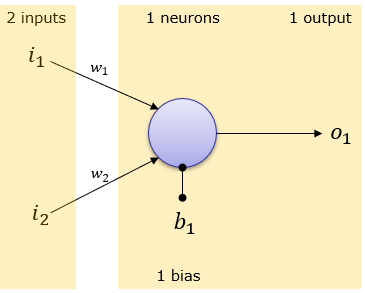

1) torch.nn.Linear

torch.nn.Linear 함수는 입력 데이터에 가중치 행렬을 곱하고 편향을 더하는 연산을 수행하며 원하는 차원의 특징 벡터를 출력

입력 변수 : nn.torch.Linear(입력 데이터의 차원, 출력 데이터의 차원)

In [5]:
# 입력 데이터
input_data = torch.tensor([-1, 0, 1, 2], dtype=torch.float32)
print(f"Input data : {input_data}")
print(f"Input data size : {input_data.size()}")

# ReLU 레이어 정의
# input_dim = 4, output_dim=2
linear = nn.Linear(4, 2)

# ReLU를 통과한 결과
output_data = linear(input_data)
print(f"Output data : {output_data}")
print(f"Output data size : {output_data.size()}")

Input data : tensor([-1.,  0.,  1.,  2.])
Input data size : torch.Size([4])
Output data : tensor([-0.0366, -0.3906], grad_fn=<ViewBackward0>)
Output data size : torch.Size([2])


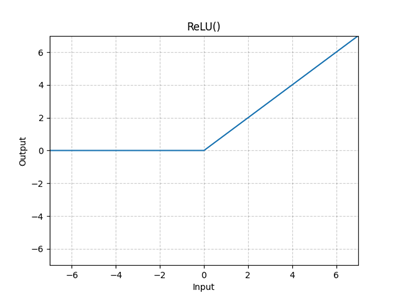


2) torch.nn.ReLU
: ReLU 함수는 입력 값이 0보다 크면 그 값을 그대로 출력하고, 0 이하이면 0을 출력:

$ \text{ReLU}(x) = \max(0, x) $

즉, 입력 \( x \)에 대해 양의 부분은 그대로 유지되고, 음의 부분은 0으로 변환

- 네트워크의 각 layer에 비선형적 특징을 부여함으로써, 각각의 layer가 특색있는 특징 벡터를 추출

In [6]:
# ReLU 레이어 정의
relu = nn.ReLU()

# 입력 데이터
input_data = torch.tensor([-1, 0, 1, 2], dtype=torch.float32)
print(f"Input data : {input_data}")

# ReLU를 통과한 결과
output_data = relu(input_data)
print(f"Output data : {output_data}")

Input data : tensor([-1.,  0.,  1.,  2.])
Output data : tensor([0., 0., 1., 2.])



2) torch.nn.Softmax
: 신경망의 출력을 확률 분포로 변환

$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$
- $x_i$는 입력 벡터 $x$의 $i$번째 요소
- 분모는 입력 벡터의 모든 요소에 대한 $e^{x_j}$의 합

Softmax 함수는 각 요소의 요소를 지수 함수에 대입한 결과에 비례한 확률 분포를 생성

입력 변수 : torch.nn.Softmax(dim=계산할 차원)

In [7]:
import torch
import torch.nn as nn

# Softmax 레이어 정의
# dim=1은 계산을 수행할 차원 지정
softmax = nn.Softmax(dim=1)

logits = torch.tensor([[1.0, 2.0, 3.0]])  # 예시 로짓 벡터

# logit값을 활용한 확률 분포
probabilities = softmax(logits)

print(f"확률분포 : {probabilities}")
print(f"확률 분포 합 : {probabilities.sum()}")

확률분포 : tensor([[0.0900, 0.2447, 0.6652]])
확률 분포 합 : 1.0


### 정책 네트워크 구성

1) 상태 변수를 입력받아, 128차원의 특징 벡터 추출

2) 특징 벡터에 비선형성 부여

3) 128차원의 특징 벡터를 활용하여 각 행동의 특징 벡터 추출

4) 행동의 특징 벡터를 활용하여 확률 분포 획득

In [25]:
################################## 코드 작성 ###################################

# 학습하고자하는 환경 설정
env = gym.make('CartPole-v1')
# 환경을 구성하고 있는 상태 차원 수 확인
obs_dim = env.observation_space.shape[0]
# 환경을 구성하고 있는 행동 차원 수 확인
n_action = env.action_space.n

print(obs_dim)
print(n_action)

################################################################################

4
2


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [9]:
################################## 코드 작성 ###################################

# Policy Network 구성

# torch.nn.Sequential 객체 안에 특징 벡터 추출을 위한 네트워크 입력

# 네트워크 입력 크기 : l1 : obs_dim -> l2: 128 -> output : 행동 차원 수 -> Softmax
policy_net = torch.nn.Sequential(
    torch.nn.Linear(obs_dim, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, n_action),
    torch.nn.Softmax(dim=-1)
).to(DEVICE)

################################################################################

### 최적화기 설정

Adam (Adaptive Moment Estimation) 최적화 알고리즘 : 경사 하강법의 한 변형으로, 각 매개변수에 대한 학습률을 적응적으로 조정

*   구성 요소
  - `policy_net.parameters()`: 최적화해야 할 신경망 (`policy_net`)의 매개변수. 학습 과정에서 최적화기에 입력된 매개변수들이 조정됨
  - `lr`: 학습률 (Learning Rate)로, 매개변수를 얼마나 빠르게 조정할지를 결정

In [10]:
################################## 코드 작성 ###################################

# 학습률 및 최적화기 설정
lr = 0.001 # 학습률 설정

optim = torch.optim.Adam(policy_net.parameters(), lr=lr)

################################################################################

## 2. 환경 교류 및 Trajectory 수집


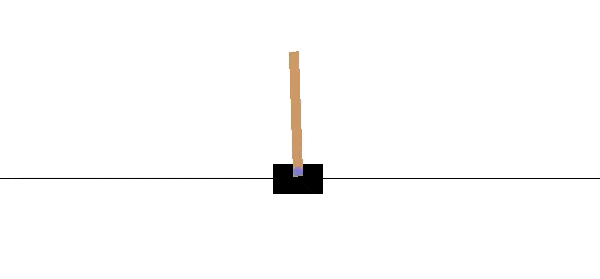

OpenAI에서 제공하는 gym 모듈의 CartPole 환경 구성

1. 상태(State) : 4개의 차원으로 구성되며 각 차원은 다음을 나타냄 :

  1) 카트의 위치

  2) 카트의 속력

  3) 막대기의 각도

  4) 막대기의 끝부분(상단) 속도


2. 행동(Action) : 2개의 차원으로 구성되며, 0은 좌로 이동, 1은 우로 이동을 나타냄


3. 보상(Reward)
매 스텝마다 카트가 중심을 기준으로 일정 범위 안에 있고, 막대기가 넘어지지 않으면 +1의 보상
- 막대기의 중심을 잘 잡아 넘어 뜨리지 않고 오래 버티면 높은 보상을 획득

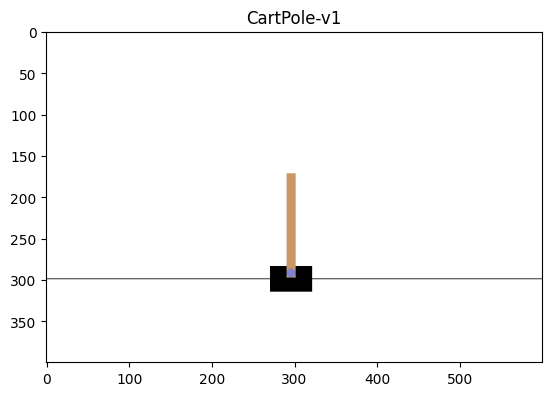

In [54]:
# 초기 환경 초기화
obs = env.reset()
obs = torch.tensor(obs, dtype=torch.float).to(DEVICE)
prev_screen = env.render(mode='rgb_array')
plt.title("CartPole-v1")
plt.imshow(prev_screen)

Total rewards : 17


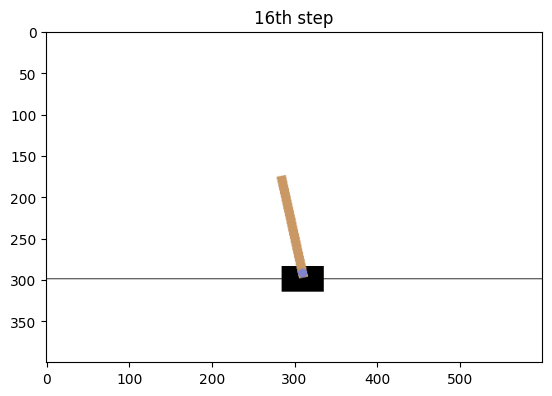

In [55]:
done = False
actions, states, rewards = [], [], []

total_rewards = 0
step = 0
# 에피소드가 끝날 때까지 반복
while not done:

    ################################## 코드 작성 ###################################

    # 환경에서 무작위 행동 샘플링
    action = env.action_space.sample()
    # 샘플된 행동을 활용하여 환경과 교류
    next_obs, reward, done, _ = env.step(action)

    # 각각의 actions, states, rewards 행렬에 Trajectory 샘플 저장
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)

    # 다음 상태로 이동
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs

    ################################################################################

    ############   For render  #############
    screen = env.render(mode='rgb_array')
    plt.title(f'{step}th step')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    ########################################

    print("State :")
    print(obs)
    print("Action :")
    print(action)
    print("Next State :")
    print(next_obs)
    print("Reward :")
    print(reward)
    print("Done :")
    print(done)

    total_rewards += reward
    step += 1

ipythondisplay.clear_output(wait=True)
env.close()
print("Total rewards : %d"%total_rewards)

## 정책 네트워크를 활용한 행동 선택

`torch.distributions.Categorical`

: 범주형 분포를 나타내며, 각각의 카테고리(또는 클래스)에 대한 확률에 따라 샘플링 작업을 수행

In [35]:
import torch
from torch.distributions import Categorical

# 확률 벡터
probs = torch.tensor([0.2, 0.3, 0.5])  # 3개의 카테고리에 대한 확률

# Categorical 분포 객체 생성
dist = Categorical(probs)

# 확률에 따라 샘플링 수행
sample = dist.sample()

print("확률 : ", end='')
print(probs)
print("확률분포 : ", end='')
print(dist)
print("샘플 출력 : ", end='')
print(sample)

확률 : tensor([0.2000, 0.3000, 0.5000])
확률분포 : Categorical(probs: torch.Size([3]))
샘플 출력 : tensor(2)


In [41]:
# 무작위 샘플을 100번 실행
samples = []
for _ in range(100):
  samples.append(dist.sample().item())

# 각 카테고리별 빈도수 계산
frequencies = [0, 0, 0]
for sample in samples:
    frequencies[sample] += 1

print("샘플 발생 빈도수 : ", end='')
print(frequencies)

sampled_prob = []
for freq in frequencies:
  sampled_prob.append(freq / 100.0)

print("발생한 샘플의 확률 : ", end='')
print(sampled_prob)

샘플 발생 빈도수 : [24, 34, 42]
발생한 샘플의 확률 : [0.24, 0.34, 0.42]


### 범주형 분포를 활용한 행동 선택

1) 정책 네트워크를 활용하여 행동 확률 결정


2) 예측된 행동 확률에 따라 행동 선택

In [42]:
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)

probs = policy_net(obs)
dist = torch.distributions.Categorical(probs=probs)
action = dist.sample().item()

print("State : ", end='')
print(obs)
print("Probability : ", end='')
print(probs)
print("Distribution : ", end='')
print(dist)
print("Action : ", end='')
print(action)

State : tensor([ 0.0113,  0.0482,  0.0367, -0.0141], device='cuda:0')
Probability : tensor([1.0018e-05, 9.9999e-01], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Distribution : Categorical(probs: torch.Size([2]))
Action : 1


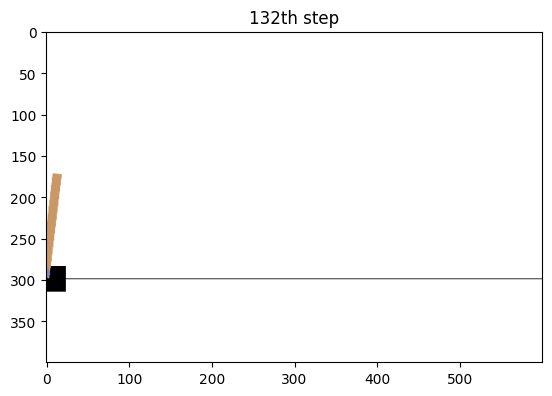

In [43]:
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)
done = False
actions, states, rewards = [], [], []

step = 0
while not done:

    ################################## 코드 작성 ###################################

    # Policy network를 활용해 행동 확률 예측
    probs = policy_net(obs)
    # 예측된 확률을 활용하여 Categorical 분포 구성
    dist = torch.distributions.Categorical(probs=probs)
    # 분포를 활용한 행동 샘플링
    action = dist.sample().item()

    # 샘플된 행동을 통해 환경과 교류
    next_obs, reward, done, _ = env.step(action)

    # 각각의 actions, states, rewards 행렬에 Trajectory 샘플 저장
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)

    # 다음 상태로 이동
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs

    ################################################################################

    ############   For render  #############
    screen = env.render(mode='rgb_array')
    plt.title(f'{step}th step')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    ########################################

    print("선택 확률 :")
    print(probs)
    print("행동 :")
    print(action)

    step += 1

ipythondisplay.clear_output(wait=True)
env.close()

## 3. Episode 샘플을 활용한 반환 값 계산

1) 환경과의 교류를 활용한 step별 reward 저장

In [44]:
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)
done = False
actions, states, rewards = [], [], []

step = 0
while not done:

    ################################## 코드 작성 ###################################

    # Policy network를 활용해 행동 확률 예측
    probs = policy_net(obs)
    # 예측된 확률을 활용하여 Categorical 분포 구성
    dist = torch.distributions.Categorical(probs=probs)
    # 분포를 활용한 행동 샘플링
    action = dist.sample().item()

    # 샘플된 행동을 통해 환경과 교류
    next_obs, reward, done, _ = env.step(action)

    # 각각의 actions, states, rewards 행렬에 Trajectory 샘플 저장
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)

    # 다음 상태로 이동
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs

    ################################################################################

    step += 1

env.close()

- step 별 reward 관찰

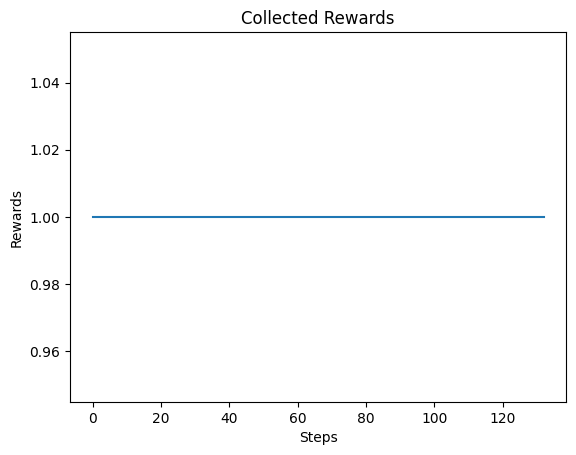

In [45]:
plt.title("Collected Rewards")
plt.xlabel("Steps")
plt.ylabel("Rewards")
plt.plot(rewards)

2) 감쇄 반환값(Return) 계산



*   감쇄 반환값 $G_t = \sum_{t=0}^T \gamma^t r_t$
   - $\gamma$ : 미래의 보상에 대해 감쇄를 적용하여 현재 상태와 가까운 보상일수록 더욱 큰 반환 값을 얻음

In [46]:
gamma = 0.99
returns = []

################################## 코드 작성 ###################################

# 에피소드가 진행된 step 수(len(rewards))만큼 반복
for time_step in range(len(rewards)):
    G_t = 0.0
    # 현재 스탭 이후의 모든 보상(rewards[time_step:])에 대해 감쇄율을 적용하여 반환 값 계산
    for idx, r_t in enumerate(rewards[time_step:]):
        G_t = G_t + (gamma**idx) * r_t
    returns.append(G_t)

################################################################################

returns = np.array(returns)

초기 상태의 반환 값: 13.994165


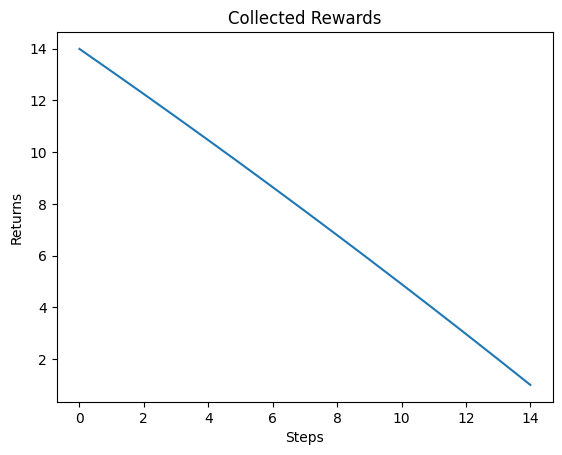

In [ ]:
plt.title("Collected Rewards")
plt.xlabel("Steps")
plt.ylabel("Returns")
plt.plot(returns)
print("초기 상태의 반환 값: %f"%returns[0])

## 네트워크 업데이트

REINFORCE의 목적 함수 $J(\theta)$에 대한 정책 경사 :

$\hat{\nabla}_{\theta} J(\theta) = \nabla_{\theta} \log \pi_{\theta}(s_t, a_t) G_t$


- 반환 값에 따라 행동의 결정 확률 최대화
- 에이전트의 행동이 좋은 결과(높은 반환값)를 가져오면 그 행동을 더 자주 취하도록 정책을 조정

1) 로그 확률 계산

`Categorical` 객체의 `log_prob`함수는 선택된 행동에 대한 로그 확률을 반환함

In [50]:
import torch
from torch.distributions import Categorical

# 확률 벡터
probs = torch.tensor([0.2, 0.3, 0.5])  # 3개의 카테고리에 대한 확률

# Categorical 분포 객체 생성
dist = Categorical(probs)

# 확률에 따라 샘플링 수행
sample = dist.sample()
log_prob = dist.log_prob(sample)

print("확률 : ", end='')
print(probs)
print("로그 확률 : ", end='')
print(np.log(probs))
print("샘플 출력 : ", end='')
print(sample)
print("선택된 샘플의 로그 확률 : ", end='')
print(log_prob)

확률 : tensor([0.2000, 0.3000, 0.5000])
로그 확률 : tensor([-1.6094, -1.2040, -0.6931])
샘플 출력 : tensor(1)
선택된 샘플의 로그 확률 : tensor(-1.2040)


2) 저장된 Trajectory 샘플에 대한 정책 업데이트

In [ ]:
# Trajectory 샘플을 활용하여 정책 업데이트
prob_array, actions_array, log_probs_array, losses_array = [], [], [], []
for state, action, discounted_return in zip(states, actions, returns):

    ################################## 코드 작성 ###################################

    # 상태에 따라 적절한 행동 선택
    probs = policy_net(state)
    dist = torch.distributions.Categorical(probs=probs)
    # 선택된 행동의 로그 확률 획득
    log_prob = dist.log_prob(action)

    # 리턴을 최대화하도록 정책 학습
    loss = -log_prob * discounted_return

    # 손실값 및 정의된 최적화기를 활용한 업데이트 수행
    optim.zero_grad()
    loss.backward()
    optim.step()

    ################################################################################

    prob_array.append(probs.detach().cpu().numpy())
    actions_array.append(action.detach().cpu().numpy())
    log_probs_array.append(log_prob.detach().cpu().numpy())
    losses_array.append(loss.item())

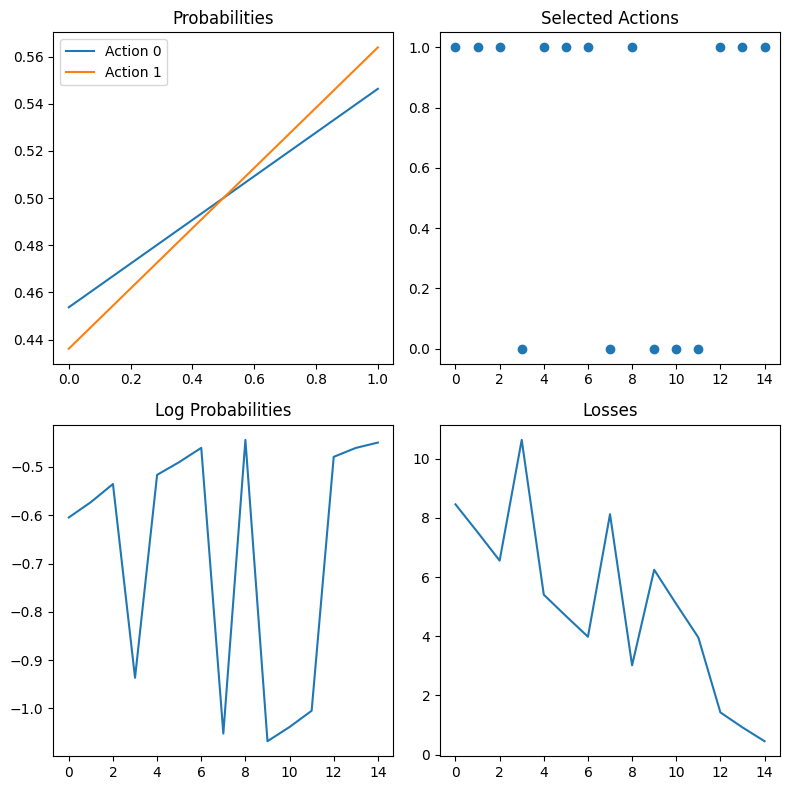

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# 각 subplot에 데이터 그리기
for i in range(np.array(prob_array).shape[-1]):
  axs[0, 0].plot(np.array(prob_array[i]), label=f'Action {i}')
  axs[0, 0].set_title('Probabilities')
  axs[0, 0].legend()

x_axis = np.arange(len(actions_array))
axs[0, 1].scatter(x_axis, np.array(actions_array))
axs[0, 1].set_title('Selected Actions')

axs[1, 0].plot(np.array(log_probs_array))
axs[1, 0].set_title('Log Probabilities')

axs[1, 1].plot(np.array(losses_array))
axs[1, 1].set_title('Losses')

# 그래프 표시
plt.tight_layout()
plt.show()

## 전체 학습 코드

In [47]:
policy_net = torch.nn.Sequential(
    torch.nn.Linear(obs_dim, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, n_action),
    torch.nn.Softmax(dim=-1)
).to(DEVICE)

optim = torch.optim.Adam(policy_net.parameters(), lr=lr)

In [48]:
# 초기 학습 데이터 초기화
obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)
done = False
# Trajectory의 샘플들을 저장하기 위한 행렬 선언
actions, states, rewards = [], [], []

# 에피소드가 끝날 때까지 환경과의 교류
while not done:

    ################################## 코드 작성 ###################################

    # Policy network를 활용해 행동 확률 예측
    probs = policy_net(obs)
    # 예측된 확률을 활용하여 Categorical 분포 구성
    dist = torch.distributions.Categorical(probs=probs)
    # 분포를 활용한 행동 샘플링
    action = dist.sample().item()

    # 샘플된 행동을 통해 환경과 교류
    next_obs, reward, done, _ = env.step(action)

    # 각각의 actions, states, rewards 행렬에 Trajectory 샘플 저장
    action = torch.tensor(action, dtype=torch.int).to(DEVICE)
    actions.append(action)
    states.append(obs)
    rewards.append(reward)

    # 다음 상태로 이동
    next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
    obs = next_obs
    ################################################################################

# Trajectory 반환 값 계산
returns = []
for time_step in range(len(rewards)):
    G_t = 0.0
    for idx, r_t in enumerate(rewards[time_step:]):
        G_t = G_t + (gamma**idx) * r_t
    returns.append(G_t)
returns = np.array(returns)

# Trajectory 샘플을 활용하여 정책 업데이트
for state, action, discounted_return in zip(states, actions, returns):
    # 상태에 따라 적절한 행동 선택
    probs = policy_net(state)
    dist = torch.distributions.Categorical(probs=probs)
    log_prob = dist.log_prob(action)

    # 리턴을 최대화하도록 정책 학습
    loss = -log_prob * discounted_return

    optim.zero_grad()
    loss.backward()
    optim.step()

## n번 episode동안 반복

In [49]:
# 최대 Episode 횟수 결정
max_epi_num = 1000
# 에피소드 동안 획득한 reward 값 비교
results_reward = []
losses = []

# 학습 수행
for i in range(max_epi_num):
    # 초기 학습 데이터 초기화
    obs = torch.tensor(env.reset(), dtype=torch.float).to(DEVICE)
    done = False
    actions, states, rewards = [], [], []
    total_reward = 0

    # 에피소드가 끝날 때까지 반복
    step = 0
    while not done:

        ################################## 코드 작성 ###################################

        # Policy network를 활용해 행동 확률 예측
        probs = policy_net(obs)
        # 예측된 확률을 활용하여 Categorical 분포 구성
        dist = torch.distributions.Categorical(probs=probs)
        # 분포를 활용한 행동 샘플링
        action = dist.sample().item()
        # 샘플된 행동을 통해 환경과 교류
        next_obs, reward, done, _ = env.step(action)

        # 각각의 actions, states, rewards 행렬에 Trajectory 샘플 저장
        action = torch.tensor(action, dtype=torch.int).to(DEVICE)
        actions.append(action)
        states.append(obs)
        rewards.append(reward)

        # 다음 상태로 이동
        next_obs =  torch.tensor(next_obs, dtype=torch.float).to(DEVICE)
        obs = next_obs
        total_reward = total_reward + reward
        step += 1

    # Trajectory 반환 값 계산
    returns = []
    for time_step in range(len(rewards)):
        ################################## 코드 작성 ###################################

        G_t = 0.0

        # 에피소드가 진행된 step 수(len(rewards))만큼 반복
        for idx, r_t in enumerate(rewards[time_step:]):
            # 현재 스탭 이후의 모든 보상(rewards[time_step:])에 대해 감쇄율을 적용하여 반환 값 계산
            G_t = G_t + (gamma**idx) * r_t
        returns.append(G_t)

        ################################################################################

    returns = np.array(returns)

    # Trajectory 샘플을 활용하여 정책 업데이트
    for state, action, discounted_return in zip(states, actions, returns):

        ################################## 코드 작성 ###################################

        # 상태에 따라 적절한 행동 선택
        probs = policy_net(state)
        dist = torch.distributions.Categorical(probs=probs)

        # 선택된 행동의 로그 확률 획득
        log_prob = dist.log_prob(action)

        # 손실값 및 정의된 최적화기를 활용한 업데이트 수행
        loss = -log_prob * discounted_return

        optim.zero_grad()
        loss.backward()
        optim.step()

        ################################################################################

    results_reward.append(total_reward)

    if i % 100 == 0:
        print(f'epsiode: {i}, score: {np.mean(results_reward[-10:])}')

# ipythondisplay.clear_output(wait=True)
env.close()

epsiode: 0, score: 86.0
epsiode: 100, score: 142.2
epsiode: 200, score: 255.7
epsiode: 300, score: 129.4
epsiode: 400, score: 367.9
epsiode: 500, score: 275.8
epsiode: 600, score: 245.5
epsiode: 700, score: 323.7
epsiode: 800, score: 304.5
epsiode: 900, score: 361.2


## 성능 분석

### 선택된 행동들의 확률 관측

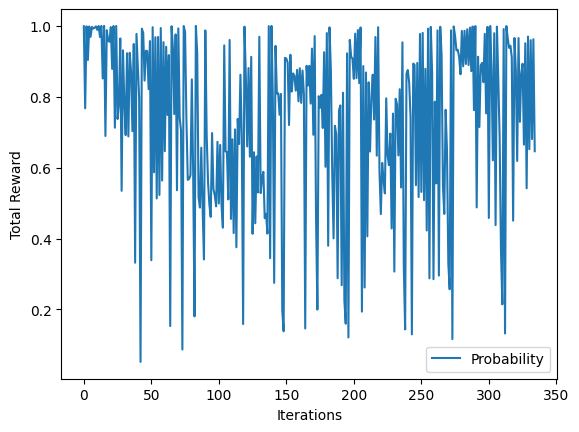

In [51]:
log_probs = []
for state, action, discounted_return in zip(states, actions, returns):

    ################################## 코드 작성 ###################################

    # Policy network를 활용해 행동 확률 예측
    probs = policy_net(state)
    # 예측된 확률을 활용하여 Categorical 분포 구성
    dist = torch.distributions.Categorical(probs=probs)
    # 수집된 데이터와 분포를 활용한 log_prob 계산
    log_prob = dist.log_prob(action)

    ################################################################################

    log_probs.append(log_prob.detach().cpu().numpy())

plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(np.exp(log_probs), label='Probability')
plt.legend()
plt.show()
plt.close()

### 마지막 에피소드의 반환 값 관측

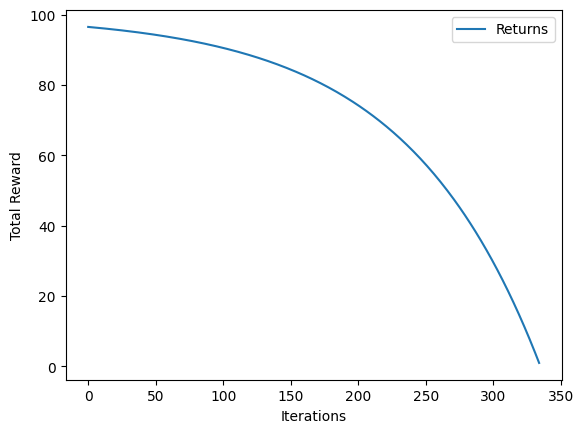

In [52]:
plt.xlabel("Iterations")
plt.ylabel("Total Reward")
plt.plot(returns, label='Returns')
plt.legend()
plt.show()
plt.close()

### 알고리즘의 성능 향상

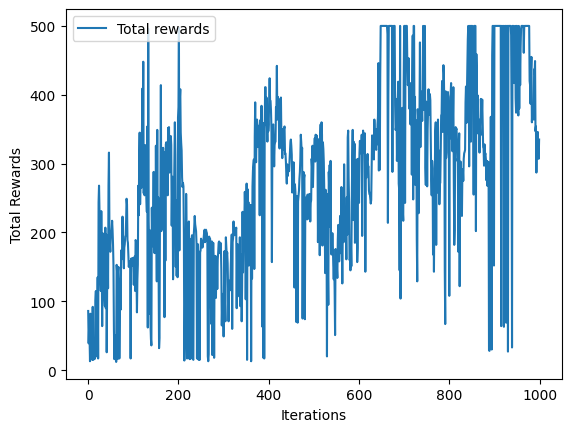

In [53]:
plt.xlabel("Iterations")
plt.ylabel("Total Rewards")
plt.plot(results_reward, label='Total rewards')
plt.legend()
plt.show()
plt.close()